In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from scipy.signal import find_peaks
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

### Load data

In [2]:
# df=pd.read_excel('appdata.xlsx') 

Dataset for TRaining **Durting train uncomment**

In [6]:
 df=pd.read_csv('test_appdata.csv')

Dataset for Testing **Durting train comment**

In [7]:
df.head()

,timeElapsed,x,y,z,label
0,0,0.75,-9.53,1.04,Standing
1,1,0.76,-9.55,1.05,Standing
2,2,0.77,-9.53,1.05,Standing
3,3,0.80,-9.53,1.01,Standing
4,4,0.87,-9.55,1.03,Standing


In [8]:
df.isnull().sum()

timeElapsed    0
x              0
y              0
z              0
label          0
dtype: int64

In [9]:
df.duplicated().sum()

0

In [10]:
df.shape

(341924, 5)

In [8]:
df['label'].unique()

array(['Sitting', 'Standing', 'Walking', 'Upstairs', 'Downstairs'],
      dtype=object)

In [9]:
df['label'].value_counts()

Walking       240200
Sitting       213235
Upstairs      149859
Standing      116422
Downstairs     98091
Name: label, dtype: int64

In [10]:
Walking=df[df['label']=='Walking']
Walking.head()

,timeElapsed,x,y,z,label
254215,254215,2.94,3.64,9.10,Walking
254216,254216,2.78,3.64,9.01,Walking
254217,254217,2.83,3.72,8.87,Walking
254218,254218,2.89,3.81,8.92,Walking
254219,254219,3.10,3.83,9.21,Walking


## Plot Axies of Accelerometer Dataset 

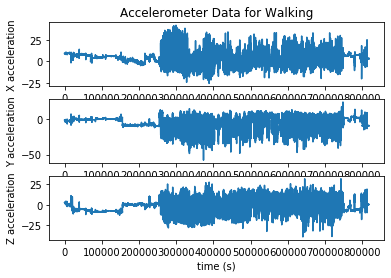

<Figure size 720x720 with 0 Axes>

In [11]:
plt.subplot(3, 1, 1)
plt.plot(df['timeElapsed'],df['x'])
plt.title('Accelerometer Data for Walking')
plt.ylabel('X acceleration')
plt.xlabel('time (s)')

plt.subplot(3, 1, 2)
plt.plot(df['timeElapsed'],df['y'])
plt.xlabel('time (s)')
plt.ylabel('Y acceleration')

plt.subplot(3, 1, 3)
plt.plot(df['timeElapsed'],df['z'])
plt.xlabel('time (s)')
plt.ylabel('Z acceleration')

plt.figure(figsize=(10,10))

plt.show();

# Preprocessing Phase


### Applying Low-Pass Filter to Acceleration Signals

In [12]:
X_acc=df['x'].values
Y_acc=df['y'].values
Z_acc=df['z'].values


In [13]:
def Filter (Data):
        a=0.05  # Cofficient of filter
        S=list(Data)  #convert acc data to list
        X=[]          #empty list to append filter data in it
        for i in range(0,len(S)):
            if i==0:
                X.append(a*S[i]) 
            else:
                X.append((1-a)*X[i-1]+a*S[i]) 
        return(X)


In [14]:
X_filtered=Filter(X_acc)
Y_filtered=Filter(Y_acc)
Z_filtered=Filter(Z_acc)

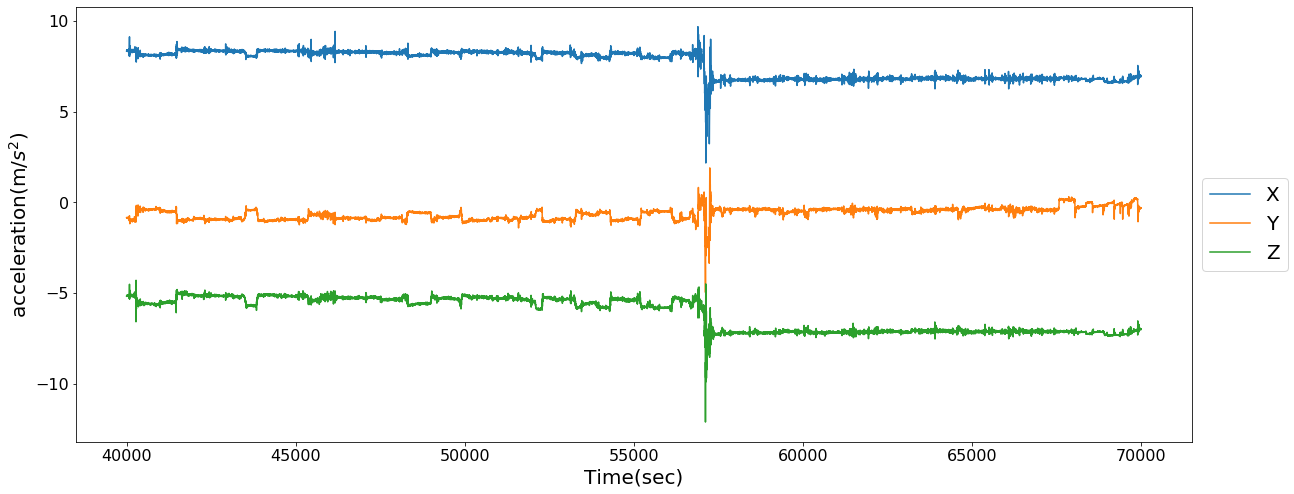

In [31]:
plt.figure(figsize=(20,8))
plt.plot(df['timeElapsed'].iloc[40000:70000],df['x'].iloc[40000:70000],label='X')
plt.plot(df['timeElapsed'].iloc[40000:70000],df['y'].iloc[40000:70000],label='Y')
plt.plot(df['timeElapsed'].iloc[40000:70000],df['z'].iloc[40000:70000],label='Z')
# plt.title('X Data Before and After Filteration',color='m',fontsize=30)
plt.ylabel('acceleration(m/$s^{2}$)',fontsize=20)
plt.xlabel('Time(sec)',fontsize=20)
plt.xticks(fontsize=16,color='black')
plt.yticks(fontsize=16,color='black')

plt.legend(loc='center left', bbox_to_anchor=(1, 0.5),prop={'size': 20})
plt.savefig('acc.png')
plt.show()


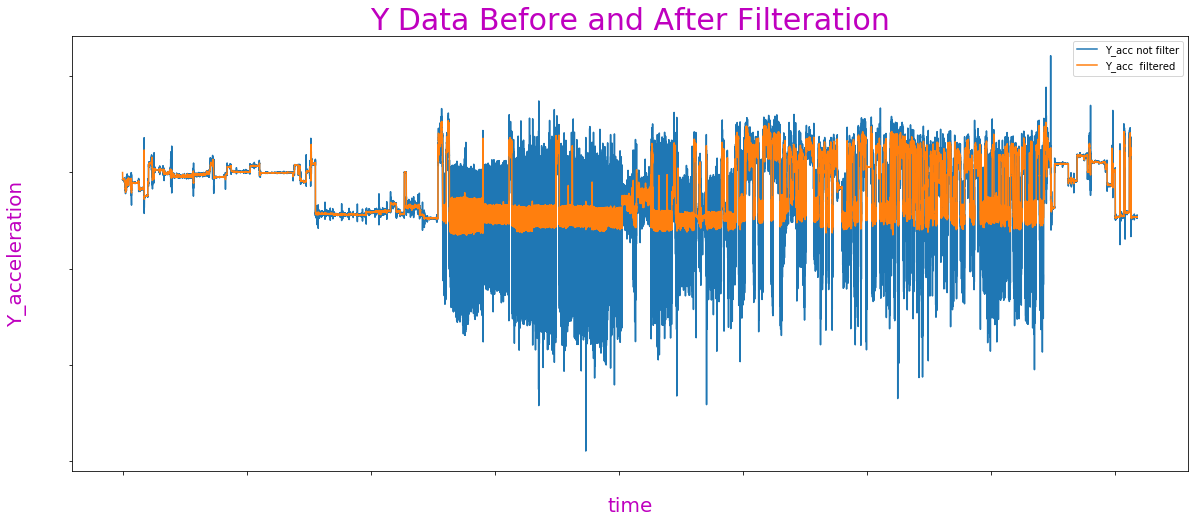

In [16]:
plt.figure(figsize=(20,8))
plt.plot(df['timeElapsed'],df['y'],label='Y_acc not filter')
plt.plot(df['timeElapsed'],Y_filtered,label='Y_acc  filtered')
plt.title('Y Data Before and After Filteration',color='m',fontsize=30)
plt.ylabel('Y_acceleration',color='m',fontsize=20)
plt.xlabel('time',color='m',fontsize=20)
plt.xticks(fontsize=16,color='white')
plt.yticks(fontsize=16,color='white')
plt.legend()

plt.show()

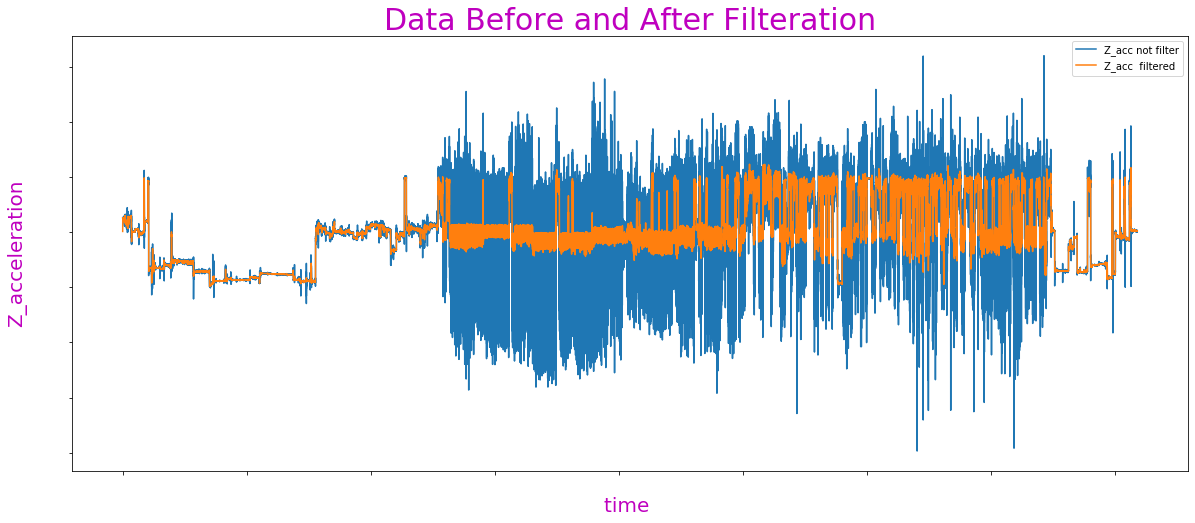

In [17]:
plt.figure(figsize=(20,8))
plt.plot(df['timeElapsed'],df['z'],label='Z_acc not filter')
plt.plot(df['timeElapsed'],Z_filtered,label='Z_acc  filtered')
plt.title('Data Before and After Filteration',color='m',fontsize=30)
plt.ylabel('Z_acceleration',color='m',fontsize=20)
plt.xlabel('time ',color='m',fontsize=20)
plt.xticks(fontsize=16,color='white')
plt.yticks(fontsize=16,color='white')
plt.legend()
plt.show()

### Apply smoothing to data

In [18]:
from scipy.ndimage import gaussian_filter1d
X_smoothed = gaussian_filter1d(X_filtered, 7)
Y_smoothed = gaussian_filter1d(Y_filtered, 7)
Z_smoothed = gaussian_filter1d(Z_filtered, 7)


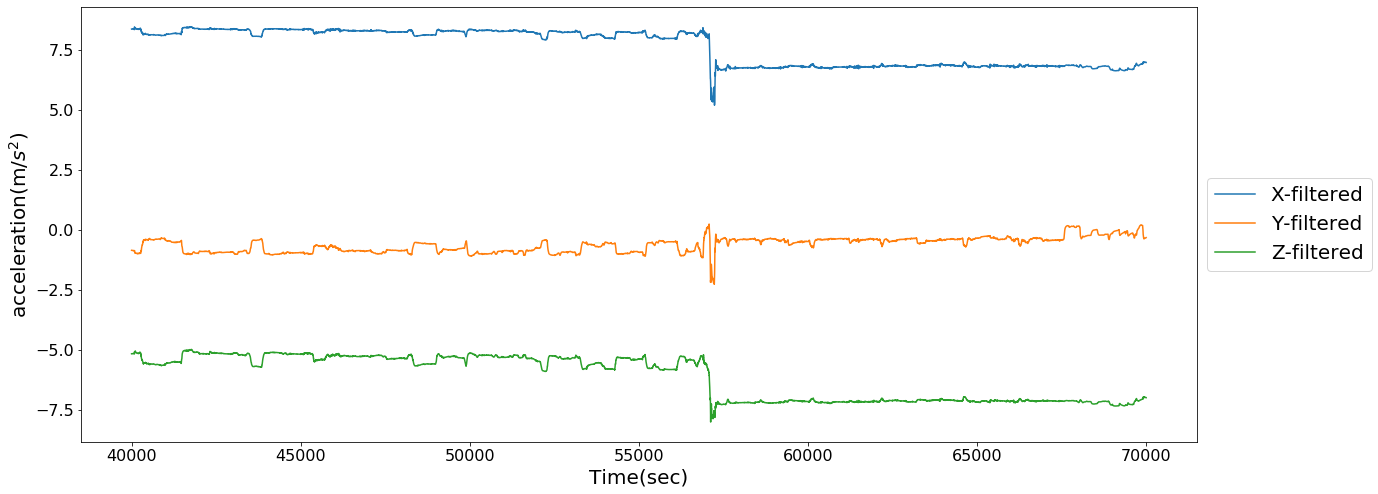

In [29]:
plt.figure(figsize=(20,8))
plt.plot(df['timeElapsed'].iloc[40000:70000],X_filtered[40000:70000],label='X-filtered')
plt.plot(df['timeElapsed'].iloc[40000:70000],Y_filtered[40000:70000],label='Y-filtered')
plt.plot(df['timeElapsed'].iloc[40000:70000],Z_filtered[40000:70000],label='Z-filtered')
plt.ylabel('acceleration(m/$s^{2}$)',fontsize=20)
plt.xlabel('Time(sec)',fontsize=20)
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5),prop={'size': 20})
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.savefig('filter.png')
plt.show()

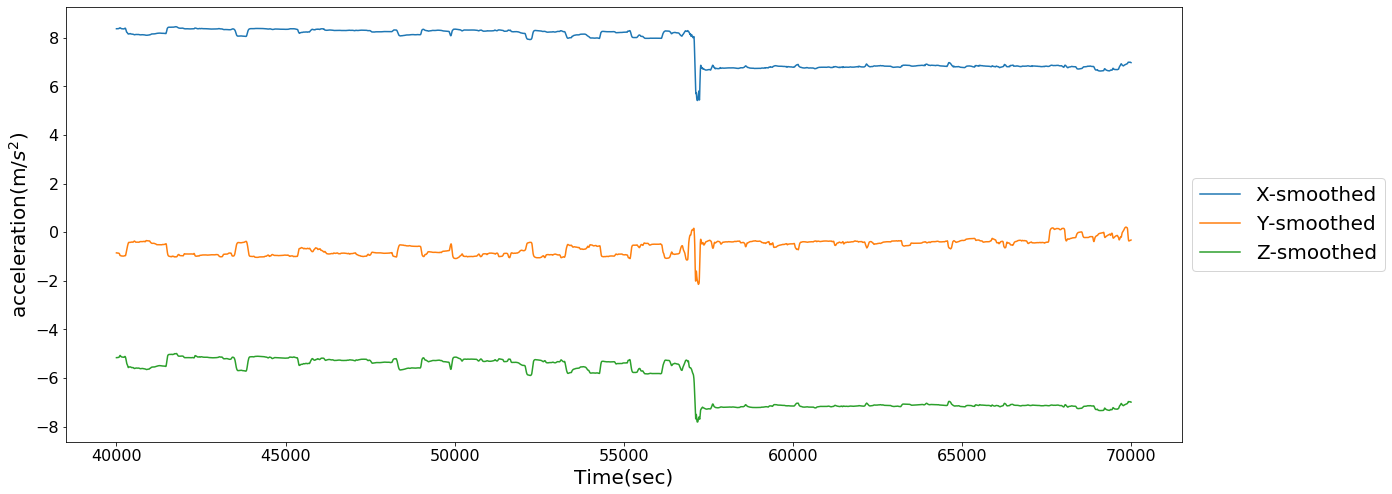

In [30]:
plt.figure(figsize=(20,8))
plt.plot(df['timeElapsed'].iloc[40000:70000],X_smoothed[40000:70000],label='X-smoothed')
plt.plot(df['timeElapsed'].iloc[40000:70000],Y_smoothed[40000:70000],label='Y-smoothed')
plt.plot(df['timeElapsed'].iloc[40000:70000],Z_smoothed[40000:70000],label='Z-smoothed')
# plt.title('Accelerometer axies smoothed signal',color='c',fontsize=30)
plt.ylabel('acceleration(m/$s^{2}$)',fontsize=20)
plt.xlabel('Time(sec)',fontsize=20)
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5),prop={'size': 20})
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.savefig('smoothed.png')
plt.show()

In [21]:
df['X_smoothed']=X_smoothed
df['Y_smoothed']=Y_smoothed
df['Z_smoothed']=Z_smoothed
df.head()

,timeElapsed,x,y,z,label,X_smoothed,Y_smoothed,Z_smoothed
0,0,9.38,-1.48,2.62,Sitting,2.370101,-0.377550,0.662730
1,1,9.37,-1.47,2.64,Sitting,2.404858,-0.383138,0.672412
2,2,9.39,-1.49,2.64,Sitting,2.473393,-0.394156,0.691505
3,3,9.37,-1.49,2.62,Sitting,2.573812,-0.410298,0.719482
4,4,9.38,-1.50,2.62,Sitting,2.703420,-0.431127,0.755594


In [22]:
len(df)

817807

   index         x         y         z
0   0.00  2.370101 -0.377550  0.662730
1   0.02  2.370454 -0.377607  0.662828
2   0.04  2.370821 -0.377666  0.662930
3   0.06  2.371202 -0.377727  0.663036
4   0.08  2.371598 -0.377791  0.663147
(40890350, 4)


254215------>(array([12710750], dtype=int64),)
254216------>(array([12710800], dtype=int64),)
254217------>(array([12710850], dtype=int64),)
254218------>(array([12710900], dtype=int64),)
254219------>(array([12710950], dtype=int64),)
254220------>(array([12711000], dtype=int64),)
254221------>(array([12711050], dtype=int64),)
254222------>(array([12711100], dtype=int64),)
254223------>(array([12711150], dtype=int64),)
254224------>(array([12711200], dtype=int64),)
254225------>(array([12711250], dtype=int64),)
254226------>(array([12711300], dtype=int64),)
254227------>(array([12711350], dtype=int64),)
254228------>(array([12711400], dtype=int64),)
254229------>(array([12711450], dtype=int64),)
254230------>(array([12711500], dtype=int64),)
254231------>(array([12711550], dtype=int64),)
254232------>(array([12711600], dtype=int64),)
254233------>(array([12711650], dtype=int64),)
254234------>(array([12711700], dtype=int64),)
254235------>(array([12711750], dtype=int64),)
254236------>

254393------>(array([12719650], dtype=int64),)
254394------>(array([12719700], dtype=int64),)
254395------>(array([12719750], dtype=int64),)
254396------>(array([12719800], dtype=int64),)
254397------>(array([12719850], dtype=int64),)
254398------>(array([12719900], dtype=int64),)
254399------>(array([12719950], dtype=int64),)
254400------>(array([12720000], dtype=int64),)
254401------>(array([12720050], dtype=int64),)
254402------>(array([12720100], dtype=int64),)
254403------>(array([12720150], dtype=int64),)
254404------>(array([12720200], dtype=int64),)
254405------>(array([12720250], dtype=int64),)
254406------>(array([12720300], dtype=int64),)
254407------>(array([12720350], dtype=int64),)
254408------>(array([12720400], dtype=int64),)
254409------>(array([12720450], dtype=int64),)
254410------>(array([12720500], dtype=int64),)
254411------>(array([12720550], dtype=int64),)
254412------>(array([12720600], dtype=int64),)
254413------>(array([12720650], dtype=int64),)
254414------>

254569------>(array([12728450], dtype=int64),)
254570------>(array([12728500], dtype=int64),)
254571------>(array([12728550], dtype=int64),)
254572------>(array([12728600], dtype=int64),)
254573------>(array([12728650], dtype=int64),)
254574------>(array([12728700], dtype=int64),)
254575------>(array([12728750], dtype=int64),)
254576------>(array([12728800], dtype=int64),)
254577------>(array([12728850], dtype=int64),)
254578------>(array([12728900], dtype=int64),)
254579------>(array([12728950], dtype=int64),)
254580------>(array([12729000], dtype=int64),)
254581------>(array([12729050], dtype=int64),)
254582------>(array([12729100], dtype=int64),)
254583------>(array([12729150], dtype=int64),)
254584------>(array([12729200], dtype=int64),)
254585------>(array([12729250], dtype=int64),)
254586------>(array([12729300], dtype=int64),)
254587------>(array([12729350], dtype=int64),)
254588------>(array([12729400], dtype=int64),)
254589------>(array([12729450], dtype=int64),)
254590------>

254745------>(array([12737250], dtype=int64),)
254746------>(array([12737300], dtype=int64),)
254747------>(array([12737350], dtype=int64),)
254748------>(array([12737400], dtype=int64),)
254749------>(array([12737450], dtype=int64),)
254750------>(array([12737500], dtype=int64),)
254751------>(array([12737550], dtype=int64),)
254752------>(array([12737600], dtype=int64),)
254753------>(array([12737650], dtype=int64),)
254754------>(array([12737700], dtype=int64),)
254755------>(array([12737750], dtype=int64),)
254756------>(array([12737800], dtype=int64),)
254757------>(array([12737850], dtype=int64),)
254758------>(array([12737900], dtype=int64),)
254759------>(array([12737950], dtype=int64),)
254760------>(array([12738000], dtype=int64),)
254761------>(array([12738050], dtype=int64),)
254762------>(array([12738100], dtype=int64),)
254763------>(array([12738150], dtype=int64),)
254764------>(array([12738200], dtype=int64),)
254765------>(array([12738250], dtype=int64),)
254766------>

254920------>(array([12746000], dtype=int64),)
254921------>(array([12746050], dtype=int64),)
254922------>(array([12746100], dtype=int64),)
254923------>(array([12746150], dtype=int64),)
254924------>(array([12746200], dtype=int64),)
254925------>(array([12746250], dtype=int64),)
254926------>(array([12746300], dtype=int64),)
254927------>(array([12746350], dtype=int64),)
254928------>(array([12746400], dtype=int64),)
254929------>(array([12746450], dtype=int64),)
254930------>(array([12746500], dtype=int64),)
254931------>(array([12746550], dtype=int64),)
254932------>(array([12746600], dtype=int64),)
254933------>(array([12746650], dtype=int64),)
254934------>(array([12746700], dtype=int64),)
254935------>(array([12746750], dtype=int64),)
254936------>(array([12746800], dtype=int64),)
254937------>(array([12746850], dtype=int64),)
254938------>(array([12746900], dtype=int64),)
254939------>(array([12746950], dtype=int64),)
254940------>(array([12747000], dtype=int64),)
254941------>

255097------>(array([12754850], dtype=int64),)
255098------>(array([12754900], dtype=int64),)
255099------>(array([12754950], dtype=int64),)
255100------>(array([12755000], dtype=int64),)
255101------>(array([12755050], dtype=int64),)
255102------>(array([12755100], dtype=int64),)
255103------>(array([12755150], dtype=int64),)
255104------>(array([12755200], dtype=int64),)
255105------>(array([12755250], dtype=int64),)
255106------>(array([12755300], dtype=int64),)
255107------>(array([12755350], dtype=int64),)
255108------>(array([12755400], dtype=int64),)
255109------>(array([12755450], dtype=int64),)
255110------>(array([12755500], dtype=int64),)
255111------>(array([12755550], dtype=int64),)
255112------>(array([12755600], dtype=int64),)
255113------>(array([12755650], dtype=int64),)
255114------>(array([12755700], dtype=int64),)
255115------>(array([12755750], dtype=int64),)
255116------>(array([12755800], dtype=int64),)
255117------>(array([12755850], dtype=int64),)
255118------>

255274------>(array([12763700], dtype=int64),)
255275------>(array([12763750], dtype=int64),)
255276------>(array([12763800], dtype=int64),)
255277------>(array([12763850], dtype=int64),)
255278------>(array([12763900], dtype=int64),)
255279------>(array([12763950], dtype=int64),)
255280------>(array([12764000], dtype=int64),)
255281------>(array([12764050], dtype=int64),)
255282------>(array([12764100], dtype=int64),)
255283------>(array([12764150], dtype=int64),)
255284------>(array([12764200], dtype=int64),)
255285------>(array([12764250], dtype=int64),)
255286------>(array([12764300], dtype=int64),)
255287------>(array([12764350], dtype=int64),)
255288------>(array([12764400], dtype=int64),)
255289------>(array([12764450], dtype=int64),)
255290------>(array([12764500], dtype=int64),)
255291------>(array([12764550], dtype=int64),)
255292------>(array([12764600], dtype=int64),)
255293------>(array([12764650], dtype=int64),)
255294------>(array([12764700], dtype=int64),)
255295------>

255449------>(array([12772450], dtype=int64),)
255450------>(array([12772500], dtype=int64),)
255451------>(array([12772550], dtype=int64),)
255452------>(array([12772600], dtype=int64),)
255453------>(array([12772650], dtype=int64),)
255454------>(array([12772700], dtype=int64),)
255455------>(array([12772750], dtype=int64),)
255456------>(array([12772800], dtype=int64),)
255457------>(array([12772850], dtype=int64),)
255458------>(array([12772900], dtype=int64),)
255459------>(array([12772950], dtype=int64),)
255460------>(array([12773000], dtype=int64),)
255461------>(array([12773050], dtype=int64),)
255462------>(array([12773100], dtype=int64),)
255463------>(array([12773150], dtype=int64),)
255464------>(array([12773200], dtype=int64),)
255465------>(array([12773250], dtype=int64),)
255466------>(array([12773300], dtype=int64),)
255467------>(array([12773350], dtype=int64),)
255468------>(array([12773400], dtype=int64),)
255469------>(array([12773450], dtype=int64),)
255470------>

255626------>(array([12781300], dtype=int64),)
255627------>(array([12781350], dtype=int64),)
255628------>(array([12781400], dtype=int64),)
255629------>(array([12781450], dtype=int64),)
255630------>(array([12781500], dtype=int64),)
255631------>(array([12781550], dtype=int64),)
255632------>(array([12781600], dtype=int64),)
255633------>(array([12781650], dtype=int64),)
255634------>(array([12781700], dtype=int64),)
255635------>(array([12781750], dtype=int64),)
255636------>(array([12781800], dtype=int64),)
255637------>(array([12781850], dtype=int64),)
255638------>(array([12781900], dtype=int64),)
255639------>(array([12781950], dtype=int64),)
255640------>(array([12782000], dtype=int64),)
255641------>(array([12782050], dtype=int64),)
255642------>(array([12782100], dtype=int64),)
255643------>(array([12782150], dtype=int64),)
255644------>(array([12782200], dtype=int64),)
255645------>(array([12782250], dtype=int64),)
255646------>(array([12782300], dtype=int64),)
255647------>

255803------>(array([12790150], dtype=int64),)
255804------>(array([12790200], dtype=int64),)
255805------>(array([12790250], dtype=int64),)
255806------>(array([12790300], dtype=int64),)
255807------>(array([12790350], dtype=int64),)
255808------>(array([12790400], dtype=int64),)
255809------>(array([12790450], dtype=int64),)
255810------>(array([12790500], dtype=int64),)
255811------>(array([12790550], dtype=int64),)
255812------>(array([12790600], dtype=int64),)
255813------>(array([12790650], dtype=int64),)
255814------>(array([12790700], dtype=int64),)
255815------>(array([12790750], dtype=int64),)
255816------>(array([12790800], dtype=int64),)
255817------>(array([12790850], dtype=int64),)
255818------>(array([12790900], dtype=int64),)
255819------>(array([12790950], dtype=int64),)
255820------>(array([12791000], dtype=int64),)
255821------>(array([12791050], dtype=int64),)
255822------>(array([12791100], dtype=int64),)
255823------>(array([12791150], dtype=int64),)
255824------>

255980------>(array([12799000], dtype=int64),)
255981------>(array([12799050], dtype=int64),)
255982------>(array([12799100], dtype=int64),)
255983------>(array([12799150], dtype=int64),)
255984------>(array([12799200], dtype=int64),)
255985------>(array([12799250], dtype=int64),)
255986------>(array([12799300], dtype=int64),)
255987------>(array([12799350], dtype=int64),)
255988------>(array([12799400], dtype=int64),)
255989------>(array([12799450], dtype=int64),)
255990------>(array([12799500], dtype=int64),)
255991------>(array([12799550], dtype=int64),)
255992------>(array([12799600], dtype=int64),)
255993------>(array([12799650], dtype=int64),)
255994------>(array([12799700], dtype=int64),)
255995------>(array([12799750], dtype=int64),)
255996------>(array([12799800], dtype=int64),)
255997------>(array([12799850], dtype=int64),)
255998------>(array([12799900], dtype=int64),)
255999------>(array([12799950], dtype=int64),)
256000------>(array([12800000], dtype=int64),)
256001------>

256157------>(array([12807850], dtype=int64),)
256158------>(array([12807900], dtype=int64),)
256159------>(array([12807950], dtype=int64),)
256160------>(array([12808000], dtype=int64),)
256161------>(array([12808050], dtype=int64),)
256162------>(array([12808100], dtype=int64),)
256163------>(array([12808150], dtype=int64),)
256164------>(array([12808200], dtype=int64),)
256165------>(array([12808250], dtype=int64),)
256166------>(array([12808300], dtype=int64),)
256167------>(array([12808350], dtype=int64),)
256168------>(array([12808400], dtype=int64),)
256169------>(array([12808450], dtype=int64),)
256170------>(array([12808500], dtype=int64),)
256171------>(array([12808550], dtype=int64),)
256172------>(array([12808600], dtype=int64),)
256173------>(array([12808650], dtype=int64),)
256174------>(array([12808700], dtype=int64),)
256175------>(array([12808750], dtype=int64),)
256176------>(array([12808800], dtype=int64),)
256177------>(array([12808850], dtype=int64),)
256178------>

256332------>(array([12816600], dtype=int64),)
256333------>(array([12816650], dtype=int64),)
256334------>(array([12816700], dtype=int64),)
256335------>(array([12816750], dtype=int64),)
256336------>(array([12816800], dtype=int64),)
256337------>(array([12816850], dtype=int64),)
256338------>(array([12816900], dtype=int64),)
256339------>(array([12816950], dtype=int64),)
256340------>(array([12817000], dtype=int64),)
256341------>(array([12817050], dtype=int64),)
256342------>(array([12817100], dtype=int64),)
256343------>(array([12817150], dtype=int64),)
256344------>(array([12817200], dtype=int64),)
256345------>(array([12817250], dtype=int64),)
256346------>(array([12817300], dtype=int64),)
256347------>(array([12817350], dtype=int64),)
256348------>(array([12817400], dtype=int64),)
256349------>(array([12817450], dtype=int64),)
256350------>(array([12817500], dtype=int64),)
256351------>(array([12817550], dtype=int64),)
256352------>(array([12817600], dtype=int64),)
256353------>

256509------>(array([12825450], dtype=int64),)
256510------>(array([12825500], dtype=int64),)
256511------>(array([12825550], dtype=int64),)
256512------>(array([12825600], dtype=int64),)
256513------>(array([12825650], dtype=int64),)
256514------>(array([12825700], dtype=int64),)
256515------>(array([12825750], dtype=int64),)
256516------>(array([12825800], dtype=int64),)
256517------>(array([12825850], dtype=int64),)
256518------>(array([12825900], dtype=int64),)
256519------>(array([12825950], dtype=int64),)
256520------>(array([12826000], dtype=int64),)
256521------>(array([12826050], dtype=int64),)
256522------>(array([12826100], dtype=int64),)
256523------>(array([12826150], dtype=int64),)
256524------>(array([12826200], dtype=int64),)
256525------>(array([12826250], dtype=int64),)
256526------>(array([12826300], dtype=int64),)
256527------>(array([12826350], dtype=int64),)
256528------>(array([12826400], dtype=int64),)
256529------>(array([12826450], dtype=int64),)
256530------>

256684------>(array([12834200], dtype=int64),)
256685------>(array([12834250], dtype=int64),)
256686------>(array([12834300], dtype=int64),)
256687------>(array([12834350], dtype=int64),)
256688------>(array([12834400], dtype=int64),)
256689------>(array([12834450], dtype=int64),)
256690------>(array([12834500], dtype=int64),)
256691------>(array([12834550], dtype=int64),)
256692------>(array([12834600], dtype=int64),)
256693------>(array([12834650], dtype=int64),)
256694------>(array([12834700], dtype=int64),)
256695------>(array([12834750], dtype=int64),)
256696------>(array([12834800], dtype=int64),)
256697------>(array([12834850], dtype=int64),)
256698------>(array([12834900], dtype=int64),)
256699------>(array([12834950], dtype=int64),)
256700------>(array([12835000], dtype=int64),)
256701------>(array([12835050], dtype=int64),)
256702------>(array([12835100], dtype=int64),)
256703------>(array([12835150], dtype=int64),)
256704------>(array([12835200], dtype=int64),)
256705------>

256862------>(array([12843100], dtype=int64),)
256863------>(array([12843150], dtype=int64),)
256864------>(array([12843200], dtype=int64),)
256865------>(array([12843250], dtype=int64),)
256866------>(array([12843300], dtype=int64),)
256867------>(array([12843350], dtype=int64),)
256868------>(array([12843400], dtype=int64),)
256869------>(array([12843450], dtype=int64),)
256870------>(array([12843500], dtype=int64),)
256871------>(array([12843550], dtype=int64),)
256872------>(array([12843600], dtype=int64),)
256873------>(array([12843650], dtype=int64),)
256874------>(array([12843700], dtype=int64),)
256875------>(array([12843750], dtype=int64),)
256876------>(array([12843800], dtype=int64),)
256877------>(array([12843850], dtype=int64),)
256878------>(array([12843900], dtype=int64),)
256879------>(array([12843950], dtype=int64),)
256880------>(array([12844000], dtype=int64),)
256881------>(array([12844050], dtype=int64),)
256882------>(array([12844100], dtype=int64),)
256883------>

257038------>(array([12851900], dtype=int64),)
257039------>(array([12851950], dtype=int64),)
257040------>(array([12852000], dtype=int64),)
257041------>(array([12852050], dtype=int64),)
257042------>(array([12852100], dtype=int64),)
257043------>(array([12852150], dtype=int64),)
257044------>(array([12852200], dtype=int64),)
257045------>(array([12852250], dtype=int64),)
257046------>(array([12852300], dtype=int64),)
257047------>(array([12852350], dtype=int64),)
257048------>(array([12852400], dtype=int64),)
257049------>(array([12852450], dtype=int64),)
257050------>(array([12852500], dtype=int64),)
257051------>(array([12852550], dtype=int64),)
257052------>(array([12852600], dtype=int64),)
257053------>(array([12852650], dtype=int64),)
257054------>(array([12852700], dtype=int64),)
257055------>(array([12852750], dtype=int64),)
257056------>(array([12852800], dtype=int64),)
257057------>(array([12852850], dtype=int64),)
257058------>(array([12852900], dtype=int64),)
257059------>

257214------>(array([12860700], dtype=int64),)
257215------>(array([12860750], dtype=int64),)
257216------>(array([12860800], dtype=int64),)
257217------>(array([12860850], dtype=int64),)
257218------>(array([12860900], dtype=int64),)
257219------>(array([12860950], dtype=int64),)
257220------>(array([12861000], dtype=int64),)
257221------>(array([12861050], dtype=int64),)
257222------>(array([12861100], dtype=int64),)
257223------>(array([12861150], dtype=int64),)
257224------>(array([12861200], dtype=int64),)
257225------>(array([12861250], dtype=int64),)
257226------>(array([12861300], dtype=int64),)
257227------>(array([12861350], dtype=int64),)
257228------>(array([12861400], dtype=int64),)
257229------>(array([12861450], dtype=int64),)
257230------>(array([12861500], dtype=int64),)
257231------>(array([12861550], dtype=int64),)
257232------>(array([12861600], dtype=int64),)
257233------>(array([12861650], dtype=int64),)
257234------>(array([12861700], dtype=int64),)
257235------>

257391------>(array([12869550], dtype=int64),)
257392------>(array([12869600], dtype=int64),)
257393------>(array([12869650], dtype=int64),)
257394------>(array([12869700], dtype=int64),)
257395------>(array([12869750], dtype=int64),)
257396------>(array([12869800], dtype=int64),)
257397------>(array([12869850], dtype=int64),)
257398------>(array([12869900], dtype=int64),)
257399------>(array([12869950], dtype=int64),)
257400------>(array([12870000], dtype=int64),)
257401------>(array([12870050], dtype=int64),)
257402------>(array([12870100], dtype=int64),)
257403------>(array([12870150], dtype=int64),)
257404------>(array([12870200], dtype=int64),)
257405------>(array([12870250], dtype=int64),)
257406------>(array([12870300], dtype=int64),)
257407------>(array([12870350], dtype=int64),)
257408------>(array([12870400], dtype=int64),)
257409------>(array([12870450], dtype=int64),)
257410------>(array([12870500], dtype=int64),)
257411------>(array([12870550], dtype=int64),)
257412------>

257568------>(array([12878400], dtype=int64),)
257569------>(array([12878450], dtype=int64),)
257570------>(array([12878500], dtype=int64),)
257571------>(array([12878550], dtype=int64),)
257572------>(array([12878600], dtype=int64),)
257573------>(array([12878650], dtype=int64),)
257574------>(array([12878700], dtype=int64),)
257575------>(array([12878750], dtype=int64),)
257576------>(array([12878800], dtype=int64),)
257577------>(array([12878850], dtype=int64),)
257578------>(array([12878900], dtype=int64),)
257579------>(array([12878950], dtype=int64),)
257580------>(array([12879000], dtype=int64),)
257581------>(array([12879050], dtype=int64),)
257582------>(array([12879100], dtype=int64),)
257583------>(array([12879150], dtype=int64),)
257584------>(array([12879200], dtype=int64),)
257585------>(array([12879250], dtype=int64),)
257586------>(array([12879300], dtype=int64),)
257587------>(array([12879350], dtype=int64),)
257588------>(array([12879400], dtype=int64),)
257589------>

257744------>(array([12887200], dtype=int64),)
257745------>(array([12887250], dtype=int64),)
257746------>(array([12887300], dtype=int64),)
257747------>(array([12887350], dtype=int64),)
257748------>(array([12887400], dtype=int64),)
257749------>(array([12887450], dtype=int64),)
257750------>(array([12887500], dtype=int64),)
257751------>(array([12887550], dtype=int64),)
257752------>(array([12887600], dtype=int64),)
257753------>(array([12887650], dtype=int64),)
257754------>(array([12887700], dtype=int64),)
257755------>(array([12887750], dtype=int64),)
257756------>(array([12887800], dtype=int64),)
257757------>(array([12887850], dtype=int64),)
257758------>(array([12887900], dtype=int64),)
257759------>(array([12887950], dtype=int64),)
257760------>(array([12888000], dtype=int64),)
257761------>(array([12888050], dtype=int64),)
257762------>(array([12888100], dtype=int64),)
257763------>(array([12888150], dtype=int64),)
257764------>(array([12888200], dtype=int64),)
257765------>

257921------>(array([12896050], dtype=int64),)
257922------>(array([12896100], dtype=int64),)
257923------>(array([12896150], dtype=int64),)
257924------>(array([12896200], dtype=int64),)
257925------>(array([12896250], dtype=int64),)
257926------>(array([12896300], dtype=int64),)
257927------>(array([12896350], dtype=int64),)
257928------>(array([12896400], dtype=int64),)
257929------>(array([12896450], dtype=int64),)
257930------>(array([12896500], dtype=int64),)
257931------>(array([12896550], dtype=int64),)
257932------>(array([12896600], dtype=int64),)
257933------>(array([12896650], dtype=int64),)
257934------>(array([12896700], dtype=int64),)
257935------>(array([12896750], dtype=int64),)
257936------>(array([12896800], dtype=int64),)
257937------>(array([12896850], dtype=int64),)
257938------>(array([12896900], dtype=int64),)
257939------>(array([12896950], dtype=int64),)
257940------>(array([12897000], dtype=int64),)
257941------>(array([12897050], dtype=int64),)
257942------>

258097------>(array([12904850], dtype=int64),)
258098------>(array([12904900], dtype=int64),)
258099------>(array([12904950], dtype=int64),)
258100------>(array([12905000], dtype=int64),)
258101------>(array([12905050], dtype=int64),)
258102------>(array([12905100], dtype=int64),)
258103------>(array([12905150], dtype=int64),)
258104------>(array([12905200], dtype=int64),)
258105------>(array([12905250], dtype=int64),)
258106------>(array([12905300], dtype=int64),)
258107------>(array([12905350], dtype=int64),)
258108------>(array([12905400], dtype=int64),)
258109------>(array([12905450], dtype=int64),)
258110------>(array([12905500], dtype=int64),)
258111------>(array([12905550], dtype=int64),)
258112------>(array([12905600], dtype=int64),)
258113------>(array([12905650], dtype=int64),)
258114------>(array([12905700], dtype=int64),)
258115------>(array([12905750], dtype=int64),)
258116------>(array([12905800], dtype=int64),)
258117------>(array([12905850], dtype=int64),)
258118------>

258272------>(array([12913600], dtype=int64),)
258273------>(array([12913650], dtype=int64),)
258274------>(array([12913700], dtype=int64),)
258275------>(array([12913750], dtype=int64),)
258276------>(array([12913800], dtype=int64),)
258277------>(array([12913850], dtype=int64),)
258278------>(array([12913900], dtype=int64),)
258279------>(array([12913950], dtype=int64),)
258280------>(array([12914000], dtype=int64),)
258281------>(array([12914050], dtype=int64),)
258282------>(array([12914100], dtype=int64),)
258283------>(array([12914150], dtype=int64),)
258284------>(array([12914200], dtype=int64),)
258285------>(array([12914250], dtype=int64),)
258286------>(array([12914300], dtype=int64),)
258287------>(array([12914350], dtype=int64),)
258288------>(array([12914400], dtype=int64),)
258289------>(array([12914450], dtype=int64),)
258290------>(array([12914500], dtype=int64),)
258291------>(array([12914550], dtype=int64),)
258292------>(array([12914600], dtype=int64),)
258293------>

258447------>(array([12922350], dtype=int64),)
258448------>(array([12922400], dtype=int64),)
258449------>(array([12922450], dtype=int64),)
258450------>(array([12922500], dtype=int64),)
258451------>(array([12922550], dtype=int64),)
258452------>(array([12922600], dtype=int64),)
258453------>(array([12922650], dtype=int64),)
258454------>(array([12922700], dtype=int64),)
258455------>(array([12922750], dtype=int64),)
258456------>(array([12922800], dtype=int64),)
258457------>(array([12922850], dtype=int64),)
258458------>(array([12922900], dtype=int64),)
258459------>(array([12922950], dtype=int64),)
258460------>(array([12923000], dtype=int64),)
258461------>(array([12923050], dtype=int64),)
258462------>(array([12923100], dtype=int64),)
258463------>(array([12923150], dtype=int64),)
258464------>(array([12923200], dtype=int64),)
258465------>(array([12923250], dtype=int64),)
258466------>(array([12923300], dtype=int64),)
258467------>(array([12923350], dtype=int64),)
258468------>

258624------>(array([12931200], dtype=int64),)
258625------>(array([12931250], dtype=int64),)
258626------>(array([12931300], dtype=int64),)
258627------>(array([12931350], dtype=int64),)
258628------>(array([12931400], dtype=int64),)
258629------>(array([12931450], dtype=int64),)
258630------>(array([12931500], dtype=int64),)
258631------>(array([12931550], dtype=int64),)
258632------>(array([12931600], dtype=int64),)
258633------>(array([12931650], dtype=int64),)
258634------>(array([12931700], dtype=int64),)
258635------>(array([12931750], dtype=int64),)
258636------>(array([12931800], dtype=int64),)
258637------>(array([12931850], dtype=int64),)
258638------>(array([12931900], dtype=int64),)
258639------>(array([12931950], dtype=int64),)
258640------>(array([12932000], dtype=int64),)
258641------>(array([12932050], dtype=int64),)
258642------>(array([12932100], dtype=int64),)
258643------>(array([12932150], dtype=int64),)
258644------>(array([12932200], dtype=int64),)
258645------>

258799------>(array([12939950], dtype=int64),)
258800------>(array([12940000], dtype=int64),)
258801------>(array([12940050], dtype=int64),)
258802------>(array([12940100], dtype=int64),)
258803------>(array([12940150], dtype=int64),)
258804------>(array([12940200], dtype=int64),)
258805------>(array([12940250], dtype=int64),)
258806------>(array([12940300], dtype=int64),)
258807------>(array([12940350], dtype=int64),)
258808------>(array([12940400], dtype=int64),)
258809------>(array([12940450], dtype=int64),)
258810------>(array([12940500], dtype=int64),)
258811------>(array([12940550], dtype=int64),)
258812------>(array([12940600], dtype=int64),)
258813------>(array([12940650], dtype=int64),)
258814------>(array([12940700], dtype=int64),)
258815------>(array([12940750], dtype=int64),)
258816------>(array([12940800], dtype=int64),)
258817------>(array([12940850], dtype=int64),)
258818------>(array([12940900], dtype=int64),)
258819------>(array([12940950], dtype=int64),)
258820------>

258975------>(array([12948750], dtype=int64),)
258976------>(array([12948800], dtype=int64),)
258977------>(array([12948850], dtype=int64),)
258978------>(array([12948900], dtype=int64),)
258979------>(array([12948950], dtype=int64),)
258980------>(array([12949000], dtype=int64),)
258981------>(array([12949050], dtype=int64),)
258982------>(array([12949100], dtype=int64),)
258983------>(array([12949150], dtype=int64),)
258984------>(array([12949200], dtype=int64),)
258985------>(array([12949250], dtype=int64),)
258986------>(array([12949300], dtype=int64),)
258987------>(array([12949350], dtype=int64),)
258988------>(array([12949400], dtype=int64),)
258989------>(array([12949450], dtype=int64),)
258990------>(array([12949500], dtype=int64),)
258991------>(array([12949550], dtype=int64),)
258992------>(array([12949600], dtype=int64),)
258993------>(array([12949650], dtype=int64),)
258994------>(array([12949700], dtype=int64),)
258995------>(array([12949750], dtype=int64),)
258996------>

259151------>(array([12957550], dtype=int64),)
259152------>(array([12957600], dtype=int64),)
259153------>(array([12957650], dtype=int64),)
259154------>(array([12957700], dtype=int64),)
259155------>(array([12957750], dtype=int64),)
259156------>(array([12957800], dtype=int64),)
259157------>(array([12957850], dtype=int64),)
259158------>(array([12957900], dtype=int64),)
259159------>(array([12957950], dtype=int64),)
259160------>(array([12958000], dtype=int64),)
259161------>(array([12958050], dtype=int64),)
259162------>(array([12958100], dtype=int64),)
259163------>(array([12958150], dtype=int64),)
259164------>(array([12958200], dtype=int64),)
259165------>(array([12958250], dtype=int64),)
259166------>(array([12958300], dtype=int64),)
259167------>(array([12958350], dtype=int64),)
259168------>(array([12958400], dtype=int64),)
259169------>(array([12958450], dtype=int64),)
259170------>(array([12958500], dtype=int64),)
259171------>(array([12958550], dtype=int64),)
259172------>

259329------>(array([12966450], dtype=int64),)
259330------>(array([12966500], dtype=int64),)
259331------>(array([12966550], dtype=int64),)
259332------>(array([12966600], dtype=int64),)
259333------>(array([12966650], dtype=int64),)
259334------>(array([12966700], dtype=int64),)
259335------>(array([12966750], dtype=int64),)
259336------>(array([12966800], dtype=int64),)
259337------>(array([12966850], dtype=int64),)
259338------>(array([12966900], dtype=int64),)
259339------>(array([12966950], dtype=int64),)
259340------>(array([12967000], dtype=int64),)
259341------>(array([12967050], dtype=int64),)
259342------>(array([12967100], dtype=int64),)
259343------>(array([12967150], dtype=int64),)
259344------>(array([12967200], dtype=int64),)
259345------>(array([12967250], dtype=int64),)
259346------>(array([12967300], dtype=int64),)
259347------>(array([12967350], dtype=int64),)
259348------>(array([12967400], dtype=int64),)
259349------>(array([12967450], dtype=int64),)
259350------>

259507------>(array([12975350], dtype=int64),)
259508------>(array([12975400], dtype=int64),)
259509------>(array([12975450], dtype=int64),)
259510------>(array([12975500], dtype=int64),)
259511------>(array([12975550], dtype=int64),)
259512------>(array([12975600], dtype=int64),)
259513------>(array([12975650], dtype=int64),)
259514------>(array([12975700], dtype=int64),)
259515------>(array([12975750], dtype=int64),)
259516------>(array([12975800], dtype=int64),)
259517------>(array([12975850], dtype=int64),)
259518------>(array([12975900], dtype=int64),)
259519------>(array([12975950], dtype=int64),)
259520------>(array([12976000], dtype=int64),)
259521------>(array([12976050], dtype=int64),)
259522------>(array([12976100], dtype=int64),)
259523------>(array([12976150], dtype=int64),)
259524------>(array([12976200], dtype=int64),)
259525------>(array([12976250], dtype=int64),)
259526------>(array([12976300], dtype=int64),)
259527------>(array([12976350], dtype=int64),)
259528------>

259684------>(array([12984200], dtype=int64),)
259685------>(array([12984250], dtype=int64),)
259686------>(array([12984300], dtype=int64),)
259687------>(array([12984350], dtype=int64),)
259688------>(array([12984400], dtype=int64),)
259689------>(array([12984450], dtype=int64),)
259690------>(array([12984500], dtype=int64),)
259691------>(array([12984550], dtype=int64),)
259692------>(array([12984600], dtype=int64),)
259693------>(array([12984650], dtype=int64),)
259694------>(array([12984700], dtype=int64),)
259695------>(array([12984750], dtype=int64),)
259696------>(array([12984800], dtype=int64),)
259697------>(array([12984850], dtype=int64),)
259698------>(array([12984900], dtype=int64),)
259699------>(array([12984950], dtype=int64),)
259700------>(array([12985000], dtype=int64),)
259701------>(array([12985050], dtype=int64),)
259702------>(array([12985100], dtype=int64),)
259703------>(array([12985150], dtype=int64),)
259704------>(array([12985200], dtype=int64),)
259705------>

259859------>(array([12992950], dtype=int64),)
259860------>(array([12993000], dtype=int64),)
259861------>(array([12993050], dtype=int64),)
259862------>(array([12993100], dtype=int64),)
259863------>(array([12993150], dtype=int64),)
259864------>(array([12993200], dtype=int64),)
259865------>(array([12993250], dtype=int64),)
259866------>(array([12993300], dtype=int64),)
259867------>(array([12993350], dtype=int64),)
259868------>(array([12993400], dtype=int64),)
259869------>(array([12993450], dtype=int64),)
259870------>(array([12993500], dtype=int64),)
259871------>(array([12993550], dtype=int64),)
259872------>(array([12993600], dtype=int64),)
259873------>(array([12993650], dtype=int64),)
259874------>(array([12993700], dtype=int64),)
259875------>(array([12993750], dtype=int64),)
259876------>(array([12993800], dtype=int64),)
259877------>(array([12993850], dtype=int64),)
259878------>(array([12993900], dtype=int64),)
259879------>(array([12993950], dtype=int64),)
259880------>

260035------>(array([13001750], dtype=int64),)
260036------>(array([13001800], dtype=int64),)
260037------>(array([13001850], dtype=int64),)
260038------>(array([13001900], dtype=int64),)
260039------>(array([13001950], dtype=int64),)
260040------>(array([13002000], dtype=int64),)
260041------>(array([13002050], dtype=int64),)
260042------>(array([13002100], dtype=int64),)
260043------>(array([13002150], dtype=int64),)
260044------>(array([13002200], dtype=int64),)
260045------>(array([13002250], dtype=int64),)
260046------>(array([13002300], dtype=int64),)
260047------>(array([13002350], dtype=int64),)
260048------>(array([13002400], dtype=int64),)
260049------>(array([13002450], dtype=int64),)
260050------>(array([13002500], dtype=int64),)
260051------>(array([13002550], dtype=int64),)
260052------>(array([13002600], dtype=int64),)
260053------>(array([13002650], dtype=int64),)
260054------>(array([13002700], dtype=int64),)
260055------>(array([13002750], dtype=int64),)
260056------>

260211------>(array([13010550], dtype=int64),)
260212------>(array([13010600], dtype=int64),)
260213------>(array([13010650], dtype=int64),)
260214------>(array([13010700], dtype=int64),)
260215------>(array([13010750], dtype=int64),)
260216------>(array([13010800], dtype=int64),)
260217------>(array([13010850], dtype=int64),)
260218------>(array([13010900], dtype=int64),)
260219------>(array([13010950], dtype=int64),)
260220------>(array([13011000], dtype=int64),)
260221------>(array([13011050], dtype=int64),)
260222------>(array([13011100], dtype=int64),)
260223------>(array([13011150], dtype=int64),)
260224------>(array([13011200], dtype=int64),)
260225------>(array([13011250], dtype=int64),)
260226------>(array([13011300], dtype=int64),)
260227------>(array([13011350], dtype=int64),)
260228------>(array([13011400], dtype=int64),)
260229------>(array([13011450], dtype=int64),)
260230------>(array([13011500], dtype=int64),)
260231------>(array([13011550], dtype=int64),)
260232------>

260387------>(array([13019350], dtype=int64),)
260388------>(array([13019400], dtype=int64),)
260389------>(array([13019450], dtype=int64),)
260390------>(array([13019500], dtype=int64),)
260391------>(array([13019550], dtype=int64),)
260392------>(array([13019600], dtype=int64),)
260393------>(array([13019650], dtype=int64),)
260394------>(array([13019700], dtype=int64),)
260395------>(array([13019750], dtype=int64),)
260396------>(array([13019800], dtype=int64),)
260397------>(array([13019850], dtype=int64),)
260398------>(array([13019900], dtype=int64),)
260399------>(array([13019950], dtype=int64),)
260400------>(array([13020000], dtype=int64),)
260401------>(array([13020050], dtype=int64),)
260402------>(array([13020100], dtype=int64),)
260403------>(array([13020150], dtype=int64),)
260404------>(array([13020200], dtype=int64),)
260405------>(array([13020250], dtype=int64),)
260406------>(array([13020300], dtype=int64),)
260407------>(array([13020350], dtype=int64),)
260408------>

260563------>(array([13028150], dtype=int64),)
260564------>(array([13028200], dtype=int64),)
260565------>(array([13028250], dtype=int64),)
260566------>(array([13028300], dtype=int64),)
260567------>(array([13028350], dtype=int64),)
260568------>(array([13028400], dtype=int64),)
260569------>(array([13028450], dtype=int64),)
260570------>(array([13028500], dtype=int64),)
260571------>(array([13028550], dtype=int64),)
260572------>(array([13028600], dtype=int64),)
260573------>(array([13028650], dtype=int64),)
260574------>(array([13028700], dtype=int64),)
260575------>(array([13028750], dtype=int64),)
260576------>(array([13028800], dtype=int64),)
260577------>(array([13028850], dtype=int64),)
260578------>(array([13028900], dtype=int64),)
260579------>(array([13028950], dtype=int64),)
260580------>(array([13029000], dtype=int64),)
260581------>(array([13029050], dtype=int64),)
260582------>(array([13029100], dtype=int64),)
260583------>(array([13029150], dtype=int64),)
260584------>

260740------>(array([13037000], dtype=int64),)
260741------>(array([13037050], dtype=int64),)
260742------>(array([13037100], dtype=int64),)
260743------>(array([13037150], dtype=int64),)
260744------>(array([13037200], dtype=int64),)
260745------>(array([13037250], dtype=int64),)
260746------>(array([13037300], dtype=int64),)
260747------>(array([13037350], dtype=int64),)
260748------>(array([13037400], dtype=int64),)
260749------>(array([13037450], dtype=int64),)
260750------>(array([13037500], dtype=int64),)
260751------>(array([13037550], dtype=int64),)
260752------>(array([13037600], dtype=int64),)
260753------>(array([13037650], dtype=int64),)
260754------>(array([13037700], dtype=int64),)
260755------>(array([13037750], dtype=int64),)
260756------>(array([13037800], dtype=int64),)
260757------>(array([13037850], dtype=int64),)
260758------>(array([13037900], dtype=int64),)
260759------>(array([13037950], dtype=int64),)
260760------>(array([13038000], dtype=int64),)
260761------>

260916------>(array([13045800], dtype=int64),)
260917------>(array([13045850], dtype=int64),)
260918------>(array([13045900], dtype=int64),)
260919------>(array([13045950], dtype=int64),)
260920------>(array([13046000], dtype=int64),)
260921------>(array([13046050], dtype=int64),)
260922------>(array([13046100], dtype=int64),)
260923------>(array([13046150], dtype=int64),)
260924------>(array([13046200], dtype=int64),)
260925------>(array([13046250], dtype=int64),)
260926------>(array([13046300], dtype=int64),)
260927------>(array([13046350], dtype=int64),)
260928------>(array([13046400], dtype=int64),)
260929------>(array([13046450], dtype=int64),)
260930------>(array([13046500], dtype=int64),)
260931------>(array([13046550], dtype=int64),)
260932------>(array([13046600], dtype=int64),)
260933------>(array([13046650], dtype=int64),)
260934------>(array([13046700], dtype=int64),)
260935------>(array([13046750], dtype=int64),)
260936------>(array([13046800], dtype=int64),)
260937------>

261094------>(array([13054700], dtype=int64),)
261095------>(array([13054750], dtype=int64),)
261096------>(array([13054800], dtype=int64),)
261097------>(array([13054850], dtype=int64),)
261098------>(array([13054900], dtype=int64),)
261099------>(array([13054950], dtype=int64),)
261100------>(array([13055000], dtype=int64),)
261101------>(array([13055050], dtype=int64),)
261102------>(array([13055100], dtype=int64),)
261103------>(array([13055150], dtype=int64),)
261104------>(array([13055200], dtype=int64),)
261105------>(array([13055250], dtype=int64),)
261106------>(array([13055300], dtype=int64),)
261107------>(array([13055350], dtype=int64),)
261108------>(array([13055400], dtype=int64),)
261109------>(array([13055450], dtype=int64),)
261110------>(array([13055500], dtype=int64),)
261111------>(array([13055550], dtype=int64),)
261112------>(array([13055600], dtype=int64),)
261113------>(array([13055650], dtype=int64),)
261114------>(array([13055700], dtype=int64),)
261115------>

261271------>(array([13063550], dtype=int64),)
261272------>(array([13063600], dtype=int64),)
261273------>(array([13063650], dtype=int64),)
261274------>(array([13063700], dtype=int64),)
261275------>(array([13063750], dtype=int64),)
261276------>(array([13063800], dtype=int64),)
261277------>(array([13063850], dtype=int64),)
261278------>(array([13063900], dtype=int64),)
261279------>(array([13063950], dtype=int64),)
261280------>(array([13064000], dtype=int64),)
261281------>(array([13064050], dtype=int64),)
261282------>(array([13064100], dtype=int64),)
261283------>(array([13064150], dtype=int64),)
261284------>(array([13064200], dtype=int64),)
261285------>(array([13064250], dtype=int64),)
261286------>(array([13064300], dtype=int64),)
261287------>(array([13064350], dtype=int64),)
261288------>(array([13064400], dtype=int64),)
261289------>(array([13064450], dtype=int64),)
261290------>(array([13064500], dtype=int64),)
261291------>(array([13064550], dtype=int64),)
261292------>

261447------>(array([13072350], dtype=int64),)
261448------>(array([13072400], dtype=int64),)
261449------>(array([13072450], dtype=int64),)
261450------>(array([13072500], dtype=int64),)
261451------>(array([13072550], dtype=int64),)
261452------>(array([13072600], dtype=int64),)
261453------>(array([13072650], dtype=int64),)
261454------>(array([13072700], dtype=int64),)
261455------>(array([13072750], dtype=int64),)
261456------>(array([13072800], dtype=int64),)
261457------>(array([13072850], dtype=int64),)
261458------>(array([13072900], dtype=int64),)
261459------>(array([13072950], dtype=int64),)
261460------>(array([13073000], dtype=int64),)
261461------>(array([13073050], dtype=int64),)
261462------>(array([13073100], dtype=int64),)
261463------>(array([13073150], dtype=int64),)
261464------>(array([13073200], dtype=int64),)
261465------>(array([13073250], dtype=int64),)
261466------>(array([13073300], dtype=int64),)
261467------>(array([13073350], dtype=int64),)
261468------>

261623------>(array([13081150], dtype=int64),)
261624------>(array([13081200], dtype=int64),)
261625------>(array([13081250], dtype=int64),)
261626------>(array([13081300], dtype=int64),)
261627------>(array([13081350], dtype=int64),)
261628------>(array([13081400], dtype=int64),)
261629------>(array([13081450], dtype=int64),)
261630------>(array([13081500], dtype=int64),)
261631------>(array([13081550], dtype=int64),)
261632------>(array([13081600], dtype=int64),)
261633------>(array([13081650], dtype=int64),)
261634------>(array([13081700], dtype=int64),)
261635------>(array([13081750], dtype=int64),)
261636------>(array([13081800], dtype=int64),)
261637------>(array([13081850], dtype=int64),)
261638------>(array([13081900], dtype=int64),)
261639------>(array([13081950], dtype=int64),)
261640------>(array([13082000], dtype=int64),)
261641------>(array([13082050], dtype=int64),)
261642------>(array([13082100], dtype=int64),)
261643------>(array([13082150], dtype=int64),)
261644------>

261800------>(array([13090000], dtype=int64),)
261801------>(array([13090050], dtype=int64),)
261802------>(array([13090100], dtype=int64),)
261803------>(array([13090150], dtype=int64),)
261804------>(array([13090200], dtype=int64),)
261805------>(array([13090250], dtype=int64),)
261806------>(array([13090300], dtype=int64),)
261807------>(array([13090350], dtype=int64),)
261808------>(array([13090400], dtype=int64),)
261809------>(array([13090450], dtype=int64),)
261810------>(array([13090500], dtype=int64),)
261811------>(array([13090550], dtype=int64),)
261812------>(array([13090600], dtype=int64),)
261813------>(array([13090650], dtype=int64),)
261814------>(array([13090700], dtype=int64),)
261815------>(array([13090750], dtype=int64),)
261816------>(array([13090800], dtype=int64),)
261817------>(array([13090850], dtype=int64),)
261818------>(array([13090900], dtype=int64),)
261819------>(array([13090950], dtype=int64),)
261820------>(array([13091000], dtype=int64),)
261821------>

261977------>(array([13098850], dtype=int64),)
261978------>(array([13098900], dtype=int64),)
261979------>(array([13098950], dtype=int64),)
261980------>(array([13099000], dtype=int64),)
261981------>(array([13099050], dtype=int64),)
261982------>(array([13099100], dtype=int64),)
261983------>(array([13099150], dtype=int64),)
261984------>(array([13099200], dtype=int64),)
261985------>(array([13099250], dtype=int64),)
261986------>(array([13099300], dtype=int64),)
261987------>(array([13099350], dtype=int64),)
261988------>(array([13099400], dtype=int64),)
261989------>(array([13099450], dtype=int64),)
261990------>(array([13099500], dtype=int64),)
261991------>(array([13099550], dtype=int64),)
261992------>(array([13099600], dtype=int64),)
261993------>(array([13099650], dtype=int64),)
261994------>(array([13099700], dtype=int64),)
261995------>(array([13099750], dtype=int64),)
261996------>(array([13099800], dtype=int64),)
261997------>(array([13099850], dtype=int64),)
261998------>

262153------>(array([13107650], dtype=int64),)
262154------>(array([13107700], dtype=int64),)
262155------>(array([13107750], dtype=int64),)
262156------>(array([13107800], dtype=int64),)
262157------>(array([13107850], dtype=int64),)
262158------>(array([13107900], dtype=int64),)
262159------>(array([13107950], dtype=int64),)
262160------>(array([13108000], dtype=int64),)
262161------>(array([13108050], dtype=int64),)
262162------>(array([13108100], dtype=int64),)
262163------>(array([13108150], dtype=int64),)
262164------>(array([13108200], dtype=int64),)
262165------>(array([13108250], dtype=int64),)
262166------>(array([13108300], dtype=int64),)
262167------>(array([13108350], dtype=int64),)
262168------>(array([13108400], dtype=int64),)
262169------>(array([13108450], dtype=int64),)
262170------>(array([13108500], dtype=int64),)
262171------>(array([13108550], dtype=int64),)
262172------>(array([13108600], dtype=int64),)
262173------>(array([13108650], dtype=int64),)
262174------>

262331------>(array([13116550], dtype=int64),)
262332------>(array([13116600], dtype=int64),)
262333------>(array([13116650], dtype=int64),)
262334------>(array([13116700], dtype=int64),)
262335------>(array([13116750], dtype=int64),)
262336------>(array([13116800], dtype=int64),)
262337------>(array([13116850], dtype=int64),)
262338------>(array([13116900], dtype=int64),)
262339------>(array([13116950], dtype=int64),)
262340------>(array([13117000], dtype=int64),)
262341------>(array([13117050], dtype=int64),)
262342------>(array([13117100], dtype=int64),)
262343------>(array([13117150], dtype=int64),)
262344------>(array([13117200], dtype=int64),)
262345------>(array([13117250], dtype=int64),)
262346------>(array([13117300], dtype=int64),)
262347------>(array([13117350], dtype=int64),)
262348------>(array([13117400], dtype=int64),)
262349------>(array([13117450], dtype=int64),)
262350------>(array([13117500], dtype=int64),)
262351------>(array([13117550], dtype=int64),)
262352------>

262506------>(array([13125300], dtype=int64),)
262507------>(array([13125350], dtype=int64),)
262508------>(array([13125400], dtype=int64),)
262509------>(array([13125450], dtype=int64),)
262510------>(array([13125500], dtype=int64),)
262511------>(array([13125550], dtype=int64),)
262512------>(array([13125600], dtype=int64),)
262513------>(array([13125650], dtype=int64),)
262514------>(array([13125700], dtype=int64),)
262515------>(array([13125750], dtype=int64),)
262516------>(array([13125800], dtype=int64),)
262517------>(array([13125850], dtype=int64),)
262518------>(array([13125900], dtype=int64),)
262519------>(array([13125950], dtype=int64),)
262520------>(array([13126000], dtype=int64),)
262521------>(array([13126050], dtype=int64),)
262522------>(array([13126100], dtype=int64),)
262523------>(array([13126150], dtype=int64),)
262524------>(array([13126200], dtype=int64),)
262525------>(array([13126250], dtype=int64),)
262526------>(array([13126300], dtype=int64),)
262527------>

262684------>(array([13134200], dtype=int64),)
262685------>(array([13134250], dtype=int64),)
262686------>(array([13134300], dtype=int64),)
262687------>(array([13134350], dtype=int64),)
262688------>(array([13134400], dtype=int64),)
262689------>(array([13134450], dtype=int64),)
262690------>(array([13134500], dtype=int64),)
262691------>(array([13134550], dtype=int64),)
262692------>(array([13134600], dtype=int64),)
262693------>(array([13134650], dtype=int64),)
262694------>(array([13134700], dtype=int64),)
262695------>(array([13134750], dtype=int64),)
262696------>(array([13134800], dtype=int64),)
262697------>(array([13134850], dtype=int64),)
262698------>(array([13134900], dtype=int64),)
262699------>(array([13134950], dtype=int64),)
262700------>(array([13135000], dtype=int64),)
262701------>(array([13135050], dtype=int64),)
262702------>(array([13135100], dtype=int64),)
262703------>(array([13135150], dtype=int64),)
262704------>(array([13135200], dtype=int64),)
262705------>

262862------>(array([13143100], dtype=int64),)
262863------>(array([13143150], dtype=int64),)
262864------>(array([13143200], dtype=int64),)
262865------>(array([13143250], dtype=int64),)
262866------>(array([13143300], dtype=int64),)
262867------>(array([13143350], dtype=int64),)
262868------>(array([13143400], dtype=int64),)
262869------>(array([13143450], dtype=int64),)
262870------>(array([13143500], dtype=int64),)
262871------>(array([13143550], dtype=int64),)
262872------>(array([13143600], dtype=int64),)
262873------>(array([13143650], dtype=int64),)
262874------>(array([13143700], dtype=int64),)
262875------>(array([13143750], dtype=int64),)
262876------>(array([13143800], dtype=int64),)
262877------>(array([13143850], dtype=int64),)
262878------>(array([13143900], dtype=int64),)
262879------>(array([13143950], dtype=int64),)
262880------>(array([13144000], dtype=int64),)
262881------>(array([13144050], dtype=int64),)
262882------>(array([13144100], dtype=int64),)
262883------>

263038------>(array([13151900], dtype=int64),)
263039------>(array([13151950], dtype=int64),)
263040------>(array([13152000], dtype=int64),)
263041------>(array([13152050], dtype=int64),)
263042------>(array([13152100], dtype=int64),)
263043------>(array([13152150], dtype=int64),)
263044------>(array([13152200], dtype=int64),)
263045------>(array([13152250], dtype=int64),)
263046------>(array([13152300], dtype=int64),)
263047------>(array([13152350], dtype=int64),)
263048------>(array([13152400], dtype=int64),)
263049------>(array([13152450], dtype=int64),)
263050------>(array([13152500], dtype=int64),)
263051------>(array([13152550], dtype=int64),)
263052------>(array([13152600], dtype=int64),)
263053------>(array([13152650], dtype=int64),)
263054------>(array([13152700], dtype=int64),)
263055------>(array([13152750], dtype=int64),)
263056------>(array([13152800], dtype=int64),)
263057------>(array([13152850], dtype=int64),)
263058------>(array([13152900], dtype=int64),)
263059------>

263215------>(array([13160750], dtype=int64),)
263216------>(array([13160800], dtype=int64),)
263217------>(array([13160850], dtype=int64),)
263218------>(array([13160900], dtype=int64),)
263219------>(array([13160950], dtype=int64),)
263220------>(array([13161000], dtype=int64),)
263221------>(array([13161050], dtype=int64),)
263222------>(array([13161100], dtype=int64),)
263223------>(array([13161150], dtype=int64),)
263224------>(array([13161200], dtype=int64),)
263225------>(array([13161250], dtype=int64),)
263226------>(array([13161300], dtype=int64),)
263227------>(array([13161350], dtype=int64),)
263228------>(array([13161400], dtype=int64),)
263229------>(array([13161450], dtype=int64),)
263230------>(array([13161500], dtype=int64),)
263231------>(array([13161550], dtype=int64),)
263232------>(array([13161600], dtype=int64),)
263233------>(array([13161650], dtype=int64),)
263234------>(array([13161700], dtype=int64),)
263235------>(array([13161750], dtype=int64),)
263236------>

263391------>(array([13169550], dtype=int64),)
263392------>(array([13169600], dtype=int64),)
263393------>(array([13169650], dtype=int64),)
263394------>(array([13169700], dtype=int64),)
263395------>(array([13169750], dtype=int64),)
263396------>(array([13169800], dtype=int64),)
263397------>(array([13169850], dtype=int64),)
263398------>(array([13169900], dtype=int64),)
263399------>(array([13169950], dtype=int64),)
263400------>(array([13170000], dtype=int64),)
263401------>(array([13170050], dtype=int64),)
263402------>(array([13170100], dtype=int64),)
263403------>(array([13170150], dtype=int64),)
263404------>(array([13170200], dtype=int64),)
263405------>(array([13170250], dtype=int64),)
263406------>(array([13170300], dtype=int64),)
263407------>(array([13170350], dtype=int64),)
263408------>(array([13170400], dtype=int64),)
263409------>(array([13170450], dtype=int64),)
263410------>(array([13170500], dtype=int64),)
263411------>(array([13170550], dtype=int64),)
263412------>

263566------>(array([13178300], dtype=int64),)
263567------>(array([13178350], dtype=int64),)
263568------>(array([13178400], dtype=int64),)
263569------>(array([13178450], dtype=int64),)
263570------>(array([13178500], dtype=int64),)
263571------>(array([13178550], dtype=int64),)
263572------>(array([13178600], dtype=int64),)
263573------>(array([13178650], dtype=int64),)
263574------>(array([13178700], dtype=int64),)
263575------>(array([13178750], dtype=int64),)
263576------>(array([13178800], dtype=int64),)
263577------>(array([13178850], dtype=int64),)
263578------>(array([13178900], dtype=int64),)
263579------>(array([13178950], dtype=int64),)
263580------>(array([13179000], dtype=int64),)
263581------>(array([13179050], dtype=int64),)
263582------>(array([13179100], dtype=int64),)
263583------>(array([13179150], dtype=int64),)
263584------>(array([13179200], dtype=int64),)
263585------>(array([13179250], dtype=int64),)
263586------>(array([13179300], dtype=int64),)
263587------>

263744------>(array([13187200], dtype=int64),)
263745------>(array([13187250], dtype=int64),)
263746------>(array([13187300], dtype=int64),)
263747------>(array([13187350], dtype=int64),)
263748------>(array([13187400], dtype=int64),)
263749------>(array([13187450], dtype=int64),)
263750------>(array([13187500], dtype=int64),)
263751------>(array([13187550], dtype=int64),)
263752------>(array([13187600], dtype=int64),)
263753------>(array([13187650], dtype=int64),)
263754------>(array([13187700], dtype=int64),)
263755------>(array([13187750], dtype=int64),)
263756------>(array([13187800], dtype=int64),)
263757------>(array([13187850], dtype=int64),)
263758------>(array([13187900], dtype=int64),)
263759------>(array([13187950], dtype=int64),)
263760------>(array([13188000], dtype=int64),)
263761------>(array([13188050], dtype=int64),)
263762------>(array([13188100], dtype=int64),)
263763------>(array([13188150], dtype=int64),)
263764------>(array([13188200], dtype=int64),)
263765------>

263919------>(array([13195950], dtype=int64),)
263920------>(array([13196000], dtype=int64),)
263921------>(array([13196050], dtype=int64),)
263922------>(array([13196100], dtype=int64),)
263923------>(array([13196150], dtype=int64),)
263924------>(array([13196200], dtype=int64),)
263925------>(array([13196250], dtype=int64),)
263926------>(array([13196300], dtype=int64),)
263927------>(array([13196350], dtype=int64),)
263928------>(array([13196400], dtype=int64),)
263929------>(array([13196450], dtype=int64),)
263930------>(array([13196500], dtype=int64),)
263931------>(array([13196550], dtype=int64),)
263932------>(array([13196600], dtype=int64),)
263933------>(array([13196650], dtype=int64),)
263934------>(array([13196700], dtype=int64),)
263935------>(array([13196750], dtype=int64),)
263936------>(array([13196800], dtype=int64),)
263937------>(array([13196850], dtype=int64),)
263938------>(array([13196900], dtype=int64),)
263939------>(array([13196950], dtype=int64),)
263940------>

264095------>(array([13204750], dtype=int64),)
264096------>(array([13204800], dtype=int64),)
264097------>(array([13204850], dtype=int64),)
264098------>(array([13204900], dtype=int64),)
264099------>(array([13204950], dtype=int64),)
264100------>(array([13205000], dtype=int64),)
264101------>(array([13205050], dtype=int64),)
264102------>(array([13205100], dtype=int64),)
264103------>(array([13205150], dtype=int64),)
264104------>(array([13205200], dtype=int64),)
264105------>(array([13205250], dtype=int64),)
264106------>(array([13205300], dtype=int64),)
264107------>(array([13205350], dtype=int64),)
264108------>(array([13205400], dtype=int64),)
264109------>(array([13205450], dtype=int64),)
264110------>(array([13205500], dtype=int64),)
264111------>(array([13205550], dtype=int64),)
264112------>(array([13205600], dtype=int64),)
264113------>(array([13205650], dtype=int64),)
264114------>(array([13205700], dtype=int64),)
264115------>(array([13205750], dtype=int64),)
264116------>

264272------>(array([13213600], dtype=int64),)
264273------>(array([13213650], dtype=int64),)
264274------>(array([13213700], dtype=int64),)
264275------>(array([13213750], dtype=int64),)
264276------>(array([13213800], dtype=int64),)
264277------>(array([13213850], dtype=int64),)
264278------>(array([13213900], dtype=int64),)
264279------>(array([13213950], dtype=int64),)
264280------>(array([13214000], dtype=int64),)
264281------>(array([13214050], dtype=int64),)
264282------>(array([13214100], dtype=int64),)
264283------>(array([13214150], dtype=int64),)
264284------>(array([13214200], dtype=int64),)
264285------>(array([13214250], dtype=int64),)
264286------>(array([13214300], dtype=int64),)
264287------>(array([13214350], dtype=int64),)
264288------>(array([13214400], dtype=int64),)
264289------>(array([13214450], dtype=int64),)
264290------>(array([13214500], dtype=int64),)
264291------>(array([13214550], dtype=int64),)
264292------>(array([13214600], dtype=int64),)
264293------>

264448------>(array([13222400], dtype=int64),)
264449------>(array([13222450], dtype=int64),)
264450------>(array([13222500], dtype=int64),)
264451------>(array([13222550], dtype=int64),)
264452------>(array([13222600], dtype=int64),)
264453------>(array([13222650], dtype=int64),)
264454------>(array([13222700], dtype=int64),)
264455------>(array([13222750], dtype=int64),)
264456------>(array([13222800], dtype=int64),)
264457------>(array([13222850], dtype=int64),)
264458------>(array([13222900], dtype=int64),)
264459------>(array([13222950], dtype=int64),)
264460------>(array([13223000], dtype=int64),)
264461------>(array([13223050], dtype=int64),)
264462------>(array([13223100], dtype=int64),)
264463------>(array([13223150], dtype=int64),)
264464------>(array([13223200], dtype=int64),)
264465------>(array([13223250], dtype=int64),)
264466------>(array([13223300], dtype=int64),)
264467------>(array([13223350], dtype=int64),)
264468------>(array([13223400], dtype=int64),)
264469------>

264625------>(array([13231250], dtype=int64),)
264626------>(array([13231300], dtype=int64),)
264627------>(array([13231350], dtype=int64),)
264628------>(array([13231400], dtype=int64),)
264629------>(array([13231450], dtype=int64),)
264630------>(array([13231500], dtype=int64),)
264631------>(array([13231550], dtype=int64),)
264632------>(array([13231600], dtype=int64),)
264633------>(array([13231650], dtype=int64),)
264634------>(array([13231700], dtype=int64),)
264635------>(array([13231750], dtype=int64),)
264636------>(array([13231800], dtype=int64),)
264637------>(array([13231850], dtype=int64),)
264638------>(array([13231900], dtype=int64),)
264639------>(array([13231950], dtype=int64),)
264640------>(array([13232000], dtype=int64),)
264641------>(array([13232050], dtype=int64),)
264642------>(array([13232100], dtype=int64),)
264643------>(array([13232150], dtype=int64),)
264644------>(array([13232200], dtype=int64),)
264645------>(array([13232250], dtype=int64),)
264646------>

264801------>(array([13240050], dtype=int64),)
264802------>(array([13240100], dtype=int64),)
264803------>(array([13240150], dtype=int64),)
264804------>(array([13240200], dtype=int64),)
264805------>(array([13240250], dtype=int64),)
264806------>(array([13240300], dtype=int64),)
264807------>(array([13240350], dtype=int64),)
264808------>(array([13240400], dtype=int64),)
264809------>(array([13240450], dtype=int64),)
264810------>(array([13240500], dtype=int64),)
264811------>(array([13240550], dtype=int64),)
264812------>(array([13240600], dtype=int64),)
264813------>(array([13240650], dtype=int64),)
264814------>(array([13240700], dtype=int64),)
264815------>(array([13240750], dtype=int64),)
264816------>(array([13240800], dtype=int64),)
264817------>(array([13240850], dtype=int64),)
264818------>(array([13240900], dtype=int64),)
264819------>(array([13240950], dtype=int64),)
264820------>(array([13241000], dtype=int64),)
264821------>(array([13241050], dtype=int64),)
264822------>

264977------>(array([13248850], dtype=int64),)
264978------>(array([13248900], dtype=int64),)
264979------>(array([13248950], dtype=int64),)
264980------>(array([13249000], dtype=int64),)
264981------>(array([13249050], dtype=int64),)
264982------>(array([13249100], dtype=int64),)
264983------>(array([13249150], dtype=int64),)
264984------>(array([13249200], dtype=int64),)
264985------>(array([13249250], dtype=int64),)
264986------>(array([13249300], dtype=int64),)
264987------>(array([13249350], dtype=int64),)
264988------>(array([13249400], dtype=int64),)
264989------>(array([13249450], dtype=int64),)
264990------>(array([13249500], dtype=int64),)
264991------>(array([13249550], dtype=int64),)
264992------>(array([13249600], dtype=int64),)
264993------>(array([13249650], dtype=int64),)
264994------>(array([13249700], dtype=int64),)
264995------>(array([13249750], dtype=int64),)
264996------>(array([13249800], dtype=int64),)
264997------>(array([13249850], dtype=int64),)
264998------>

265155------>(array([13257750], dtype=int64),)
265156------>(array([13257800], dtype=int64),)
265157------>(array([13257850], dtype=int64),)
265158------>(array([13257900], dtype=int64),)
265159------>(array([13257950], dtype=int64),)
265160------>(array([13258000], dtype=int64),)
265161------>(array([13258050], dtype=int64),)
265162------>(array([13258100], dtype=int64),)
265163------>(array([13258150], dtype=int64),)
265164------>(array([13258200], dtype=int64),)
265165------>(array([13258250], dtype=int64),)
265166------>(array([13258300], dtype=int64),)
265167------>(array([13258350], dtype=int64),)
265168------>(array([13258400], dtype=int64),)
265169------>(array([13258450], dtype=int64),)
265170------>(array([13258500], dtype=int64),)
265171------>(array([13258550], dtype=int64),)
265172------>(array([13258600], dtype=int64),)
265173------>(array([13258650], dtype=int64),)
265174------>(array([13258700], dtype=int64),)
265175------>(array([13258750], dtype=int64),)
265176------>

265331------>(array([13266550], dtype=int64),)
265332------>(array([13266600], dtype=int64),)
265333------>(array([13266650], dtype=int64),)
265334------>(array([13266700], dtype=int64),)
265335------>(array([13266750], dtype=int64),)
265336------>(array([13266800], dtype=int64),)
265337------>(array([13266850], dtype=int64),)
265338------>(array([13266900], dtype=int64),)
265339------>(array([13266950], dtype=int64),)
265340------>(array([13267000], dtype=int64),)
265341------>(array([13267050], dtype=int64),)
265342------>(array([13267100], dtype=int64),)
265343------>(array([13267150], dtype=int64),)
265344------>(array([13267200], dtype=int64),)
265345------>(array([13267250], dtype=int64),)
265346------>(array([13267300], dtype=int64),)
265347------>(array([13267350], dtype=int64),)
265348------>(array([13267400], dtype=int64),)
265349------>(array([13267450], dtype=int64),)
265350------>(array([13267500], dtype=int64),)
265351------>(array([13267550], dtype=int64),)
265352------>

265506------>(array([13275300], dtype=int64),)
265507------>(array([13275350], dtype=int64),)
265508------>(array([13275400], dtype=int64),)
265509------>(array([13275450], dtype=int64),)
265510------>(array([13275500], dtype=int64),)
265511------>(array([13275550], dtype=int64),)
265512------>(array([13275600], dtype=int64),)
265513------>(array([13275650], dtype=int64),)
265514------>(array([13275700], dtype=int64),)
265515------>(array([13275750], dtype=int64),)
265516------>(array([13275800], dtype=int64),)
265517------>(array([13275850], dtype=int64),)
265518------>(array([13275900], dtype=int64),)
265519------>(array([13275950], dtype=int64),)
265520------>(array([13276000], dtype=int64),)
265521------>(array([13276050], dtype=int64),)
265522------>(array([13276100], dtype=int64),)
265523------>(array([13276150], dtype=int64),)
265524------>(array([13276200], dtype=int64),)
265525------>(array([13276250], dtype=int64),)
265526------>(array([13276300], dtype=int64),)
265527------>

265684------>(array([13284200], dtype=int64),)
265685------>(array([13284250], dtype=int64),)
265686------>(array([13284300], dtype=int64),)
265687------>(array([13284350], dtype=int64),)
265688------>(array([13284400], dtype=int64),)
265689------>(array([13284450], dtype=int64),)
265690------>(array([13284500], dtype=int64),)
265691------>(array([13284550], dtype=int64),)
265692------>(array([13284600], dtype=int64),)
265693------>(array([13284650], dtype=int64),)
265694------>(array([13284700], dtype=int64),)
265695------>(array([13284750], dtype=int64),)
265696------>(array([13284800], dtype=int64),)
265697------>(array([13284850], dtype=int64),)
265698------>(array([13284900], dtype=int64),)
265699------>(array([13284950], dtype=int64),)
265700------>(array([13285000], dtype=int64),)
265701------>(array([13285050], dtype=int64),)
265702------>(array([13285100], dtype=int64),)
265703------>(array([13285150], dtype=int64),)
265704------>(array([13285200], dtype=int64),)
265705------>

265860------>(array([13293000], dtype=int64),)
265861------>(array([13293050], dtype=int64),)
265862------>(array([13293100], dtype=int64),)
265863------>(array([13293150], dtype=int64),)
265864------>(array([13293200], dtype=int64),)
265865------>(array([13293250], dtype=int64),)
265866------>(array([13293300], dtype=int64),)
265867------>(array([13293350], dtype=int64),)
265868------>(array([13293400], dtype=int64),)
265869------>(array([13293450], dtype=int64),)
265870------>(array([13293500], dtype=int64),)
265871------>(array([13293550], dtype=int64),)
265872------>(array([13293600], dtype=int64),)
265873------>(array([13293650], dtype=int64),)
265874------>(array([13293700], dtype=int64),)
265875------>(array([13293750], dtype=int64),)
265876------>(array([13293800], dtype=int64),)
265877------>(array([13293850], dtype=int64),)
265878------>(array([13293900], dtype=int64),)
265879------>(array([13293950], dtype=int64),)
265880------>(array([13294000], dtype=int64),)
265881------>

266037------>(array([13301850], dtype=int64),)
266038------>(array([13301900], dtype=int64),)
266039------>(array([13301950], dtype=int64),)
266040------>(array([13302000], dtype=int64),)
266041------>(array([13302050], dtype=int64),)
266042------>(array([13302100], dtype=int64),)
266043------>(array([13302150], dtype=int64),)
266044------>(array([13302200], dtype=int64),)
266045------>(array([13302250], dtype=int64),)
266046------>(array([13302300], dtype=int64),)
266047------>(array([13302350], dtype=int64),)
266048------>(array([13302400], dtype=int64),)
266049------>(array([13302450], dtype=int64),)
266050------>(array([13302500], dtype=int64),)
266051------>(array([13302550], dtype=int64),)
266052------>(array([13302600], dtype=int64),)
266053------>(array([13302650], dtype=int64),)
266054------>(array([13302700], dtype=int64),)
266055------>(array([13302750], dtype=int64),)
266056------>(array([13302800], dtype=int64),)
266057------>(array([13302850], dtype=int64),)
266058------>

266215------>(array([13310750], dtype=int64),)
266216------>(array([13310800], dtype=int64),)
266217------>(array([13310850], dtype=int64),)
266218------>(array([13310900], dtype=int64),)
266219------>(array([13310950], dtype=int64),)
266220------>(array([13311000], dtype=int64),)
266221------>(array([13311050], dtype=int64),)
266222------>(array([13311100], dtype=int64),)
266223------>(array([13311150], dtype=int64),)
266224------>(array([13311200], dtype=int64),)
266225------>(array([13311250], dtype=int64),)
266226------>(array([13311300], dtype=int64),)
266227------>(array([13311350], dtype=int64),)
266228------>(array([13311400], dtype=int64),)
266229------>(array([13311450], dtype=int64),)
266230------>(array([13311500], dtype=int64),)
266231------>(array([13311550], dtype=int64),)
266232------>(array([13311600], dtype=int64),)
266233------>(array([13311650], dtype=int64),)
266234------>(array([13311700], dtype=int64),)
266235------>(array([13311750], dtype=int64),)
266236------>

266391------>(array([13319550], dtype=int64),)
266392------>(array([13319600], dtype=int64),)
266393------>(array([13319650], dtype=int64),)
266394------>(array([13319700], dtype=int64),)
266395------>(array([13319750], dtype=int64),)
266396------>(array([13319800], dtype=int64),)
266397------>(array([13319850], dtype=int64),)
266398------>(array([13319900], dtype=int64),)
266399------>(array([13319950], dtype=int64),)
266400------>(array([13320000], dtype=int64),)
266401------>(array([13320050], dtype=int64),)
266402------>(array([13320100], dtype=int64),)
266403------>(array([13320150], dtype=int64),)
266404------>(array([13320200], dtype=int64),)
266405------>(array([13320250], dtype=int64),)
266406------>(array([13320300], dtype=int64),)
266407------>(array([13320350], dtype=int64),)
266408------>(array([13320400], dtype=int64),)
266409------>(array([13320450], dtype=int64),)
266410------>(array([13320500], dtype=int64),)
266411------>(array([13320550], dtype=int64),)
266412------>

266569------>(array([13328450], dtype=int64),)
266570------>(array([13328500], dtype=int64),)
266571------>(array([13328550], dtype=int64),)
266572------>(array([13328600], dtype=int64),)
266573------>(array([13328650], dtype=int64),)
266574------>(array([13328700], dtype=int64),)
266575------>(array([13328750], dtype=int64),)
266576------>(array([13328800], dtype=int64),)
266577------>(array([13328850], dtype=int64),)
266578------>(array([13328900], dtype=int64),)
266579------>(array([13328950], dtype=int64),)
266580------>(array([13329000], dtype=int64),)
266581------>(array([13329050], dtype=int64),)
266582------>(array([13329100], dtype=int64),)
266583------>(array([13329150], dtype=int64),)
266584------>(array([13329200], dtype=int64),)
266585------>(array([13329250], dtype=int64),)
266586------>(array([13329300], dtype=int64),)
266587------>(array([13329350], dtype=int64),)
266588------>(array([13329400], dtype=int64),)
266589------>(array([13329450], dtype=int64),)
266590------>

266747------>(array([13337350], dtype=int64),)
266748------>(array([13337400], dtype=int64),)
266749------>(array([13337450], dtype=int64),)
266750------>(array([13337500], dtype=int64),)
266751------>(array([13337550], dtype=int64),)
266752------>(array([13337600], dtype=int64),)
266753------>(array([13337650], dtype=int64),)
266754------>(array([13337700], dtype=int64),)
266755------>(array([13337750], dtype=int64),)
266756------>(array([13337800], dtype=int64),)
266757------>(array([13337850], dtype=int64),)
266758------>(array([13337900], dtype=int64),)
266759------>(array([13337950], dtype=int64),)
266760------>(array([13338000], dtype=int64),)
266761------>(array([13338050], dtype=int64),)
266762------>(array([13338100], dtype=int64),)
266763------>(array([13338150], dtype=int64),)
266764------>(array([13338200], dtype=int64),)
266765------>(array([13338250], dtype=int64),)
266766------>(array([13338300], dtype=int64),)
266767------>(array([13338350], dtype=int64),)
266768------>

266922------>(array([13346100], dtype=int64),)
266923------>(array([13346150], dtype=int64),)
266924------>(array([13346200], dtype=int64),)
266925------>(array([13346250], dtype=int64),)
266926------>(array([13346300], dtype=int64),)
266927------>(array([13346350], dtype=int64),)
266928------>(array([13346400], dtype=int64),)
266929------>(array([13346450], dtype=int64),)
266930------>(array([13346500], dtype=int64),)
266931------>(array([13346550], dtype=int64),)
266932------>(array([13346600], dtype=int64),)
266933------>(array([13346650], dtype=int64),)
266934------>(array([13346700], dtype=int64),)
266935------>(array([13346750], dtype=int64),)
266936------>(array([13346800], dtype=int64),)
266937------>(array([13346850], dtype=int64),)
266938------>(array([13346900], dtype=int64),)
266939------>(array([13346950], dtype=int64),)
266940------>(array([13347000], dtype=int64),)
266941------>(array([13347050], dtype=int64),)
266942------>(array([13347100], dtype=int64),)
266943------>

267098------>(array([13354900], dtype=int64),)
267099------>(array([13354950], dtype=int64),)
267100------>(array([13355000], dtype=int64),)
267101------>(array([13355050], dtype=int64),)
267102------>(array([13355100], dtype=int64),)
267103------>(array([13355150], dtype=int64),)
267104------>(array([13355200], dtype=int64),)
267105------>(array([13355250], dtype=int64),)
267106------>(array([13355300], dtype=int64),)
267107------>(array([13355350], dtype=int64),)
267108------>(array([13355400], dtype=int64),)
267109------>(array([13355450], dtype=int64),)
267110------>(array([13355500], dtype=int64),)
267111------>(array([13355550], dtype=int64),)
267112------>(array([13355600], dtype=int64),)
267113------>(array([13355650], dtype=int64),)
267114------>(array([13355700], dtype=int64),)
267115------>(array([13355750], dtype=int64),)
267116------>(array([13355800], dtype=int64),)
267117------>(array([13355850], dtype=int64),)
267118------>(array([13355900], dtype=int64),)
267119------>

267273------>(array([13363650], dtype=int64),)
267274------>(array([13363700], dtype=int64),)
267275------>(array([13363750], dtype=int64),)
267276------>(array([13363800], dtype=int64),)
267277------>(array([13363850], dtype=int64),)
267278------>(array([13363900], dtype=int64),)
267279------>(array([13363950], dtype=int64),)
267280------>(array([13364000], dtype=int64),)
267281------>(array([13364050], dtype=int64),)
267282------>(array([13364100], dtype=int64),)
267283------>(array([13364150], dtype=int64),)
267284------>(array([13364200], dtype=int64),)
267285------>(array([13364250], dtype=int64),)
267286------>(array([13364300], dtype=int64),)
267287------>(array([13364350], dtype=int64),)
267288------>(array([13364400], dtype=int64),)
267289------>(array([13364450], dtype=int64),)
267290------>(array([13364500], dtype=int64),)
267291------>(array([13364550], dtype=int64),)
267292------>(array([13364600], dtype=int64),)
267293------>(array([13364650], dtype=int64),)
267294------>

267450------>(array([13372500], dtype=int64),)
267451------>(array([13372550], dtype=int64),)
267452------>(array([13372600], dtype=int64),)
267453------>(array([13372650], dtype=int64),)
267454------>(array([13372700], dtype=int64),)
267455------>(array([13372750], dtype=int64),)
267456------>(array([13372800], dtype=int64),)
267457------>(array([13372850], dtype=int64),)
267458------>(array([13372900], dtype=int64),)
267459------>(array([13372950], dtype=int64),)
267460------>(array([13373000], dtype=int64),)
267461------>(array([13373050], dtype=int64),)
267462------>(array([13373100], dtype=int64),)
267463------>(array([13373150], dtype=int64),)
267464------>(array([13373200], dtype=int64),)
267465------>(array([13373250], dtype=int64),)
267466------>(array([13373300], dtype=int64),)
267467------>(array([13373350], dtype=int64),)
267468------>(array([13373400], dtype=int64),)
267469------>(array([13373450], dtype=int64),)
267470------>(array([13373500], dtype=int64),)
267471------>

267627------>(array([13381350], dtype=int64),)
267628------>(array([13381400], dtype=int64),)
267629------>(array([13381450], dtype=int64),)
267630------>(array([13381500], dtype=int64),)
267631------>(array([13381550], dtype=int64),)
267632------>(array([13381600], dtype=int64),)
267633------>(array([13381650], dtype=int64),)
267634------>(array([13381700], dtype=int64),)
267635------>(array([13381750], dtype=int64),)
267636------>(array([13381800], dtype=int64),)
267637------>(array([13381850], dtype=int64),)
267638------>(array([13381900], dtype=int64),)
267639------>(array([13381950], dtype=int64),)
267640------>(array([13382000], dtype=int64),)
267641------>(array([13382050], dtype=int64),)
267642------>(array([13382100], dtype=int64),)
267643------>(array([13382150], dtype=int64),)
267644------>(array([13382200], dtype=int64),)
267645------>(array([13382250], dtype=int64),)
267646------>(array([13382300], dtype=int64),)
267647------>(array([13382350], dtype=int64),)
267648------>

267805------>(array([13390250], dtype=int64),)
267806------>(array([13390300], dtype=int64),)
267807------>(array([13390350], dtype=int64),)
267808------>(array([13390400], dtype=int64),)
267809------>(array([13390450], dtype=int64),)
267810------>(array([13390500], dtype=int64),)
267811------>(array([13390550], dtype=int64),)
267812------>(array([13390600], dtype=int64),)
267813------>(array([13390650], dtype=int64),)
267814------>(array([13390700], dtype=int64),)
267815------>(array([13390750], dtype=int64),)
267816------>(array([13390800], dtype=int64),)
267817------>(array([13390850], dtype=int64),)
267818------>(array([13390900], dtype=int64),)
267819------>(array([13390950], dtype=int64),)
267820------>(array([13391000], dtype=int64),)
267821------>(array([13391050], dtype=int64),)
267822------>(array([13391100], dtype=int64),)
267823------>(array([13391150], dtype=int64),)
267824------>(array([13391200], dtype=int64),)
267825------>(array([13391250], dtype=int64),)
267826------>

267981------>(array([13399050], dtype=int64),)
267982------>(array([13399100], dtype=int64),)
267983------>(array([13399150], dtype=int64),)
267984------>(array([13399200], dtype=int64),)
267985------>(array([13399250], dtype=int64),)
267986------>(array([13399300], dtype=int64),)
267987------>(array([13399350], dtype=int64),)
267988------>(array([13399400], dtype=int64),)
267989------>(array([13399450], dtype=int64),)
267990------>(array([13399500], dtype=int64),)
267991------>(array([13399550], dtype=int64),)
267992------>(array([13399600], dtype=int64),)
267993------>(array([13399650], dtype=int64),)
267994------>(array([13399700], dtype=int64),)
267995------>(array([13399750], dtype=int64),)
267996------>(array([13399800], dtype=int64),)
267997------>(array([13399850], dtype=int64),)
267998------>(array([13399900], dtype=int64),)
267999------>(array([13399950], dtype=int64),)
268000------>(array([13400000], dtype=int64),)
268001------>(array([13400050], dtype=int64),)
268002------>

268159------>(array([13407950], dtype=int64),)
268160------>(array([13408000], dtype=int64),)
268161------>(array([13408050], dtype=int64),)
268162------>(array([13408100], dtype=int64),)
268163------>(array([13408150], dtype=int64),)
268164------>(array([13408200], dtype=int64),)
268165------>(array([13408250], dtype=int64),)
268166------>(array([13408300], dtype=int64),)
268167------>(array([13408350], dtype=int64),)
268168------>(array([13408400], dtype=int64),)
268169------>(array([13408450], dtype=int64),)
268170------>(array([13408500], dtype=int64),)
268171------>(array([13408550], dtype=int64),)
268172------>(array([13408600], dtype=int64),)
268173------>(array([13408650], dtype=int64),)
268174------>(array([13408700], dtype=int64),)
268175------>(array([13408750], dtype=int64),)
268176------>(array([13408800], dtype=int64),)
268177------>(array([13408850], dtype=int64),)
268178------>(array([13408900], dtype=int64),)
268179------>(array([13408950], dtype=int64),)
268180------>

268334------>(array([13416700], dtype=int64),)
268335------>(array([13416750], dtype=int64),)
268336------>(array([13416800], dtype=int64),)
268337------>(array([13416850], dtype=int64),)
268338------>(array([13416900], dtype=int64),)
268339------>(array([13416950], dtype=int64),)
268340------>(array([13417000], dtype=int64),)
268341------>(array([13417050], dtype=int64),)
268342------>(array([13417100], dtype=int64),)
268343------>(array([13417150], dtype=int64),)
268344------>(array([13417200], dtype=int64),)
268345------>(array([13417250], dtype=int64),)
268346------>(array([13417300], dtype=int64),)
268347------>(array([13417350], dtype=int64),)
268348------>(array([13417400], dtype=int64),)
268349------>(array([13417450], dtype=int64),)
268350------>(array([13417500], dtype=int64),)
268351------>(array([13417550], dtype=int64),)
268352------>(array([13417600], dtype=int64),)
268353------>(array([13417650], dtype=int64),)
268354------>(array([13417700], dtype=int64),)
268355------>

268509------>(array([13425450], dtype=int64),)
268510------>(array([13425500], dtype=int64),)
268511------>(array([13425550], dtype=int64),)
268512------>(array([13425600], dtype=int64),)
268513------>(array([13425650], dtype=int64),)
268514------>(array([13425700], dtype=int64),)
268515------>(array([13425750], dtype=int64),)
268516------>(array([13425800], dtype=int64),)
268517------>(array([13425850], dtype=int64),)
268518------>(array([13425900], dtype=int64),)
268519------>(array([13425950], dtype=int64),)
268520------>(array([13426000], dtype=int64),)
268521------>(array([13426050], dtype=int64),)
268522------>(array([13426100], dtype=int64),)
268523------>(array([13426150], dtype=int64),)
268524------>(array([13426200], dtype=int64),)
268525------>(array([13426250], dtype=int64),)
268526------>(array([13426300], dtype=int64),)
268527------>(array([13426350], dtype=int64),)
268528------>(array([13426400], dtype=int64),)
268529------>(array([13426450], dtype=int64),)
268530------>

268687------>(array([13434350], dtype=int64),)
268688------>(array([13434400], dtype=int64),)
268689------>(array([13434450], dtype=int64),)
268690------>(array([13434500], dtype=int64),)
268691------>(array([13434550], dtype=int64),)
268692------>(array([13434600], dtype=int64),)
268693------>(array([13434650], dtype=int64),)
268694------>(array([13434700], dtype=int64),)
268695------>(array([13434750], dtype=int64),)
268696------>(array([13434800], dtype=int64),)
268697------>(array([13434850], dtype=int64),)
268698------>(array([13434900], dtype=int64),)
268699------>(array([13434950], dtype=int64),)
268700------>(array([13435000], dtype=int64),)
268701------>(array([13435050], dtype=int64),)
268702------>(array([13435100], dtype=int64),)
268703------>(array([13435150], dtype=int64),)
268704------>(array([13435200], dtype=int64),)
268705------>(array([13435250], dtype=int64),)
268706------>(array([13435300], dtype=int64),)
268707------>(array([13435350], dtype=int64),)
268708------>

268865------>(array([13443250], dtype=int64),)
268866------>(array([13443300], dtype=int64),)
268867------>(array([13443350], dtype=int64),)
268868------>(array([13443400], dtype=int64),)
268869------>(array([13443450], dtype=int64),)
268870------>(array([13443500], dtype=int64),)
268871------>(array([13443550], dtype=int64),)
268872------>(array([13443600], dtype=int64),)
268873------>(array([13443650], dtype=int64),)
268874------>(array([13443700], dtype=int64),)
268875------>(array([13443750], dtype=int64),)
268876------>(array([13443800], dtype=int64),)
268877------>(array([13443850], dtype=int64),)
268878------>(array([13443900], dtype=int64),)
268879------>(array([13443950], dtype=int64),)
268880------>(array([13444000], dtype=int64),)
268881------>(array([13444050], dtype=int64),)
268882------>(array([13444100], dtype=int64),)
268883------>(array([13444150], dtype=int64),)
268884------>(array([13444200], dtype=int64),)
268885------>(array([13444250], dtype=int64),)
268886------>

269043------>(array([13452150], dtype=int64),)
269044------>(array([13452200], dtype=int64),)
269045------>(array([13452250], dtype=int64),)
269046------>(array([13452300], dtype=int64),)
269047------>(array([13452350], dtype=int64),)
269048------>(array([13452400], dtype=int64),)
269049------>(array([13452450], dtype=int64),)
269050------>(array([13452500], dtype=int64),)
269051------>(array([13452550], dtype=int64),)
269052------>(array([13452600], dtype=int64),)
269053------>(array([13452650], dtype=int64),)
269054------>(array([13452700], dtype=int64),)
269055------>(array([13452750], dtype=int64),)
269056------>(array([13452800], dtype=int64),)
269057------>(array([13452850], dtype=int64),)
269058------>(array([13452900], dtype=int64),)
269059------>(array([13452950], dtype=int64),)
269060------>(array([13453000], dtype=int64),)
269061------>(array([13453050], dtype=int64),)
269062------>(array([13453100], dtype=int64),)
269063------>(array([13453150], dtype=int64),)
269064------>

269220------>(array([13461000], dtype=int64),)
269221------>(array([13461050], dtype=int64),)
269222------>(array([13461100], dtype=int64),)
269223------>(array([13461150], dtype=int64),)
269224------>(array([13461200], dtype=int64),)
269225------>(array([13461250], dtype=int64),)
269226------>(array([13461300], dtype=int64),)
269227------>(array([13461350], dtype=int64),)
269228------>(array([13461400], dtype=int64),)
269229------>(array([13461450], dtype=int64),)
269230------>(array([13461500], dtype=int64),)
269231------>(array([13461550], dtype=int64),)
269232------>(array([13461600], dtype=int64),)
269233------>(array([13461650], dtype=int64),)
269234------>(array([13461700], dtype=int64),)
269235------>(array([13461750], dtype=int64),)
269236------>(array([13461800], dtype=int64),)
269237------>(array([13461850], dtype=int64),)
269238------>(array([13461900], dtype=int64),)
269239------>(array([13461950], dtype=int64),)
269240------>(array([13462000], dtype=int64),)
269241------>

269398------>(array([13469900], dtype=int64),)
269399------>(array([13469950], dtype=int64),)
269400------>(array([13470000], dtype=int64),)
269401------>(array([13470050], dtype=int64),)
269402------>(array([13470100], dtype=int64),)
269403------>(array([13470150], dtype=int64),)
269404------>(array([13470200], dtype=int64),)
269405------>(array([13470250], dtype=int64),)
269406------>(array([13470300], dtype=int64),)
269407------>(array([13470350], dtype=int64),)
269408------>(array([13470400], dtype=int64),)
269409------>(array([13470450], dtype=int64),)
269410------>(array([13470500], dtype=int64),)
269411------>(array([13470550], dtype=int64),)
269412------>(array([13470600], dtype=int64),)
269413------>(array([13470650], dtype=int64),)
269414------>(array([13470700], dtype=int64),)
269415------>(array([13470750], dtype=int64),)
269416------>(array([13470800], dtype=int64),)
269417------>(array([13470850], dtype=int64),)
269418------>(array([13470900], dtype=int64),)
269419------>

269573------>(array([13478650], dtype=int64),)
269574------>(array([13478700], dtype=int64),)
269575------>(array([13478750], dtype=int64),)
269576------>(array([13478800], dtype=int64),)
269577------>(array([13478850], dtype=int64),)
269578------>(array([13478900], dtype=int64),)
269579------>(array([13478950], dtype=int64),)
269580------>(array([13479000], dtype=int64),)
269581------>(array([13479050], dtype=int64),)
269582------>(array([13479100], dtype=int64),)
269583------>(array([13479150], dtype=int64),)
269584------>(array([13479200], dtype=int64),)
269585------>(array([13479250], dtype=int64),)
269586------>(array([13479300], dtype=int64),)
269587------>(array([13479350], dtype=int64),)
269588------>(array([13479400], dtype=int64),)
269589------>(array([13479450], dtype=int64),)
269590------>(array([13479500], dtype=int64),)
269591------>(array([13479550], dtype=int64),)
269592------>(array([13479600], dtype=int64),)
269593------>(array([13479650], dtype=int64),)
269594------>

269748------>(array([13487400], dtype=int64),)
269749------>(array([13487450], dtype=int64),)
269750------>(array([13487500], dtype=int64),)
269751------>(array([13487550], dtype=int64),)
269752------>(array([13487600], dtype=int64),)
269753------>(array([13487650], dtype=int64),)
269754------>(array([13487700], dtype=int64),)
269755------>(array([13487750], dtype=int64),)
269756------>(array([13487800], dtype=int64),)
269757------>(array([13487850], dtype=int64),)
269758------>(array([13487900], dtype=int64),)
269759------>(array([13487950], dtype=int64),)
269760------>(array([13488000], dtype=int64),)
269761------>(array([13488050], dtype=int64),)
269762------>(array([13488100], dtype=int64),)
269763------>(array([13488150], dtype=int64),)
269764------>(array([13488200], dtype=int64),)
269765------>(array([13488250], dtype=int64),)
269766------>(array([13488300], dtype=int64),)
269767------>(array([13488350], dtype=int64),)
269768------>(array([13488400], dtype=int64),)
269769------>

269925------>(array([13496250], dtype=int64),)
269926------>(array([13496300], dtype=int64),)
269927------>(array([13496350], dtype=int64),)
269928------>(array([13496400], dtype=int64),)
269929------>(array([13496450], dtype=int64),)
269930------>(array([13496500], dtype=int64),)
269931------>(array([13496550], dtype=int64),)
269932------>(array([13496600], dtype=int64),)
269933------>(array([13496650], dtype=int64),)
269934------>(array([13496700], dtype=int64),)
269935------>(array([13496750], dtype=int64),)
269936------>(array([13496800], dtype=int64),)
269937------>(array([13496850], dtype=int64),)
269938------>(array([13496900], dtype=int64),)
269939------>(array([13496950], dtype=int64),)
269940------>(array([13497000], dtype=int64),)
269941------>(array([13497050], dtype=int64),)
269942------>(array([13497100], dtype=int64),)
269943------>(array([13497150], dtype=int64),)
269944------>(array([13497200], dtype=int64),)
269945------>(array([13497250], dtype=int64),)
269946------>

270102------>(array([13505100], dtype=int64),)
270103------>(array([13505150], dtype=int64),)
270104------>(array([13505200], dtype=int64),)
270105------>(array([13505250], dtype=int64),)
270106------>(array([13505300], dtype=int64),)
270107------>(array([13505350], dtype=int64),)
270108------>(array([13505400], dtype=int64),)
270109------>(array([13505450], dtype=int64),)
270110------>(array([13505500], dtype=int64),)
270111------>(array([13505550], dtype=int64),)
270112------>(array([13505600], dtype=int64),)
270113------>(array([13505650], dtype=int64),)
270114------>(array([13505700], dtype=int64),)
270115------>(array([13505750], dtype=int64),)
270116------>(array([13505800], dtype=int64),)
270117------>(array([13505850], dtype=int64),)
270118------>(array([13505900], dtype=int64),)
270119------>(array([13505950], dtype=int64),)
270120------>(array([13506000], dtype=int64),)
270121------>(array([13506050], dtype=int64),)
270122------>(array([13506100], dtype=int64),)
270123------>

270277------>(array([13513850], dtype=int64),)
270278------>(array([13513900], dtype=int64),)
270279------>(array([13513950], dtype=int64),)
270280------>(array([13514000], dtype=int64),)
270281------>(array([13514050], dtype=int64),)
270282------>(array([13514100], dtype=int64),)
270283------>(array([13514150], dtype=int64),)
270284------>(array([13514200], dtype=int64),)
270285------>(array([13514250], dtype=int64),)
270286------>(array([13514300], dtype=int64),)
270287------>(array([13514350], dtype=int64),)
270288------>(array([13514400], dtype=int64),)
270289------>(array([13514450], dtype=int64),)
270290------>(array([13514500], dtype=int64),)
270291------>(array([13514550], dtype=int64),)
270292------>(array([13514600], dtype=int64),)
270293------>(array([13514650], dtype=int64),)
270294------>(array([13514700], dtype=int64),)
270295------>(array([13514750], dtype=int64),)
270296------>(array([13514800], dtype=int64),)
270297------>(array([13514850], dtype=int64),)
270298------>

270455------>(array([13522750], dtype=int64),)
270456------>(array([13522800], dtype=int64),)
270457------>(array([13522850], dtype=int64),)
270458------>(array([13522900], dtype=int64),)
270459------>(array([13522950], dtype=int64),)
270460------>(array([13523000], dtype=int64),)
270461------>(array([13523050], dtype=int64),)
270462------>(array([13523100], dtype=int64),)
270463------>(array([13523150], dtype=int64),)
270464------>(array([13523200], dtype=int64),)
270465------>(array([13523250], dtype=int64),)
270466------>(array([13523300], dtype=int64),)
270467------>(array([13523350], dtype=int64),)
270468------>(array([13523400], dtype=int64),)
270469------>(array([13523450], dtype=int64),)
270470------>(array([13523500], dtype=int64),)
270471------>(array([13523550], dtype=int64),)
270472------>(array([13523600], dtype=int64),)
270473------>(array([13523650], dtype=int64),)
270474------>(array([13523700], dtype=int64),)
270475------>(array([13523750], dtype=int64),)
270476------>

270633------>(array([13531650], dtype=int64),)
270634------>(array([13531700], dtype=int64),)
270635------>(array([13531750], dtype=int64),)
270636------>(array([13531800], dtype=int64),)
270637------>(array([13531850], dtype=int64),)
270638------>(array([13531900], dtype=int64),)
270639------>(array([13531950], dtype=int64),)
270640------>(array([13532000], dtype=int64),)
270641------>(array([13532050], dtype=int64),)
270642------>(array([13532100], dtype=int64),)
270643------>(array([13532150], dtype=int64),)
270644------>(array([13532200], dtype=int64),)
270645------>(array([13532250], dtype=int64),)
270646------>(array([13532300], dtype=int64),)
270647------>(array([13532350], dtype=int64),)
270648------>(array([13532400], dtype=int64),)
270649------>(array([13532450], dtype=int64),)
270650------>(array([13532500], dtype=int64),)
270651------>(array([13532550], dtype=int64),)
270652------>(array([13532600], dtype=int64),)
270653------>(array([13532650], dtype=int64),)
270654------>

270809------>(array([13540450], dtype=int64),)
270810------>(array([13540500], dtype=int64),)
270811------>(array([13540550], dtype=int64),)
270812------>(array([13540600], dtype=int64),)
270813------>(array([13540650], dtype=int64),)
270814------>(array([13540700], dtype=int64),)
270815------>(array([13540750], dtype=int64),)
270816------>(array([13540800], dtype=int64),)
270817------>(array([13540850], dtype=int64),)
270818------>(array([13540900], dtype=int64),)
270819------>(array([13540950], dtype=int64),)
270820------>(array([13541000], dtype=int64),)
270821------>(array([13541050], dtype=int64),)
270822------>(array([13541100], dtype=int64),)
270823------>(array([13541150], dtype=int64),)
270824------>(array([13541200], dtype=int64),)
270825------>(array([13541250], dtype=int64),)
270826------>(array([13541300], dtype=int64),)
270827------>(array([13541350], dtype=int64),)
270828------>(array([13541400], dtype=int64),)
270829------>(array([13541450], dtype=int64),)
270830------>

270986------>(array([13549300], dtype=int64),)
270987------>(array([13549350], dtype=int64),)
270988------>(array([13549400], dtype=int64),)
270989------>(array([13549450], dtype=int64),)
270990------>(array([13549500], dtype=int64),)
270991------>(array([13549550], dtype=int64),)
270992------>(array([13549600], dtype=int64),)
270993------>(array([13549650], dtype=int64),)
270994------>(array([13549700], dtype=int64),)
270995------>(array([13549750], dtype=int64),)
270996------>(array([13549800], dtype=int64),)
270997------>(array([13549850], dtype=int64),)
270998------>(array([13549900], dtype=int64),)
270999------>(array([13549950], dtype=int64),)
271000------>(array([13550000], dtype=int64),)
271001------>(array([13550050], dtype=int64),)
271002------>(array([13550100], dtype=int64),)
271003------>(array([13550150], dtype=int64),)
271004------>(array([13550200], dtype=int64),)
271005------>(array([13550250], dtype=int64),)
271006------>(array([13550300], dtype=int64),)
271007------>

271161------>(array([13558050], dtype=int64),)
271162------>(array([13558100], dtype=int64),)
271163------>(array([13558150], dtype=int64),)
271164------>(array([13558200], dtype=int64),)
271165------>(array([13558250], dtype=int64),)
271166------>(array([13558300], dtype=int64),)
271167------>(array([13558350], dtype=int64),)
271168------>(array([13558400], dtype=int64),)
271169------>(array([13558450], dtype=int64),)
271170------>(array([13558500], dtype=int64),)
271171------>(array([13558550], dtype=int64),)
271172------>(array([13558600], dtype=int64),)
271173------>(array([13558650], dtype=int64),)
271174------>(array([13558700], dtype=int64),)
271175------>(array([13558750], dtype=int64),)
271176------>(array([13558800], dtype=int64),)
271177------>(array([13558850], dtype=int64),)
271178------>(array([13558900], dtype=int64),)
271179------>(array([13558950], dtype=int64),)
271180------>(array([13559000], dtype=int64),)
271181------>(array([13559050], dtype=int64),)
271182------>

271337------>(array([13566850], dtype=int64),)
271338------>(array([13566900], dtype=int64),)
271339------>(array([13566950], dtype=int64),)
271340------>(array([13567000], dtype=int64),)
271341------>(array([13567050], dtype=int64),)
271342------>(array([13567100], dtype=int64),)
271343------>(array([13567150], dtype=int64),)
271344------>(array([13567200], dtype=int64),)
271345------>(array([13567250], dtype=int64),)
271346------>(array([13567300], dtype=int64),)
271347------>(array([13567350], dtype=int64),)
271348------>(array([13567400], dtype=int64),)
271349------>(array([13567450], dtype=int64),)
271350------>(array([13567500], dtype=int64),)
271351------>(array([13567550], dtype=int64),)
271352------>(array([13567600], dtype=int64),)
271353------>(array([13567650], dtype=int64),)
271354------>(array([13567700], dtype=int64),)
271355------>(array([13567750], dtype=int64),)
271356------>(array([13567800], dtype=int64),)
271357------>(array([13567850], dtype=int64),)
271358------>

271513------>(array([13575650], dtype=int64),)
271514------>(array([13575700], dtype=int64),)
271515------>(array([13575750], dtype=int64),)
271516------>(array([13575800], dtype=int64),)
271517------>(array([13575850], dtype=int64),)
271518------>(array([13575900], dtype=int64),)
271519------>(array([13575950], dtype=int64),)
271520------>(array([13576000], dtype=int64),)
271521------>(array([13576050], dtype=int64),)
271522------>(array([13576100], dtype=int64),)
271523------>(array([13576150], dtype=int64),)
271524------>(array([13576200], dtype=int64),)
271525------>(array([13576250], dtype=int64),)
271526------>(array([13576300], dtype=int64),)
271527------>(array([13576350], dtype=int64),)
271528------>(array([13576400], dtype=int64),)
271529------>(array([13576450], dtype=int64),)
271530------>(array([13576500], dtype=int64),)
271531------>(array([13576550], dtype=int64),)
271532------>(array([13576600], dtype=int64),)
271533------>(array([13576650], dtype=int64),)
271534------>

271691------>(array([13584550], dtype=int64),)
271692------>(array([13584600], dtype=int64),)
271693------>(array([13584650], dtype=int64),)
271694------>(array([13584700], dtype=int64),)
271695------>(array([13584750], dtype=int64),)
271696------>(array([13584800], dtype=int64),)
271697------>(array([13584850], dtype=int64),)
271698------>(array([13584900], dtype=int64),)
271699------>(array([13584950], dtype=int64),)
271700------>(array([13585000], dtype=int64),)
271701------>(array([13585050], dtype=int64),)
271702------>(array([13585100], dtype=int64),)
271703------>(array([13585150], dtype=int64),)
271704------>(array([13585200], dtype=int64),)
271705------>(array([13585250], dtype=int64),)
271706------>(array([13585300], dtype=int64),)
271707------>(array([13585350], dtype=int64),)
271708------>(array([13585400], dtype=int64),)
271709------>(array([13585450], dtype=int64),)
271710------>(array([13585500], dtype=int64),)
271711------>(array([13585550], dtype=int64),)
271712------>

271868------>(array([13593400], dtype=int64),)
271869------>(array([13593450], dtype=int64),)
271870------>(array([13593500], dtype=int64),)
271871------>(array([13593550], dtype=int64),)
271872------>(array([13593600], dtype=int64),)
271873------>(array([13593650], dtype=int64),)
271874------>(array([13593700], dtype=int64),)
271875------>(array([13593750], dtype=int64),)
271876------>(array([13593800], dtype=int64),)
271877------>(array([13593850], dtype=int64),)
271878------>(array([13593900], dtype=int64),)
271879------>(array([13593950], dtype=int64),)
271880------>(array([13594000], dtype=int64),)
271881------>(array([13594050], dtype=int64),)
271882------>(array([13594100], dtype=int64),)
271883------>(array([13594150], dtype=int64),)
271884------>(array([13594200], dtype=int64),)
271885------>(array([13594250], dtype=int64),)
271886------>(array([13594300], dtype=int64),)
271887------>(array([13594350], dtype=int64),)
271888------>(array([13594400], dtype=int64),)
271889------>

272046------>(array([13602300], dtype=int64),)
272047------>(array([13602350], dtype=int64),)
272048------>(array([13602400], dtype=int64),)
272049------>(array([13602450], dtype=int64),)
272050------>(array([13602500], dtype=int64),)
272051------>(array([13602550], dtype=int64),)
272052------>(array([13602600], dtype=int64),)
272053------>(array([13602650], dtype=int64),)
272054------>(array([13602700], dtype=int64),)
272055------>(array([13602750], dtype=int64),)
272056------>(array([13602800], dtype=int64),)
272057------>(array([13602850], dtype=int64),)
272058------>(array([13602900], dtype=int64),)
272059------>(array([13602950], dtype=int64),)
272060------>(array([13603000], dtype=int64),)
272061------>(array([13603050], dtype=int64),)
272062------>(array([13603100], dtype=int64),)
272063------>(array([13603150], dtype=int64),)
272064------>(array([13603200], dtype=int64),)
272065------>(array([13603250], dtype=int64),)
272066------>(array([13603300], dtype=int64),)
272067------>

272221------>(array([13611050], dtype=int64),)
272222------>(array([13611100], dtype=int64),)
272223------>(array([13611150], dtype=int64),)
272224------>(array([13611200], dtype=int64),)
272225------>(array([13611250], dtype=int64),)
272226------>(array([13611300], dtype=int64),)
272227------>(array([13611350], dtype=int64),)
272228------>(array([13611400], dtype=int64),)
272229------>(array([13611450], dtype=int64),)
272230------>(array([13611500], dtype=int64),)
272231------>(array([13611550], dtype=int64),)
272232------>(array([13611600], dtype=int64),)
272233------>(array([13611650], dtype=int64),)
272234------>(array([13611700], dtype=int64),)
272235------>(array([13611750], dtype=int64),)
272236------>(array([13611800], dtype=int64),)
272237------>(array([13611850], dtype=int64),)
272238------>(array([13611900], dtype=int64),)
272239------>(array([13611950], dtype=int64),)
272240------>(array([13612000], dtype=int64),)
272241------>(array([13612050], dtype=int64),)
272242------>

272399------>(array([13619950], dtype=int64),)
272400------>(array([13620000], dtype=int64),)
272401------>(array([13620050], dtype=int64),)
272402------>(array([13620100], dtype=int64),)
272403------>(array([13620150], dtype=int64),)
272404------>(array([13620200], dtype=int64),)
272405------>(array([13620250], dtype=int64),)
272406------>(array([13620300], dtype=int64),)
272407------>(array([13620350], dtype=int64),)
272408------>(array([13620400], dtype=int64),)
272409------>(array([13620450], dtype=int64),)
272410------>(array([13620500], dtype=int64),)
272411------>(array([13620550], dtype=int64),)
272412------>(array([13620600], dtype=int64),)
272413------>(array([13620650], dtype=int64),)
272414------>(array([13620700], dtype=int64),)
272415------>(array([13620750], dtype=int64),)
272416------>(array([13620800], dtype=int64),)
272417------>(array([13620850], dtype=int64),)
272418------>(array([13620900], dtype=int64),)
272419------>(array([13620950], dtype=int64),)
272420------>

272575------>(array([13628750], dtype=int64),)
272576------>(array([13628800], dtype=int64),)
272577------>(array([13628850], dtype=int64),)
272578------>(array([13628900], dtype=int64),)
272579------>(array([13628950], dtype=int64),)
272580------>(array([13629000], dtype=int64),)
272581------>(array([13629050], dtype=int64),)
272582------>(array([13629100], dtype=int64),)
272583------>(array([13629150], dtype=int64),)
272584------>(array([13629200], dtype=int64),)
272585------>(array([13629250], dtype=int64),)
272586------>(array([13629300], dtype=int64),)
272587------>(array([13629350], dtype=int64),)
272588------>(array([13629400], dtype=int64),)
272589------>(array([13629450], dtype=int64),)
272590------>(array([13629500], dtype=int64),)
272591------>(array([13629550], dtype=int64),)
272592------>(array([13629600], dtype=int64),)
272593------>(array([13629650], dtype=int64),)
272594------>(array([13629700], dtype=int64),)
272595------>(array([13629750], dtype=int64),)
272596------>

272754------>(array([13637700], dtype=int64),)
272755------>(array([13637750], dtype=int64),)
272756------>(array([13637800], dtype=int64),)
272757------>(array([13637850], dtype=int64),)
272758------>(array([13637900], dtype=int64),)
272759------>(array([13637950], dtype=int64),)
272760------>(array([13638000], dtype=int64),)
272761------>(array([13638050], dtype=int64),)
272762------>(array([13638100], dtype=int64),)
272763------>(array([13638150], dtype=int64),)
272764------>(array([13638200], dtype=int64),)
272765------>(array([13638250], dtype=int64),)
272766------>(array([13638300], dtype=int64),)
272767------>(array([13638350], dtype=int64),)
272768------>(array([13638400], dtype=int64),)
272769------>(array([13638450], dtype=int64),)
272770------>(array([13638500], dtype=int64),)
272771------>(array([13638550], dtype=int64),)
272772------>(array([13638600], dtype=int64),)
272773------>(array([13638650], dtype=int64),)
272774------>(array([13638700], dtype=int64),)
272775------>

272930------>(array([13646500], dtype=int64),)
272931------>(array([13646550], dtype=int64),)
272932------>(array([13646600], dtype=int64),)
272933------>(array([13646650], dtype=int64),)
272934------>(array([13646700], dtype=int64),)
272935------>(array([13646750], dtype=int64),)
272936------>(array([13646800], dtype=int64),)
272937------>(array([13646850], dtype=int64),)
272938------>(array([13646900], dtype=int64),)
272939------>(array([13646950], dtype=int64),)
272940------>(array([13647000], dtype=int64),)
272941------>(array([13647050], dtype=int64),)
272942------>(array([13647100], dtype=int64),)
272943------>(array([13647150], dtype=int64),)
272944------>(array([13647200], dtype=int64),)
272945------>(array([13647250], dtype=int64),)
272946------>(array([13647300], dtype=int64),)
272947------>(array([13647350], dtype=int64),)
272948------>(array([13647400], dtype=int64),)
272949------>(array([13647450], dtype=int64),)
272950------>(array([13647500], dtype=int64),)
272951------>

273105------>(array([13655250], dtype=int64),)
273106------>(array([13655300], dtype=int64),)
273107------>(array([13655350], dtype=int64),)
273108------>(array([13655400], dtype=int64),)
273109------>(array([13655450], dtype=int64),)
273110------>(array([13655500], dtype=int64),)
273111------>(array([13655550], dtype=int64),)
273112------>(array([13655600], dtype=int64),)
273113------>(array([13655650], dtype=int64),)
273114------>(array([13655700], dtype=int64),)
273115------>(array([13655750], dtype=int64),)
273116------>(array([13655800], dtype=int64),)
273117------>(array([13655850], dtype=int64),)
273118------>(array([13655900], dtype=int64),)
273119------>(array([13655950], dtype=int64),)
273120------>(array([13656000], dtype=int64),)
273121------>(array([13656050], dtype=int64),)
273122------>(array([13656100], dtype=int64),)
273123------>(array([13656150], dtype=int64),)
273124------>(array([13656200], dtype=int64),)
273125------>(array([13656250], dtype=int64),)
273126------>

273283------>(array([13664150], dtype=int64),)
273284------>(array([13664200], dtype=int64),)
273285------>(array([13664250], dtype=int64),)
273286------>(array([13664300], dtype=int64),)
273287------>(array([13664350], dtype=int64),)
273288------>(array([13664400], dtype=int64),)
273289------>(array([13664450], dtype=int64),)
273290------>(array([13664500], dtype=int64),)
273291------>(array([13664550], dtype=int64),)
273292------>(array([13664600], dtype=int64),)
273293------>(array([13664650], dtype=int64),)
273294------>(array([13664700], dtype=int64),)
273295------>(array([13664750], dtype=int64),)
273296------>(array([13664800], dtype=int64),)
273297------>(array([13664850], dtype=int64),)
273298------>(array([13664900], dtype=int64),)
273299------>(array([13664950], dtype=int64),)
273300------>(array([13665000], dtype=int64),)
273301------>(array([13665050], dtype=int64),)
273302------>(array([13665100], dtype=int64),)
273303------>(array([13665150], dtype=int64),)
273304------>

273460------>(array([13673000], dtype=int64),)
273461------>(array([13673050], dtype=int64),)
273462------>(array([13673100], dtype=int64),)
273463------>(array([13673150], dtype=int64),)
273464------>(array([13673200], dtype=int64),)
273465------>(array([13673250], dtype=int64),)
273466------>(array([13673300], dtype=int64),)
273467------>(array([13673350], dtype=int64),)
273468------>(array([13673400], dtype=int64),)
273469------>(array([13673450], dtype=int64),)
273470------>(array([13673500], dtype=int64),)
273471------>(array([13673550], dtype=int64),)
273472------>(array([13673600], dtype=int64),)
273473------>(array([13673650], dtype=int64),)
273474------>(array([13673700], dtype=int64),)
273475------>(array([13673750], dtype=int64),)
273476------>(array([13673800], dtype=int64),)
273477------>(array([13673850], dtype=int64),)
273478------>(array([13673900], dtype=int64),)
273479------>(array([13673950], dtype=int64),)
273480------>(array([13674000], dtype=int64),)
273481------>

273638------>(array([13681900], dtype=int64),)
273639------>(array([13681950], dtype=int64),)
273640------>(array([13682000], dtype=int64),)
273641------>(array([13682050], dtype=int64),)
273642------>(array([13682100], dtype=int64),)
273643------>(array([13682150], dtype=int64),)
273644------>(array([13682200], dtype=int64),)
273645------>(array([13682250], dtype=int64),)
273646------>(array([13682300], dtype=int64),)
273647------>(array([13682350], dtype=int64),)
273648------>(array([13682400], dtype=int64),)
273649------>(array([13682450], dtype=int64),)
273650------>(array([13682500], dtype=int64),)
273651------>(array([13682550], dtype=int64),)
273652------>(array([13682600], dtype=int64),)
273653------>(array([13682650], dtype=int64),)
273654------>(array([13682700], dtype=int64),)
273655------>(array([13682750], dtype=int64),)
273656------>(array([13682800], dtype=int64),)
273657------>(array([13682850], dtype=int64),)
273658------>(array([13682900], dtype=int64),)
273659------>

273816------>(array([13690800], dtype=int64),)
273817------>(array([13690850], dtype=int64),)
273818------>(array([13690900], dtype=int64),)
273819------>(array([13690950], dtype=int64),)
273820------>(array([13691000], dtype=int64),)
273821------>(array([13691050], dtype=int64),)
273822------>(array([13691100], dtype=int64),)
273823------>(array([13691150], dtype=int64),)
273824------>(array([13691200], dtype=int64),)
273825------>(array([13691250], dtype=int64),)
273826------>(array([13691300], dtype=int64),)
273827------>(array([13691350], dtype=int64),)
273828------>(array([13691400], dtype=int64),)
273829------>(array([13691450], dtype=int64),)
273830------>(array([13691500], dtype=int64),)
273831------>(array([13691550], dtype=int64),)
273832------>(array([13691600], dtype=int64),)
273833------>(array([13691650], dtype=int64),)
273834------>(array([13691700], dtype=int64),)
273835------>(array([13691750], dtype=int64),)
273836------>(array([13691800], dtype=int64),)
273837------>

273994------>(array([13699700], dtype=int64),)
273995------>(array([13699750], dtype=int64),)
273996------>(array([13699800], dtype=int64),)
273997------>(array([13699850], dtype=int64),)
273998------>(array([13699900], dtype=int64),)
273999------>(array([13699950], dtype=int64),)
274000------>(array([13700000], dtype=int64),)
274001------>(array([13700050], dtype=int64),)
274002------>(array([13700100], dtype=int64),)
274003------>(array([13700150], dtype=int64),)
274004------>(array([13700200], dtype=int64),)
274005------>(array([13700250], dtype=int64),)
274006------>(array([13700300], dtype=int64),)
274007------>(array([13700350], dtype=int64),)
274008------>(array([13700400], dtype=int64),)
274009------>(array([13700450], dtype=int64),)
274010------>(array([13700500], dtype=int64),)
274011------>(array([13700550], dtype=int64),)
274012------>(array([13700600], dtype=int64),)
274013------>(array([13700650], dtype=int64),)
274014------>(array([13700700], dtype=int64),)
274015------>

274171------>(array([13708550], dtype=int64),)
274172------>(array([13708600], dtype=int64),)
274173------>(array([13708650], dtype=int64),)
274174------>(array([13708700], dtype=int64),)
274175------>(array([13708750], dtype=int64),)
274176------>(array([13708800], dtype=int64),)
274177------>(array([13708850], dtype=int64),)
274178------>(array([13708900], dtype=int64),)
274179------>(array([13708950], dtype=int64),)
274180------>(array([13709000], dtype=int64),)
274181------>(array([13709050], dtype=int64),)
274182------>(array([13709100], dtype=int64),)
274183------>(array([13709150], dtype=int64),)
274184------>(array([13709200], dtype=int64),)
274185------>(array([13709250], dtype=int64),)
274186------>(array([13709300], dtype=int64),)
274187------>(array([13709350], dtype=int64),)
274188------>(array([13709400], dtype=int64),)
274189------>(array([13709450], dtype=int64),)
274190------>(array([13709500], dtype=int64),)
274191------>(array([13709550], dtype=int64),)
274192------>

274349------>(array([13717450], dtype=int64),)
274350------>(array([13717500], dtype=int64),)
274351------>(array([13717550], dtype=int64),)
274352------>(array([13717600], dtype=int64),)
274353------>(array([13717650], dtype=int64),)
274354------>(array([13717700], dtype=int64),)
274355------>(array([13717750], dtype=int64),)
274356------>(array([13717800], dtype=int64),)
274357------>(array([13717850], dtype=int64),)
274358------>(array([13717900], dtype=int64),)
274359------>(array([13717950], dtype=int64),)
274360------>(array([13718000], dtype=int64),)
274361------>(array([13718050], dtype=int64),)
274362------>(array([13718100], dtype=int64),)
274363------>(array([13718150], dtype=int64),)
274364------>(array([13718200], dtype=int64),)
274365------>(array([13718250], dtype=int64),)
274366------>(array([13718300], dtype=int64),)
274367------>(array([13718350], dtype=int64),)
274368------>(array([13718400], dtype=int64),)
274369------>(array([13718450], dtype=int64),)
274370------>

274527------>(array([13726350], dtype=int64),)
274528------>(array([13726400], dtype=int64),)
274529------>(array([13726450], dtype=int64),)
274530------>(array([13726500], dtype=int64),)
274531------>(array([13726550], dtype=int64),)
274532------>(array([13726600], dtype=int64),)
274533------>(array([13726650], dtype=int64),)
274534------>(array([13726700], dtype=int64),)
274535------>(array([13726750], dtype=int64),)
274536------>(array([13726800], dtype=int64),)
274537------>(array([13726850], dtype=int64),)
274538------>(array([13726900], dtype=int64),)
274539------>(array([13726950], dtype=int64),)
274540------>(array([13727000], dtype=int64),)
274541------>(array([13727050], dtype=int64),)
274542------>(array([13727100], dtype=int64),)
274543------>(array([13727150], dtype=int64),)
274544------>(array([13727200], dtype=int64),)
274545------>(array([13727250], dtype=int64),)
274546------>(array([13727300], dtype=int64),)
274547------>(array([13727350], dtype=int64),)
274548------>

274703------>(array([13735150], dtype=int64),)
274704------>(array([13735200], dtype=int64),)
274705------>(array([13735250], dtype=int64),)
274706------>(array([13735300], dtype=int64),)
274707------>(array([13735350], dtype=int64),)
274708------>(array([13735400], dtype=int64),)
274709------>(array([13735450], dtype=int64),)
274710------>(array([13735500], dtype=int64),)
274711------>(array([13735550], dtype=int64),)
274712------>(array([13735600], dtype=int64),)
274713------>(array([13735650], dtype=int64),)
274714------>(array([13735700], dtype=int64),)
274715------>(array([13735750], dtype=int64),)
274716------>(array([13735800], dtype=int64),)
274717------>(array([13735850], dtype=int64),)
274718------>(array([13735900], dtype=int64),)
274719------>(array([13735950], dtype=int64),)
274720------>(array([13736000], dtype=int64),)
274721------>(array([13736050], dtype=int64),)
274722------>(array([13736100], dtype=int64),)
274723------>(array([13736150], dtype=int64),)
274724------>

274878------>(array([13743900], dtype=int64),)
274879------>(array([13743950], dtype=int64),)
274880------>(array([13744000], dtype=int64),)
274881------>(array([13744050], dtype=int64),)
274882------>(array([13744100], dtype=int64),)
274883------>(array([13744150], dtype=int64),)
274884------>(array([13744200], dtype=int64),)
274885------>(array([13744250], dtype=int64),)
274886------>(array([13744300], dtype=int64),)
274887------>(array([13744350], dtype=int64),)
274888------>(array([13744400], dtype=int64),)
274889------>(array([13744450], dtype=int64),)
274890------>(array([13744500], dtype=int64),)
274891------>(array([13744550], dtype=int64),)
274892------>(array([13744600], dtype=int64),)
274893------>(array([13744650], dtype=int64),)
274894------>(array([13744700], dtype=int64),)
274895------>(array([13744750], dtype=int64),)
274896------>(array([13744800], dtype=int64),)
274897------>(array([13744850], dtype=int64),)
274898------>(array([13744900], dtype=int64),)
274899------>

275055------>(array([13752750], dtype=int64),)
275056------>(array([13752800], dtype=int64),)
275057------>(array([13752850], dtype=int64),)
275058------>(array([13752900], dtype=int64),)
275059------>(array([13752950], dtype=int64),)
275060------>(array([13753000], dtype=int64),)
275061------>(array([13753050], dtype=int64),)
275062------>(array([13753100], dtype=int64),)
275063------>(array([13753150], dtype=int64),)
275064------>(array([13753200], dtype=int64),)
275065------>(array([13753250], dtype=int64),)
275066------>(array([13753300], dtype=int64),)
275067------>(array([13753350], dtype=int64),)
275068------>(array([13753400], dtype=int64),)
275069------>(array([13753450], dtype=int64),)
275070------>(array([13753500], dtype=int64),)
275071------>(array([13753550], dtype=int64),)
275072------>(array([13753600], dtype=int64),)
275073------>(array([13753650], dtype=int64),)
275074------>(array([13753700], dtype=int64),)
275075------>(array([13753750], dtype=int64),)
275076------>

275233------>(array([13761650], dtype=int64),)
275234------>(array([13761700], dtype=int64),)
275235------>(array([13761750], dtype=int64),)
275236------>(array([13761800], dtype=int64),)
275237------>(array([13761850], dtype=int64),)
275238------>(array([13761900], dtype=int64),)
275239------>(array([13761950], dtype=int64),)
275240------>(array([13762000], dtype=int64),)
275241------>(array([13762050], dtype=int64),)
275242------>(array([13762100], dtype=int64),)
275243------>(array([13762150], dtype=int64),)
275244------>(array([13762200], dtype=int64),)
275245------>(array([13762250], dtype=int64),)
275246------>(array([13762300], dtype=int64),)
275247------>(array([13762350], dtype=int64),)
275248------>(array([13762400], dtype=int64),)
275249------>(array([13762450], dtype=int64),)
275250------>(array([13762500], dtype=int64),)
275251------>(array([13762550], dtype=int64),)
275252------>(array([13762600], dtype=int64),)
275253------>(array([13762650], dtype=int64),)
275254------>

275408------>(array([13770400], dtype=int64),)
275409------>(array([13770450], dtype=int64),)
275410------>(array([13770500], dtype=int64),)
275411------>(array([13770550], dtype=int64),)
275412------>(array([13770600], dtype=int64),)
275413------>(array([13770650], dtype=int64),)
275414------>(array([13770700], dtype=int64),)
275415------>(array([13770750], dtype=int64),)
275416------>(array([13770800], dtype=int64),)
275417------>(array([13770850], dtype=int64),)
275418------>(array([13770900], dtype=int64),)
275419------>(array([13770950], dtype=int64),)
275420------>(array([13771000], dtype=int64),)
275421------>(array([13771050], dtype=int64),)
275422------>(array([13771100], dtype=int64),)
275423------>(array([13771150], dtype=int64),)
275424------>(array([13771200], dtype=int64),)
275425------>(array([13771250], dtype=int64),)
275426------>(array([13771300], dtype=int64),)
275427------>(array([13771350], dtype=int64),)
275428------>(array([13771400], dtype=int64),)
275429------>

275583------>(array([13779150], dtype=int64),)
275584------>(array([13779200], dtype=int64),)
275585------>(array([13779250], dtype=int64),)
275586------>(array([13779300], dtype=int64),)
275587------>(array([13779350], dtype=int64),)
275588------>(array([13779400], dtype=int64),)
275589------>(array([13779450], dtype=int64),)
275590------>(array([13779500], dtype=int64),)
275591------>(array([13779550], dtype=int64),)
275592------>(array([13779600], dtype=int64),)
275593------>(array([13779650], dtype=int64),)
275594------>(array([13779700], dtype=int64),)
275595------>(array([13779750], dtype=int64),)
275596------>(array([13779800], dtype=int64),)
275597------>(array([13779850], dtype=int64),)
275598------>(array([13779900], dtype=int64),)
275599------>(array([13779950], dtype=int64),)
275600------>(array([13780000], dtype=int64),)
275601------>(array([13780050], dtype=int64),)
275602------>(array([13780100], dtype=int64),)
275603------>(array([13780150], dtype=int64),)
275604------>

275758------>(array([13787900], dtype=int64),)
275759------>(array([13787950], dtype=int64),)
275760------>(array([13788000], dtype=int64),)
275761------>(array([13788050], dtype=int64),)
275762------>(array([13788100], dtype=int64),)
275763------>(array([13788150], dtype=int64),)
275764------>(array([13788200], dtype=int64),)
275765------>(array([13788250], dtype=int64),)
275766------>(array([13788300], dtype=int64),)
275767------>(array([13788350], dtype=int64),)
275768------>(array([13788400], dtype=int64),)
275769------>(array([13788450], dtype=int64),)
275770------>(array([13788500], dtype=int64),)
275771------>(array([13788550], dtype=int64),)
275772------>(array([13788600], dtype=int64),)
275773------>(array([13788650], dtype=int64),)
275774------>(array([13788700], dtype=int64),)
275775------>(array([13788750], dtype=int64),)
275776------>(array([13788800], dtype=int64),)
275777------>(array([13788850], dtype=int64),)
275778------>(array([13788900], dtype=int64),)
275779------>

275933------>(array([13796650], dtype=int64),)
275934------>(array([13796700], dtype=int64),)
275935------>(array([13796750], dtype=int64),)
275936------>(array([13796800], dtype=int64),)
275937------>(array([13796850], dtype=int64),)
275938------>(array([13796900], dtype=int64),)
275939------>(array([13796950], dtype=int64),)
275940------>(array([13797000], dtype=int64),)
275941------>(array([13797050], dtype=int64),)
275942------>(array([13797100], dtype=int64),)
275943------>(array([13797150], dtype=int64),)
275944------>(array([13797200], dtype=int64),)
275945------>(array([13797250], dtype=int64),)
275946------>(array([13797300], dtype=int64),)
275947------>(array([13797350], dtype=int64),)
275948------>(array([13797400], dtype=int64),)
275949------>(array([13797450], dtype=int64),)
275950------>(array([13797500], dtype=int64),)
275951------>(array([13797550], dtype=int64),)
275952------>(array([13797600], dtype=int64),)
275953------>(array([13797650], dtype=int64),)
275954------>

276285------>(array([13814250], dtype=int64),)
276286------>(array([13814300], dtype=int64),)
276287------>(array([13814350], dtype=int64),)
276288------>(array([13814400], dtype=int64),)
276289------>(array([13814450], dtype=int64),)
276290------>(array([13814500], dtype=int64),)
276291------>(array([13814550], dtype=int64),)
276292------>(array([13814600], dtype=int64),)
276293------>(array([13814650], dtype=int64),)
276294------>(array([13814700], dtype=int64),)
276295------>(array([13814750], dtype=int64),)
276296------>(array([13814800], dtype=int64),)
276297------>(array([13814850], dtype=int64),)
276298------>(array([13814900], dtype=int64),)
276299------>(array([13814950], dtype=int64),)
276300------>(array([13815000], dtype=int64),)
276301------>(array([13815050], dtype=int64),)
276302------>(array([13815100], dtype=int64),)
276303------>(array([13815150], dtype=int64),)
276304------>(array([13815200], dtype=int64),)
276305------>(array([13815250], dtype=int64),)
276306------>

276463------>(array([13823150], dtype=int64),)
276464------>(array([13823200], dtype=int64),)
276465------>(array([13823250], dtype=int64),)
276466------>(array([13823300], dtype=int64),)
276467------>(array([13823350], dtype=int64),)
276468------>(array([13823400], dtype=int64),)
276469------>(array([13823450], dtype=int64),)
276470------>(array([13823500], dtype=int64),)
276471------>(array([13823550], dtype=int64),)
276472------>(array([13823600], dtype=int64),)
276473------>(array([13823650], dtype=int64),)
276474------>(array([13823700], dtype=int64),)
276475------>(array([13823750], dtype=int64),)
276476------>(array([13823800], dtype=int64),)
276477------>(array([13823850], dtype=int64),)
276478------>(array([13823900], dtype=int64),)
276479------>(array([13823950], dtype=int64),)
276480------>(array([13824000], dtype=int64),)
276481------>(array([13824050], dtype=int64),)
276482------>(array([13824100], dtype=int64),)
276483------>(array([13824150], dtype=int64),)
276484------>

276638------>(array([13831900], dtype=int64),)
276639------>(array([13831950], dtype=int64),)
276640------>(array([13832000], dtype=int64),)
276641------>(array([13832050], dtype=int64),)
276642------>(array([13832100], dtype=int64),)
276643------>(array([13832150], dtype=int64),)
276644------>(array([13832200], dtype=int64),)
276645------>(array([13832250], dtype=int64),)
276646------>(array([13832300], dtype=int64),)
276647------>(array([13832350], dtype=int64),)
276648------>(array([13832400], dtype=int64),)
276649------>(array([13832450], dtype=int64),)
276650------>(array([13832500], dtype=int64),)
276651------>(array([13832550], dtype=int64),)
276652------>(array([13832600], dtype=int64),)
276653------>(array([13832650], dtype=int64),)
276654------>(array([13832700], dtype=int64),)
276655------>(array([13832750], dtype=int64),)
276656------>(array([13832800], dtype=int64),)
276657------>(array([13832850], dtype=int64),)
276658------>(array([13832900], dtype=int64),)
276659------>

276813------>(array([13840650], dtype=int64),)
276814------>(array([13840700], dtype=int64),)
276815------>(array([13840750], dtype=int64),)
276816------>(array([13840800], dtype=int64),)
276817------>(array([13840850], dtype=int64),)
276818------>(array([13840900], dtype=int64),)
276819------>(array([13840950], dtype=int64),)
276820------>(array([13841000], dtype=int64),)
276821------>(array([13841050], dtype=int64),)
276822------>(array([13841100], dtype=int64),)
276823------>(array([13841150], dtype=int64),)
276824------>(array([13841200], dtype=int64),)
276825------>(array([13841250], dtype=int64),)
276826------>(array([13841300], dtype=int64),)
276827------>(array([13841350], dtype=int64),)
276828------>(array([13841400], dtype=int64),)
276829------>(array([13841450], dtype=int64),)
276830------>(array([13841500], dtype=int64),)
276831------>(array([13841550], dtype=int64),)
276832------>(array([13841600], dtype=int64),)
276833------>(array([13841650], dtype=int64),)
276834------>

276990------>(array([13849500], dtype=int64),)
276991------>(array([13849550], dtype=int64),)
276992------>(array([13849600], dtype=int64),)
276993------>(array([13849650], dtype=int64),)
276994------>(array([13849700], dtype=int64),)
276995------>(array([13849750], dtype=int64),)
276996------>(array([13849800], dtype=int64),)
276997------>(array([13849850], dtype=int64),)
276998------>(array([13849900], dtype=int64),)
276999------>(array([13849950], dtype=int64),)
277000------>(array([13850000], dtype=int64),)
277001------>(array([13850050], dtype=int64),)
277002------>(array([13850100], dtype=int64),)
277003------>(array([13850150], dtype=int64),)
277004------>(array([13850200], dtype=int64),)
277005------>(array([13850250], dtype=int64),)
277006------>(array([13850300], dtype=int64),)
277007------>(array([13850350], dtype=int64),)
277008------>(array([13850400], dtype=int64),)
277009------>(array([13850450], dtype=int64),)
277010------>(array([13850500], dtype=int64),)
277011------>

277166------>(array([13858300], dtype=int64),)
277167------>(array([13858350], dtype=int64),)
277168------>(array([13858400], dtype=int64),)
277169------>(array([13858450], dtype=int64),)
277170------>(array([13858500], dtype=int64),)
277171------>(array([13858550], dtype=int64),)
277172------>(array([13858600], dtype=int64),)
277173------>(array([13858650], dtype=int64),)
277174------>(array([13858700], dtype=int64),)
277175------>(array([13858750], dtype=int64),)
277176------>(array([13858800], dtype=int64),)
277177------>(array([13858850], dtype=int64),)
277178------>(array([13858900], dtype=int64),)
277179------>(array([13858950], dtype=int64),)
277180------>(array([13859000], dtype=int64),)
277181------>(array([13859050], dtype=int64),)
277182------>(array([13859100], dtype=int64),)
277183------>(array([13859150], dtype=int64),)
277184------>(array([13859200], dtype=int64),)
277185------>(array([13859250], dtype=int64),)
277186------>(array([13859300], dtype=int64),)
277187------>

277343------>(array([13867150], dtype=int64),)
277344------>(array([13867200], dtype=int64),)
277345------>(array([13867250], dtype=int64),)
277346------>(array([13867300], dtype=int64),)
277347------>(array([13867350], dtype=int64),)
277348------>(array([13867400], dtype=int64),)
277349------>(array([13867450], dtype=int64),)
277350------>(array([13867500], dtype=int64),)
277351------>(array([13867550], dtype=int64),)
277352------>(array([13867600], dtype=int64),)
277353------>(array([13867650], dtype=int64),)
277354------>(array([13867700], dtype=int64),)
277355------>(array([13867750], dtype=int64),)
277356------>(array([13867800], dtype=int64),)
277357------>(array([13867850], dtype=int64),)
277358------>(array([13867900], dtype=int64),)
277359------>(array([13867950], dtype=int64),)
277360------>(array([13868000], dtype=int64),)
277361------>(array([13868050], dtype=int64),)
277362------>(array([13868100], dtype=int64),)
277363------>(array([13868150], dtype=int64),)
277364------>

277520------>(array([13876000], dtype=int64),)
277521------>(array([13876050], dtype=int64),)
277522------>(array([13876100], dtype=int64),)
277523------>(array([13876150], dtype=int64),)
277524------>(array([13876200], dtype=int64),)
277525------>(array([13876250], dtype=int64),)
277526------>(array([13876300], dtype=int64),)
277527------>(array([13876350], dtype=int64),)
277528------>(array([13876400], dtype=int64),)
277529------>(array([13876450], dtype=int64),)
277530------>(array([13876500], dtype=int64),)
277531------>(array([13876550], dtype=int64),)
277532------>(array([13876600], dtype=int64),)
277533------>(array([13876650], dtype=int64),)
277534------>(array([13876700], dtype=int64),)
277535------>(array([13876750], dtype=int64),)
277536------>(array([13876800], dtype=int64),)
277537------>(array([13876850], dtype=int64),)
277538------>(array([13876900], dtype=int64),)
277539------>(array([13876950], dtype=int64),)
277540------>(array([13877000], dtype=int64),)
277541------>

277695------>(array([13884750], dtype=int64),)
277696------>(array([13884800], dtype=int64),)
277697------>(array([13884850], dtype=int64),)
277698------>(array([13884900], dtype=int64),)
277699------>(array([13884950], dtype=int64),)
277700------>(array([13885000], dtype=int64),)
277701------>(array([13885050], dtype=int64),)
277702------>(array([13885100], dtype=int64),)
277703------>(array([13885150], dtype=int64),)
277704------>(array([13885200], dtype=int64),)
277705------>(array([13885250], dtype=int64),)
277706------>(array([13885300], dtype=int64),)
277707------>(array([13885350], dtype=int64),)
277708------>(array([13885400], dtype=int64),)
277709------>(array([13885450], dtype=int64),)
277710------>(array([13885500], dtype=int64),)
277711------>(array([13885550], dtype=int64),)
277712------>(array([13885600], dtype=int64),)
277713------>(array([13885650], dtype=int64),)
277714------>(array([13885700], dtype=int64),)
277715------>(array([13885750], dtype=int64),)
277716------>

277871------>(array([13893550], dtype=int64),)
277872------>(array([13893600], dtype=int64),)
277873------>(array([13893650], dtype=int64),)
277874------>(array([13893700], dtype=int64),)
277875------>(array([13893750], dtype=int64),)
277876------>(array([13893800], dtype=int64),)
277877------>(array([13893850], dtype=int64),)
277878------>(array([13893900], dtype=int64),)
277879------>(array([13893950], dtype=int64),)
277880------>(array([13894000], dtype=int64),)
277881------>(array([13894050], dtype=int64),)
277882------>(array([13894100], dtype=int64),)
277883------>(array([13894150], dtype=int64),)
277884------>(array([13894200], dtype=int64),)
277885------>(array([13894250], dtype=int64),)
277886------>(array([13894300], dtype=int64),)
277887------>(array([13894350], dtype=int64),)
277888------>(array([13894400], dtype=int64),)
277889------>(array([13894450], dtype=int64),)
277890------>(array([13894500], dtype=int64),)
277891------>(array([13894550], dtype=int64),)
277892------>

278049------>(array([13902450], dtype=int64),)
278050------>(array([13902500], dtype=int64),)
278051------>(array([13902550], dtype=int64),)
278052------>(array([13902600], dtype=int64),)
278053------>(array([13902650], dtype=int64),)
278054------>(array([13902700], dtype=int64),)
278055------>(array([13902750], dtype=int64),)
278056------>(array([13902800], dtype=int64),)
278057------>(array([13902850], dtype=int64),)
278058------>(array([13902900], dtype=int64),)
278059------>(array([13902950], dtype=int64),)
278060------>(array([13903000], dtype=int64),)
278061------>(array([13903050], dtype=int64),)
278062------>(array([13903100], dtype=int64),)
278063------>(array([13903150], dtype=int64),)
278064------>(array([13903200], dtype=int64),)
278065------>(array([13903250], dtype=int64),)
278066------>(array([13903300], dtype=int64),)
278067------>(array([13903350], dtype=int64),)
278068------>(array([13903400], dtype=int64),)
278069------>(array([13903450], dtype=int64),)
278070------>

278225------>(array([13911250], dtype=int64),)
278226------>(array([13911300], dtype=int64),)
278227------>(array([13911350], dtype=int64),)
278228------>(array([13911400], dtype=int64),)
278229------>(array([13911450], dtype=int64),)
278230------>(array([13911500], dtype=int64),)
278231------>(array([13911550], dtype=int64),)
278232------>(array([13911600], dtype=int64),)
278233------>(array([13911650], dtype=int64),)
278234------>(array([13911700], dtype=int64),)
278235------>(array([13911750], dtype=int64),)
278236------>(array([13911800], dtype=int64),)
278237------>(array([13911850], dtype=int64),)
278238------>(array([13911900], dtype=int64),)
278239------>(array([13911950], dtype=int64),)
278240------>(array([13912000], dtype=int64),)
278241------>(array([13912050], dtype=int64),)
278242------>(array([13912100], dtype=int64),)
278243------>(array([13912150], dtype=int64),)
278244------>(array([13912200], dtype=int64),)
278245------>(array([13912250], dtype=int64),)
278246------>

278401------>(array([13920050], dtype=int64),)
278402------>(array([13920100], dtype=int64),)
278403------>(array([13920150], dtype=int64),)
278404------>(array([13920200], dtype=int64),)
278405------>(array([13920250], dtype=int64),)
278406------>(array([13920300], dtype=int64),)
278407------>(array([13920350], dtype=int64),)
278408------>(array([13920400], dtype=int64),)
278409------>(array([13920450], dtype=int64),)
278410------>(array([13920500], dtype=int64),)
278411------>(array([13920550], dtype=int64),)
278412------>(array([13920600], dtype=int64),)
278413------>(array([13920650], dtype=int64),)
278414------>(array([13920700], dtype=int64),)
278415------>(array([13920750], dtype=int64),)
278416------>(array([13920800], dtype=int64),)
278417------>(array([13920850], dtype=int64),)
278418------>(array([13920900], dtype=int64),)
278419------>(array([13920950], dtype=int64),)
278420------>(array([13921000], dtype=int64),)
278421------>(array([13921050], dtype=int64),)
278422------>

278578------>(array([13928900], dtype=int64),)
278579------>(array([13928950], dtype=int64),)
278580------>(array([13929000], dtype=int64),)
278581------>(array([13929050], dtype=int64),)
278582------>(array([13929100], dtype=int64),)
278583------>(array([13929150], dtype=int64),)
278584------>(array([13929200], dtype=int64),)
278585------>(array([13929250], dtype=int64),)
278586------>(array([13929300], dtype=int64),)
278587------>(array([13929350], dtype=int64),)
278588------>(array([13929400], dtype=int64),)
278589------>(array([13929450], dtype=int64),)
278590------>(array([13929500], dtype=int64),)
278591------>(array([13929550], dtype=int64),)
278592------>(array([13929600], dtype=int64),)
278593------>(array([13929650], dtype=int64),)
278594------>(array([13929700], dtype=int64),)
278595------>(array([13929750], dtype=int64),)
278596------>(array([13929800], dtype=int64),)
278597------>(array([13929850], dtype=int64),)
278598------>(array([13929900], dtype=int64),)
278599------>

278753------>(array([13937650], dtype=int64),)
278754------>(array([13937700], dtype=int64),)
278755------>(array([13937750], dtype=int64),)
278756------>(array([13937800], dtype=int64),)
278757------>(array([13937850], dtype=int64),)
278758------>(array([13937900], dtype=int64),)
278759------>(array([13937950], dtype=int64),)
278760------>(array([13938000], dtype=int64),)
278761------>(array([13938050], dtype=int64),)
278762------>(array([13938100], dtype=int64),)
278763------>(array([13938150], dtype=int64),)
278764------>(array([13938200], dtype=int64),)
278765------>(array([13938250], dtype=int64),)
278766------>(array([13938300], dtype=int64),)
278767------>(array([13938350], dtype=int64),)
278768------>(array([13938400], dtype=int64),)
278769------>(array([13938450], dtype=int64),)
278770------>(array([13938500], dtype=int64),)
278771------>(array([13938550], dtype=int64),)
278772------>(array([13938600], dtype=int64),)
278773------>(array([13938650], dtype=int64),)
278774------>

278929------>(array([13946450], dtype=int64),)
278930------>(array([13946500], dtype=int64),)
278931------>(array([13946550], dtype=int64),)
278932------>(array([13946600], dtype=int64),)
278933------>(array([13946650], dtype=int64),)
278934------>(array([13946700], dtype=int64),)
278935------>(array([13946750], dtype=int64),)
278936------>(array([13946800], dtype=int64),)
278937------>(array([13946850], dtype=int64),)
278938------>(array([13946900], dtype=int64),)
278939------>(array([13946950], dtype=int64),)
278940------>(array([13947000], dtype=int64),)
278941------>(array([13947050], dtype=int64),)
278942------>(array([13947100], dtype=int64),)
278943------>(array([13947150], dtype=int64),)
278944------>(array([13947200], dtype=int64),)
278945------>(array([13947250], dtype=int64),)
278946------>(array([13947300], dtype=int64),)
278947------>(array([13947350], dtype=int64),)
278948------>(array([13947400], dtype=int64),)
278949------>(array([13947450], dtype=int64),)
278950------>

279104------>(array([13955200], dtype=int64),)
279105------>(array([13955250], dtype=int64),)
279106------>(array([13955300], dtype=int64),)
279107------>(array([13955350], dtype=int64),)
279108------>(array([13955400], dtype=int64),)
279109------>(array([13955450], dtype=int64),)
279110------>(array([13955500], dtype=int64),)
279111------>(array([13955550], dtype=int64),)
279112------>(array([13955600], dtype=int64),)
279113------>(array([13955650], dtype=int64),)
279114------>(array([13955700], dtype=int64),)
279115------>(array([13955750], dtype=int64),)
279116------>(array([13955800], dtype=int64),)
279117------>(array([13955850], dtype=int64),)
279118------>(array([13955900], dtype=int64),)
279119------>(array([13955950], dtype=int64),)
279120------>(array([13956000], dtype=int64),)
279121------>(array([13956050], dtype=int64),)
279122------>(array([13956100], dtype=int64),)
279123------>(array([13956150], dtype=int64),)
279124------>(array([13956200], dtype=int64),)
279125------>

279280------>(array([13964000], dtype=int64),)
279281------>(array([13964050], dtype=int64),)
279282------>(array([13964100], dtype=int64),)
279283------>(array([13964150], dtype=int64),)
279284------>(array([13964200], dtype=int64),)
279285------>(array([13964250], dtype=int64),)
279286------>(array([13964300], dtype=int64),)
279287------>(array([13964350], dtype=int64),)
279288------>(array([13964400], dtype=int64),)
279289------>(array([13964450], dtype=int64),)
279290------>(array([13964500], dtype=int64),)
279291------>(array([13964550], dtype=int64),)
279292------>(array([13964600], dtype=int64),)
279293------>(array([13964650], dtype=int64),)
279294------>(array([13964700], dtype=int64),)
279295------>(array([13964750], dtype=int64),)
279296------>(array([13964800], dtype=int64),)
279297------>(array([13964850], dtype=int64),)
279298------>(array([13964900], dtype=int64),)
279299------>(array([13964950], dtype=int64),)
279300------>(array([13965000], dtype=int64),)
279301------>

279457------>(array([13972850], dtype=int64),)
279458------>(array([13972900], dtype=int64),)
279459------>(array([13972950], dtype=int64),)
279460------>(array([13973000], dtype=int64),)
279461------>(array([13973050], dtype=int64),)
279462------>(array([13973100], dtype=int64),)
279463------>(array([13973150], dtype=int64),)
279464------>(array([13973200], dtype=int64),)
279465------>(array([13973250], dtype=int64),)
279466------>(array([13973300], dtype=int64),)
279467------>(array([13973350], dtype=int64),)
279468------>(array([13973400], dtype=int64),)
279469------>(array([13973450], dtype=int64),)
279470------>(array([13973500], dtype=int64),)
279471------>(array([13973550], dtype=int64),)
279472------>(array([13973600], dtype=int64),)
279473------>(array([13973650], dtype=int64),)
279474------>(array([13973700], dtype=int64),)
279475------>(array([13973750], dtype=int64),)
279476------>(array([13973800], dtype=int64),)
279477------>(array([13973850], dtype=int64),)
279478------>

279633------>(array([13981650], dtype=int64),)
279634------>(array([13981700], dtype=int64),)
279635------>(array([13981750], dtype=int64),)
279636------>(array([13981800], dtype=int64),)
279637------>(array([13981850], dtype=int64),)
279638------>(array([13981900], dtype=int64),)
279639------>(array([13981950], dtype=int64),)
279640------>(array([13982000], dtype=int64),)
279641------>(array([13982050], dtype=int64),)
279642------>(array([13982100], dtype=int64),)
279643------>(array([13982150], dtype=int64),)
279644------>(array([13982200], dtype=int64),)
279645------>(array([13982250], dtype=int64),)
279646------>(array([13982300], dtype=int64),)
279647------>(array([13982350], dtype=int64),)
279648------>(array([13982400], dtype=int64),)
279649------>(array([13982450], dtype=int64),)
279650------>(array([13982500], dtype=int64),)
279651------>(array([13982550], dtype=int64),)
279652------>(array([13982600], dtype=int64),)
279653------>(array([13982650], dtype=int64),)
279654------>

279811------>(array([13990550], dtype=int64),)
279812------>(array([13990600], dtype=int64),)
279813------>(array([13990650], dtype=int64),)
279814------>(array([13990700], dtype=int64),)
279815------>(array([13990750], dtype=int64),)
279816------>(array([13990800], dtype=int64),)
279817------>(array([13990850], dtype=int64),)
279818------>(array([13990900], dtype=int64),)
279819------>(array([13990950], dtype=int64),)
279820------>(array([13991000], dtype=int64),)
279821------>(array([13991050], dtype=int64),)
279822------>(array([13991100], dtype=int64),)
279823------>(array([13991150], dtype=int64),)
279824------>(array([13991200], dtype=int64),)
279825------>(array([13991250], dtype=int64),)
279826------>(array([13991300], dtype=int64),)
279827------>(array([13991350], dtype=int64),)
279828------>(array([13991400], dtype=int64),)
279829------>(array([13991450], dtype=int64),)
279830------>(array([13991500], dtype=int64),)
279831------>(array([13991550], dtype=int64),)
279832------>

279988------>(array([13999400], dtype=int64),)
279989------>(array([13999450], dtype=int64),)
279990------>(array([13999500], dtype=int64),)
279991------>(array([13999550], dtype=int64),)
279992------>(array([13999600], dtype=int64),)
279993------>(array([13999650], dtype=int64),)
279994------>(array([13999700], dtype=int64),)
279995------>(array([13999750], dtype=int64),)
279996------>(array([13999800], dtype=int64),)
279997------>(array([13999850], dtype=int64),)
279998------>(array([13999900], dtype=int64),)
279999------>(array([13999950], dtype=int64),)
280000------>(array([14000000], dtype=int64),)
280001------>(array([14000050], dtype=int64),)
280002------>(array([14000100], dtype=int64),)
280003------>(array([14000150], dtype=int64),)
280004------>(array([14000200], dtype=int64),)
280005------>(array([14000250], dtype=int64),)
280006------>(array([14000300], dtype=int64),)
280007------>(array([14000350], dtype=int64),)
280008------>(array([14000400], dtype=int64),)
280009------>

280163------>(array([14008150], dtype=int64),)
280164------>(array([14008200], dtype=int64),)
280165------>(array([14008250], dtype=int64),)
280166------>(array([14008300], dtype=int64),)
280167------>(array([14008350], dtype=int64),)
280168------>(array([14008400], dtype=int64),)
280169------>(array([14008450], dtype=int64),)
280170------>(array([14008500], dtype=int64),)
280171------>(array([14008550], dtype=int64),)
280172------>(array([14008600], dtype=int64),)
280173------>(array([14008650], dtype=int64),)
280174------>(array([14008700], dtype=int64),)
280175------>(array([14008750], dtype=int64),)
280176------>(array([14008800], dtype=int64),)
280177------>(array([14008850], dtype=int64),)
280178------>(array([14008900], dtype=int64),)
280179------>(array([14008950], dtype=int64),)
280180------>(array([14009000], dtype=int64),)
280181------>(array([14009050], dtype=int64),)
280182------>(array([14009100], dtype=int64),)
280183------>(array([14009150], dtype=int64),)
280184------>

280339------>(array([14016950], dtype=int64),)
280340------>(array([14017000], dtype=int64),)
280341------>(array([14017050], dtype=int64),)
280342------>(array([14017100], dtype=int64),)
280343------>(array([14017150], dtype=int64),)
280344------>(array([14017200], dtype=int64),)
280345------>(array([14017250], dtype=int64),)
280346------>(array([14017300], dtype=int64),)
280347------>(array([14017350], dtype=int64),)
280348------>(array([14017400], dtype=int64),)
280349------>(array([14017450], dtype=int64),)
280350------>(array([14017500], dtype=int64),)
280351------>(array([14017550], dtype=int64),)
280352------>(array([14017600], dtype=int64),)
280353------>(array([14017650], dtype=int64),)
280354------>(array([14017700], dtype=int64),)
280355------>(array([14017750], dtype=int64),)
280356------>(array([14017800], dtype=int64),)
280357------>(array([14017850], dtype=int64),)
280358------>(array([14017900], dtype=int64),)
280359------>(array([14017950], dtype=int64),)
280360------>

280516------>(array([14025800], dtype=int64),)
280517------>(array([14025850], dtype=int64),)
280518------>(array([14025900], dtype=int64),)
280519------>(array([14025950], dtype=int64),)
280520------>(array([14026000], dtype=int64),)
280521------>(array([14026050], dtype=int64),)
280522------>(array([14026100], dtype=int64),)
280523------>(array([14026150], dtype=int64),)
280524------>(array([14026200], dtype=int64),)
280525------>(array([14026250], dtype=int64),)
280526------>(array([14026300], dtype=int64),)
280527------>(array([14026350], dtype=int64),)
280528------>(array([14026400], dtype=int64),)
280529------>(array([14026450], dtype=int64),)
280530------>(array([14026500], dtype=int64),)
280531------>(array([14026550], dtype=int64),)
280532------>(array([14026600], dtype=int64),)
280533------>(array([14026650], dtype=int64),)
280534------>(array([14026700], dtype=int64),)
280535------>(array([14026750], dtype=int64),)
280536------>(array([14026800], dtype=int64),)
280537------>

280693------>(array([14034650], dtype=int64),)
280694------>(array([14034700], dtype=int64),)
280695------>(array([14034750], dtype=int64),)
280696------>(array([14034800], dtype=int64),)
280697------>(array([14034850], dtype=int64),)
280698------>(array([14034900], dtype=int64),)
280699------>(array([14034950], dtype=int64),)
280700------>(array([14035000], dtype=int64),)
280701------>(array([14035050], dtype=int64),)
280702------>(array([14035100], dtype=int64),)
280703------>(array([14035150], dtype=int64),)
280704------>(array([14035200], dtype=int64),)
280705------>(array([14035250], dtype=int64),)
280706------>(array([14035300], dtype=int64),)
280707------>(array([14035350], dtype=int64),)
280708------>(array([14035400], dtype=int64),)
280709------>(array([14035450], dtype=int64),)
280710------>(array([14035500], dtype=int64),)
280711------>(array([14035550], dtype=int64),)
280712------>(array([14035600], dtype=int64),)
280713------>(array([14035650], dtype=int64),)
280714------>

280870------>(array([14043500], dtype=int64),)
280871------>(array([14043550], dtype=int64),)
280872------>(array([14043600], dtype=int64),)
280873------>(array([14043650], dtype=int64),)
280874------>(array([14043700], dtype=int64),)
280875------>(array([14043750], dtype=int64),)
280876------>(array([14043800], dtype=int64),)
280877------>(array([14043850], dtype=int64),)
280878------>(array([14043900], dtype=int64),)
280879------>(array([14043950], dtype=int64),)
280880------>(array([14044000], dtype=int64),)
280881------>(array([14044050], dtype=int64),)
280882------>(array([14044100], dtype=int64),)
280883------>(array([14044150], dtype=int64),)
280884------>(array([14044200], dtype=int64),)
280885------>(array([14044250], dtype=int64),)
280886------>(array([14044300], dtype=int64),)
280887------>(array([14044350], dtype=int64),)
280888------>(array([14044400], dtype=int64),)
280889------>(array([14044450], dtype=int64),)
280890------>(array([14044500], dtype=int64),)
280891------>

281046------>(array([14052300], dtype=int64),)
281047------>(array([14052350], dtype=int64),)
281048------>(array([14052400], dtype=int64),)
281049------>(array([14052450], dtype=int64),)
281050------>(array([14052500], dtype=int64),)
281051------>(array([14052550], dtype=int64),)
281052------>(array([14052600], dtype=int64),)
281053------>(array([14052650], dtype=int64),)
281054------>(array([14052700], dtype=int64),)
281055------>(array([14052750], dtype=int64),)
281056------>(array([14052800], dtype=int64),)
281057------>(array([14052850], dtype=int64),)
281058------>(array([14052900], dtype=int64),)
281059------>(array([14052950], dtype=int64),)
281060------>(array([14053000], dtype=int64),)
281061------>(array([14053050], dtype=int64),)
281062------>(array([14053100], dtype=int64),)
281063------>(array([14053150], dtype=int64),)
281064------>(array([14053200], dtype=int64),)
281065------>(array([14053250], dtype=int64),)
281066------>(array([14053300], dtype=int64),)
281067------>

281223------>(array([14061150], dtype=int64),)
281224------>(array([14061200], dtype=int64),)
281225------>(array([14061250], dtype=int64),)
281226------>(array([14061300], dtype=int64),)
281227------>(array([14061350], dtype=int64),)
281228------>(array([14061400], dtype=int64),)
281229------>(array([14061450], dtype=int64),)
281230------>(array([14061500], dtype=int64),)
281231------>(array([14061550], dtype=int64),)
281232------>(array([14061600], dtype=int64),)
281233------>(array([14061650], dtype=int64),)
281234------>(array([14061700], dtype=int64),)
281235------>(array([14061750], dtype=int64),)
281236------>(array([14061800], dtype=int64),)
281237------>(array([14061850], dtype=int64),)
281238------>(array([14061900], dtype=int64),)
281239------>(array([14061950], dtype=int64),)
281240------>(array([14062000], dtype=int64),)
281241------>(array([14062050], dtype=int64),)
281242------>(array([14062100], dtype=int64),)
281243------>(array([14062150], dtype=int64),)
281244------>

281400------>(array([14070000], dtype=int64),)
281401------>(array([14070050], dtype=int64),)
281402------>(array([14070100], dtype=int64),)
281403------>(array([14070150], dtype=int64),)
281404------>(array([14070200], dtype=int64),)
281405------>(array([14070250], dtype=int64),)
281406------>(array([14070300], dtype=int64),)
281407------>(array([14070350], dtype=int64),)
281408------>(array([14070400], dtype=int64),)
281409------>(array([14070450], dtype=int64),)
281410------>(array([14070500], dtype=int64),)
281411------>(array([14070550], dtype=int64),)
281412------>(array([14070600], dtype=int64),)
281413------>(array([14070650], dtype=int64),)
281414------>(array([14070700], dtype=int64),)
281415------>(array([14070750], dtype=int64),)
281416------>(array([14070800], dtype=int64),)
281417------>(array([14070850], dtype=int64),)
281418------>(array([14070900], dtype=int64),)
281419------>(array([14070950], dtype=int64),)
281420------>(array([14071000], dtype=int64),)
281421------>

281576------>(array([14078800], dtype=int64),)
281577------>(array([14078850], dtype=int64),)
281578------>(array([14078900], dtype=int64),)
281579------>(array([14078950], dtype=int64),)
281580------>(array([14079000], dtype=int64),)
281581------>(array([14079050], dtype=int64),)
281582------>(array([14079100], dtype=int64),)
281583------>(array([14079150], dtype=int64),)
281584------>(array([14079200], dtype=int64),)
281585------>(array([14079250], dtype=int64),)
281586------>(array([14079300], dtype=int64),)
281587------>(array([14079350], dtype=int64),)
281588------>(array([14079400], dtype=int64),)
281589------>(array([14079450], dtype=int64),)
281590------>(array([14079500], dtype=int64),)
281591------>(array([14079550], dtype=int64),)
281592------>(array([14079600], dtype=int64),)
281593------>(array([14079650], dtype=int64),)
281594------>(array([14079700], dtype=int64),)
281595------>(array([14079750], dtype=int64),)
281596------>(array([14079800], dtype=int64),)
281597------>

281753------>(array([14087650], dtype=int64),)
281754------>(array([14087700], dtype=int64),)
281755------>(array([14087750], dtype=int64),)
281756------>(array([14087800], dtype=int64),)
281757------>(array([14087850], dtype=int64),)
281758------>(array([14087900], dtype=int64),)
281759------>(array([14087950], dtype=int64),)
281760------>(array([14088000], dtype=int64),)
281761------>(array([14088050], dtype=int64),)
281762------>(array([14088100], dtype=int64),)
281763------>(array([14088150], dtype=int64),)
281764------>(array([14088200], dtype=int64),)
281765------>(array([14088250], dtype=int64),)
281766------>(array([14088300], dtype=int64),)
281767------>(array([14088350], dtype=int64),)
281768------>(array([14088400], dtype=int64),)
281769------>(array([14088450], dtype=int64),)
281770------>(array([14088500], dtype=int64),)
281771------>(array([14088550], dtype=int64),)
281772------>(array([14088600], dtype=int64),)
281773------>(array([14088650], dtype=int64),)
281774------>

281929------>(array([14096450], dtype=int64),)
281930------>(array([14096500], dtype=int64),)
281931------>(array([14096550], dtype=int64),)
281932------>(array([14096600], dtype=int64),)
281933------>(array([14096650], dtype=int64),)
281934------>(array([14096700], dtype=int64),)
281935------>(array([14096750], dtype=int64),)
281936------>(array([14096800], dtype=int64),)
281937------>(array([14096850], dtype=int64),)
281938------>(array([14096900], dtype=int64),)
281939------>(array([14096950], dtype=int64),)
281940------>(array([14097000], dtype=int64),)
281941------>(array([14097050], dtype=int64),)
281942------>(array([14097100], dtype=int64),)
281943------>(array([14097150], dtype=int64),)
281944------>(array([14097200], dtype=int64),)
281945------>(array([14097250], dtype=int64),)
281946------>(array([14097300], dtype=int64),)
281947------>(array([14097350], dtype=int64),)
281948------>(array([14097400], dtype=int64),)
281949------>(array([14097450], dtype=int64),)
281950------>

282104------>(array([14105200], dtype=int64),)
282105------>(array([14105250], dtype=int64),)
282106------>(array([14105300], dtype=int64),)
282107------>(array([14105350], dtype=int64),)
282108------>(array([14105400], dtype=int64),)
282109------>(array([14105450], dtype=int64),)
282110------>(array([14105500], dtype=int64),)
282111------>(array([14105550], dtype=int64),)
282112------>(array([14105600], dtype=int64),)
282113------>(array([14105650], dtype=int64),)
282114------>(array([14105700], dtype=int64),)
282115------>(array([14105750], dtype=int64),)
282116------>(array([14105800], dtype=int64),)
282117------>(array([14105850], dtype=int64),)
282118------>(array([14105900], dtype=int64),)
282119------>(array([14105950], dtype=int64),)
282120------>(array([14106000], dtype=int64),)
282121------>(array([14106050], dtype=int64),)
282122------>(array([14106100], dtype=int64),)
282123------>(array([14106150], dtype=int64),)
282124------>(array([14106200], dtype=int64),)
282125------>

282281------>(array([14114050], dtype=int64),)
282282------>(array([14114100], dtype=int64),)
282283------>(array([14114150], dtype=int64),)
282284------>(array([14114200], dtype=int64),)
282285------>(array([14114250], dtype=int64),)
282286------>(array([14114300], dtype=int64),)
282287------>(array([14114350], dtype=int64),)
282288------>(array([14114400], dtype=int64),)
282289------>(array([14114450], dtype=int64),)
282290------>(array([14114500], dtype=int64),)
282291------>(array([14114550], dtype=int64),)
282292------>(array([14114600], dtype=int64),)
282293------>(array([14114650], dtype=int64),)
282294------>(array([14114700], dtype=int64),)
282295------>(array([14114750], dtype=int64),)
282296------>(array([14114800], dtype=int64),)
282297------>(array([14114850], dtype=int64),)
282298------>(array([14114900], dtype=int64),)
282299------>(array([14114950], dtype=int64),)
282300------>(array([14115000], dtype=int64),)
282301------>(array([14115050], dtype=int64),)
282302------>

282458------>(array([14122900], dtype=int64),)
282459------>(array([14122950], dtype=int64),)
282460------>(array([14123000], dtype=int64),)
282461------>(array([14123050], dtype=int64),)
282462------>(array([14123100], dtype=int64),)
282463------>(array([14123150], dtype=int64),)
282464------>(array([14123200], dtype=int64),)
282465------>(array([14123250], dtype=int64),)
282466------>(array([14123300], dtype=int64),)
282467------>(array([14123350], dtype=int64),)
282468------>(array([14123400], dtype=int64),)
282469------>(array([14123450], dtype=int64),)
282470------>(array([14123500], dtype=int64),)
282471------>(array([14123550], dtype=int64),)
282472------>(array([14123600], dtype=int64),)
282473------>(array([14123650], dtype=int64),)
282474------>(array([14123700], dtype=int64),)
282475------>(array([14123750], dtype=int64),)
282476------>(array([14123800], dtype=int64),)
282477------>(array([14123850], dtype=int64),)
282478------>(array([14123900], dtype=int64),)
282479------>

282634------>(array([14131700], dtype=int64),)
282635------>(array([14131750], dtype=int64),)
282636------>(array([14131800], dtype=int64),)
282637------>(array([14131850], dtype=int64),)
282638------>(array([14131900], dtype=int64),)
282639------>(array([14131950], dtype=int64),)
282640------>(array([14132000], dtype=int64),)
282641------>(array([14132050], dtype=int64),)
282642------>(array([14132100], dtype=int64),)
282643------>(array([14132150], dtype=int64),)
282644------>(array([14132200], dtype=int64),)
282645------>(array([14132250], dtype=int64),)
282646------>(array([14132300], dtype=int64),)
282647------>(array([14132350], dtype=int64),)
282648------>(array([14132400], dtype=int64),)
282649------>(array([14132450], dtype=int64),)
282650------>(array([14132500], dtype=int64),)
282651------>(array([14132550], dtype=int64),)
282652------>(array([14132600], dtype=int64),)
282653------>(array([14132650], dtype=int64),)
282654------>(array([14132700], dtype=int64),)
282655------>

282811------>(array([14140550], dtype=int64),)
282812------>(array([14140600], dtype=int64),)
282813------>(array([14140650], dtype=int64),)
282814------>(array([14140700], dtype=int64),)
282815------>(array([14140750], dtype=int64),)
282816------>(array([14140800], dtype=int64),)
282817------>(array([14140850], dtype=int64),)
282818------>(array([14140900], dtype=int64),)
282819------>(array([14140950], dtype=int64),)
282820------>(array([14141000], dtype=int64),)
282821------>(array([14141050], dtype=int64),)
282822------>(array([14141100], dtype=int64),)
282823------>(array([14141150], dtype=int64),)
282824------>(array([14141200], dtype=int64),)
282825------>(array([14141250], dtype=int64),)
282826------>(array([14141300], dtype=int64),)
282827------>(array([14141350], dtype=int64),)
282828------>(array([14141400], dtype=int64),)
282829------>(array([14141450], dtype=int64),)
282830------>(array([14141500], dtype=int64),)
282831------>(array([14141550], dtype=int64),)
282832------>

282987------>(array([14149350], dtype=int64),)
282988------>(array([14149400], dtype=int64),)
282989------>(array([14149450], dtype=int64),)
282990------>(array([14149500], dtype=int64),)
282991------>(array([14149550], dtype=int64),)
282992------>(array([14149600], dtype=int64),)
282993------>(array([14149650], dtype=int64),)
282994------>(array([14149700], dtype=int64),)
282995------>(array([14149750], dtype=int64),)
282996------>(array([14149800], dtype=int64),)
282997------>(array([14149850], dtype=int64),)
282998------>(array([14149900], dtype=int64),)
282999------>(array([14149950], dtype=int64),)
283000------>(array([14150000], dtype=int64),)
283001------>(array([14150050], dtype=int64),)
283002------>(array([14150100], dtype=int64),)
283003------>(array([14150150], dtype=int64),)
283004------>(array([14150200], dtype=int64),)
283005------>(array([14150250], dtype=int64),)
283006------>(array([14150300], dtype=int64),)
283007------>(array([14150350], dtype=int64),)
283008------>

283165------>(array([14158250], dtype=int64),)
283166------>(array([14158300], dtype=int64),)
283167------>(array([14158350], dtype=int64),)
283168------>(array([14158400], dtype=int64),)
283169------>(array([14158450], dtype=int64),)
283170------>(array([14158500], dtype=int64),)
283171------>(array([14158550], dtype=int64),)
283172------>(array([14158600], dtype=int64),)
283173------>(array([14158650], dtype=int64),)
283174------>(array([14158700], dtype=int64),)
283175------>(array([14158750], dtype=int64),)
283176------>(array([14158800], dtype=int64),)
283177------>(array([14158850], dtype=int64),)
283178------>(array([14158900], dtype=int64),)
283179------>(array([14158950], dtype=int64),)
283180------>(array([14159000], dtype=int64),)
283181------>(array([14159050], dtype=int64),)
283182------>(array([14159100], dtype=int64),)
283183------>(array([14159150], dtype=int64),)
283184------>(array([14159200], dtype=int64),)
283185------>(array([14159250], dtype=int64),)
283186------>

283340------>(array([14167000], dtype=int64),)
283341------>(array([14167050], dtype=int64),)
283342------>(array([14167100], dtype=int64),)
283343------>(array([14167150], dtype=int64),)
283344------>(array([14167200], dtype=int64),)
283345------>(array([14167250], dtype=int64),)
283346------>(array([14167300], dtype=int64),)
283347------>(array([14167350], dtype=int64),)
283348------>(array([14167400], dtype=int64),)
283349------>(array([14167450], dtype=int64),)
283350------>(array([14167500], dtype=int64),)
283351------>(array([14167550], dtype=int64),)
283352------>(array([14167600], dtype=int64),)
283353------>(array([14167650], dtype=int64),)
283354------>(array([14167700], dtype=int64),)
283355------>(array([14167750], dtype=int64),)
283356------>(array([14167800], dtype=int64),)
283357------>(array([14167850], dtype=int64),)
283358------>(array([14167900], dtype=int64),)
283359------>(array([14167950], dtype=int64),)
283360------>(array([14168000], dtype=int64),)
283361------>

283516------>(array([14175800], dtype=int64),)
283517------>(array([14175850], dtype=int64),)
283518------>(array([14175900], dtype=int64),)
283519------>(array([14175950], dtype=int64),)
283520------>(array([14176000], dtype=int64),)
283521------>(array([14176050], dtype=int64),)
283522------>(array([14176100], dtype=int64),)
283523------>(array([14176150], dtype=int64),)
283524------>(array([14176200], dtype=int64),)
283525------>(array([14176250], dtype=int64),)
283526------>(array([14176300], dtype=int64),)
283527------>(array([14176350], dtype=int64),)
283528------>(array([14176400], dtype=int64),)
283529------>(array([14176450], dtype=int64),)
283530------>(array([14176500], dtype=int64),)
283531------>(array([14176550], dtype=int64),)
283532------>(array([14176600], dtype=int64),)
283533------>(array([14176650], dtype=int64),)
283534------>(array([14176700], dtype=int64),)
283535------>(array([14176750], dtype=int64),)
283536------>(array([14176800], dtype=int64),)
283537------>

KeyboardInterrupt: 

In [ ]:
len(Walk)

### Segmenation Process

In [71]:
x_list = []
y_list = []
z_list = []
train_labels = []

window_size = 100
step_size = 50

# creating overlaping windows of size window-size 100
for i in range(0, df.shape[0] - window_size, step_size):
    xs = df['X_smoothed'].values[i: i + 100]
    ys = df['Y_smoothed'].values[i: i + 100]
    zs = df['Z_smoothed'].values[i: i + 100]
    label = stats.mode(df['label'][i: i + 50])[0][0]

    x_list.append(xs)
    y_list.append(ys)
    z_list.append(zs)
    train_labels.append(label)

# Statistical Features on raw x, y and z in time domain
X_train = pd.DataFrame()

# mean
X_train['x_mean'] = pd.Series(x_list).apply(lambda x: x.mean())
X_train['y_mean'] = pd.Series(y_list).apply(lambda x: x.mean())
X_train['z_mean'] = pd.Series(z_list).apply(lambda x: x.mean())

# std dev
X_train['x_std'] = pd.Series(x_list).apply(lambda x: x.std())
X_train['y_std'] = pd.Series(y_list).apply(lambda x: x.std())
X_train['z_std'] = pd.Series(z_list).apply(lambda x: x.std())

# avg absolute diff
X_train['x_aad'] = pd.Series(x_list).apply(lambda x: np.mean(np.absolute(x - np.mean(x))))
X_train['y_aad'] = pd.Series(y_list).apply(lambda x: np.mean(np.absolute(x - np.mean(x))))
X_train['z_aad'] = pd.Series(z_list).apply(lambda x: np.mean(np.absolute(x - np.mean(x))))

# min
X_train['x_min'] = pd.Series(x_list).apply(lambda x: x.min())
X_train['y_min'] = pd.Series(y_list).apply(lambda x: x.min())
X_train['z_min'] = pd.Series(z_list).apply(lambda x: x.min())

# max
X_train['x_max'] = pd.Series(x_list).apply(lambda x: x.max())
X_train['y_max'] = pd.Series(y_list).apply(lambda x: x.max())
X_train['z_max'] = pd.Series(z_list).apply(lambda x: x.max())

# max-min diff
X_train['x_maxmin_diff'] = X_train['x_max'] - X_train['x_min']
X_train['y_maxmin_diff'] = X_train['y_max'] - X_train['y_min']
X_train['z_maxmin_diff'] = X_train['z_max'] - X_train['z_min']

# median
X_train['x_median'] = pd.Series(x_list).apply(lambda x: np.median(x))
X_train['y_median'] = pd.Series(y_list).apply(lambda x: np.median(x))
X_train['z_median'] = pd.Series(z_list).apply(lambda x: np.median(x))

# median abs dev 
X_train['x_mad'] = pd.Series(x_list).apply(lambda x: np.median(np.absolute(x - np.median(x))))
X_train['y_mad'] = pd.Series(y_list).apply(lambda x: np.median(np.absolute(x - np.median(x))))
X_train['z_mad'] = pd.Series(z_list).apply(lambda x: np.median(np.absolute(x - np.median(x))))

# interquartile range
X_train['x_IQR'] = pd.Series(x_list).apply(lambda x: np.percentile(x, 75) - np.percentile(x, 25))
X_train['y_IQR'] = pd.Series(y_list).apply(lambda x: np.percentile(x, 75) - np.percentile(x, 25))
X_train['z_IQR'] = pd.Series(z_list).apply(lambda x: np.percentile(x, 75) - np.percentile(x, 25))

# negtive count
X_train['x_neg_count'] = pd.Series(x_list).apply(lambda x: np.sum(x < 0))
X_train['y_neg_count'] = pd.Series(y_list).apply(lambda x: np.sum(x < 0))
X_train['z_neg_count'] = pd.Series(z_list).apply(lambda x: np.sum(x < 0))

# positive count
X_train['x_pos_count'] = pd.Series(x_list).apply(lambda x: np.sum(x > 0))
X_train['y_pos_count'] = pd.Series(y_list).apply(lambda x: np.sum(x > 0))
X_train['z_pos_count'] = pd.Series(z_list).apply(lambda x: np.sum(x > 0))

# values above mean
X_train['x_above_mean'] = pd.Series(x_list).apply(lambda x: np.sum(x > x.mean()))
X_train['y_above_mean'] = pd.Series(y_list).apply(lambda x: np.sum(x > x.mean()))
X_train['z_above_mean'] = pd.Series(z_list).apply(lambda x: np.sum(x > x.mean()))

# number of peaks
X_train['x_peak_count'] = pd.Series(x_list).apply(lambda x: len(find_peaks(x)[0]))
X_train['y_peak_count'] = pd.Series(y_list).apply(lambda x: len(find_peaks(x)[0]))
X_train['z_peak_count'] = pd.Series(z_list).apply(lambda x: len(find_peaks(x)[0]))

# skewness
X_train['x_skewness'] = pd.Series(x_list).apply(lambda x: stats.skew(x))
X_train['y_skewness'] = pd.Series(y_list).apply(lambda x: stats.skew(x))
X_train['z_skewness'] = pd.Series(z_list).apply(lambda x: stats.skew(x))

# kurtosis
X_train['x_kurtosis'] = pd.Series(x_list).apply(lambda x: stats.kurtosis(x))
X_train['y_kurtosis'] = pd.Series(y_list).apply(lambda x: stats.kurtosis(x))
X_train['z_kurtosis'] = pd.Series(z_list).apply(lambda x: stats.kurtosis(x))

# energy
X_train['x_energy'] = pd.Series(x_list).apply(lambda x: np.sum(x**2)/100)
X_train['y_energy'] = pd.Series(y_list).apply(lambda x: np.sum(x**2)/100)
X_train['z_energy'] = pd.Series(z_list).apply(lambda x: np.sum(x**2/100))

# avg resultant
X_train['avg_result_accl'] = [i.mean() for i in ((pd.Series(x_list)**2 + pd.Series(y_list)**2 + pd.Series(z_list)**2)**0.5)]

# signal magnitude area
X_train['sma'] =    pd.Series(x_list).apply(lambda x: np.sum(abs(x)/100)) + pd.Series(y_list).apply(lambda x: np.sum(abs(x)/100)) \
                  + pd.Series(z_list).apply(lambda x: np.sum(abs(x)/100))

In [72]:
X_train.head()

,x_mean,y_mean,z_mean,x_std,y_std,z_std,x_aad,y_aad,z_aad,x_min,...,y_skewness,z_skewness,x_kurtosis,y_kurtosis,z_kurtosis,x_energy,y_energy,z_energy,avg_result_accl,sma
0,0.631112,-7.759395,0.848032,0.176316,2.133274,0.239101,0.143790,1.730983,0.194170,0.202521,...,1.262705,-1.249653,0.006289,0.297529,0.252260,0.429390,64.759073,0.776328,7.831095,9.238540
1,0.779317,-9.418435,1.013042,0.031055,0.188025,0.038683,0.024579,0.147173,0.032753,0.700668,...,1.536400,-0.021565,-0.110247,1.383464,-1.081326,0.608299,88.742272,1.027750,9.504869,11.210794
2,0.810572,-9.553475,1.013334,0.028620,0.013010,0.037854,0.024499,0.009520,0.032923,0.755933,...,1.753287,-0.224511,-0.981572,2.582724,-1.117211,0.657846,91.269062,1.028279,9.641319,11.377382
3,0.798395,-9.564263,1.020915,0.033424,0.004488,0.018701,0.029481,0.003937,0.011874,0.747644,...,0.730379,-1.704009,-1.402671,-0.934900,2.680392,0.638552,91.475141,1.042617,9.651751,11.383572
4,0.759509,-9.567032,1.034049,0.014421,0.001537,0.012237,0.012253,0.001255,0.011080,0.747644,...,0.775217,0.193405,-0.229024,-0.368300,-1.518533,0.577061,91.528105,1.069408,9.652698,11.360590


In [73]:
df_New=X_train


In [74]:
X=X_train
y=np.array(train_labels)

In [75]:
X.shape

(6837, 50)

In [76]:
y.shape

(6837,)

# Classification Phase

> **You Can Comment and Uncomment using ( ctrl + / ) **

> **You Can found this  /   in numpad idot  :D**

### Splitting data to train and test

In [28]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix
import seaborn as sns
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=49)

During train uncomment this cell

In [32]:
print('X_train_shape ---->',X_train.shape)
print('X_test_shape ---->',X_test.shape)
print('Y_train_shape ---->',y_train.shape)
print('Y_test_shape ---->',y_test.shape)

X_train_shape ----> (11448, 50)
X_test_shape ----> (4907, 50)
Y_train_shape ----> (11448,)
Y_test_shape ----> (4907,)


During train uncomment this cell

### Preprocessimg label data and feature

In [78]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
# y_labeled=le.fit_transform(y_train)
# y_labeled_test=le.transform(y_test)
# Y_all=le.transform(y)
y_independent=le.fit_transform(y)
y_independent.shape

(6837,)

In [79]:
z=le.inverse_transform(np.unique(y_labeled))


In [80]:
z

array(['Downstairs', 'Sitting', 'Standing', 'Upstairs', 'Walking'],
      dtype='<U10')

During train uncomment this line and change y to y_train

In [81]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
# x_Scaler_train=sc.fit_transform(X_train)
# x_Scaler_test=sc.transform(X_test)
# X_all=sc.transform(X)
x_independent=sc.fit_transform(X)
x_independent.shape

(6837, 50)

During train uncomment this line and change X to X_train

### Using Support vector machine Classification

In [33]:
from sklearn.svm import SVC
classifier_SVC=SVC(kernel = 'rbf')
classifier_SVC.fit(x_Scaler_train,y_labeled)
cv_svm_train = cross_val_score(classifier_SVC , X_all , Y_all, cv = 3)
print("Cross validation for train data SVC is : ", cv_svm_train.mean())




Cross validation for train data SVC is :  0.6928127865324901


During train uncomment this cell

Confusion matrix is :
  [[ 313    4    1  273   21]
 [   4 1237   12   57    1]
 [   2    0  678   23    0]
 [  69    3   11  749   56]
 [  33    0    1  138 1221]]


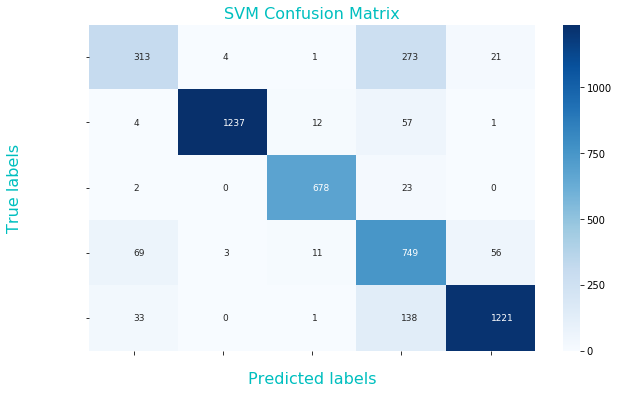

In [34]:
y_pred_SVC=classifier_SVC.predict(x_Scaler_test)
cm = confusion_matrix(y_labeled_test,y_pred_SVC)
print("Confusion matrix is :\n ", cm)

annot_kws = {"ha": 'left',"va": 'center','size': 9}
plt.figure(figsize=(10,6))
ax= plt.subplot()
sns.heatmap(cm, annot=True, fmt='g',cmap = 'Blues',annot_kws=annot_kws, ax=ax); 
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)
# labels, title and ticks
ax.set_xlabel('Predicted labels',fontsize=16,color='c')
ax.set_ylabel('True labels',fontsize=16,color='c'); 
ax.set_title('SVM Confusion Matrix',fontsize=16,color='c'); 
plt.xticks(fontsize=10)
plt.yticks(fontsize=10,rotation=0)
ax.xaxis.set_ticklabels(z);
ax.yaxis.set_ticklabels(z);



During train uncomment this cell

### Using KNN Classification

In [35]:
acc = []
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
for i in range(1,10):
    neigh = KNeighborsClassifier(n_neighbors = i, metric = 'minkowski',p=1).fit(x_Scaler_train, y_labeled)
    yhat = neigh.predict(x_Scaler_test)
    acc.append(metrics.accuracy_score(y_labeled_test, yhat))
n_neighbors_n = acc.index(max(acc) )      
print("Maximum accuracy:-",max(acc),"at K =",acc.index(max(acc)))

Maximum accuracy:- 0.8703892398614225 at K = 5


In [36]:
from sklearn.neighbors import KNeighborsClassifier
classifier_KNN = KNeighborsClassifier(n_neighbors = n_neighbors_n, metric = 'minkowski', p = 1)
classifier_KNN.fit(x_Scaler_train, y_labeled)
cv_knn_train = cross_val_score(classifier_KNN ,  X_all , Y_all, cv = 3)
print("Cross validation for train data KNN is : ", cv_knn_train.mean())



# cv_knn_test = cross_val_score(classifier_KNN , x_Scaler_test , y_labeled_test, cv = 3)
# print("Cross validation for test data KNN is : ", cv_knn_test.mean())


Cross validation for train data KNN is :  0.6580830017705035


During train uncomment this cell

Confusion matrix is :
  [[ 432    5    1  150   24]
 [  16 1258    4   31    2]
 [   3    0  682   16    2]
 [ 168    9   14  629   68]
 [  60    1    0   76 1256]]


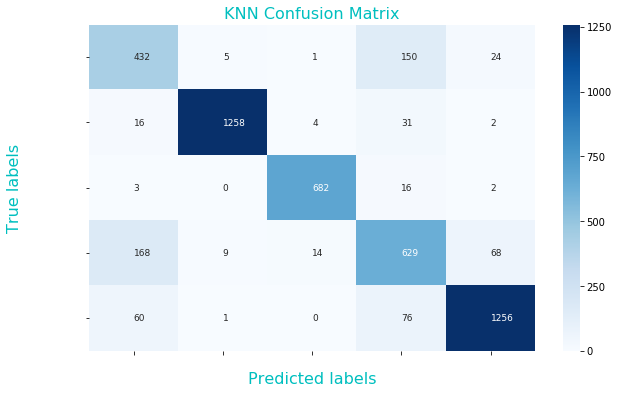

In [37]:
y_pred_Knn = classifier_KNN.predict(x_Scaler_test)
cm = confusion_matrix(y_labeled_test, y_pred_Knn)
print("Confusion matrix is :\n ", cm)
annot_kws = {"ha": 'left',"va": 'center','size': 9}
plt.figure(figsize=(10,6))
ax= plt.subplot()
sns.heatmap(cm, annot=True, fmt='g',cmap = 'Blues',annot_kws=annot_kws, ax=ax); 
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)
# labels, title and ticks
ax.set_xlabel('Predicted labels',fontsize=16,color='c')
ax.set_ylabel('True labels',fontsize=16,color='c'); 
ax.set_title('KNN Confusion Matrix',fontsize=16,color='c') 
plt.xticks(fontsize=10)
plt.yticks(fontsize=10,rotation=0)
ax.xaxis.set_ticklabels(z);
ax.yaxis.set_ticklabels(z);


During train uncomment this cell

### Using Random forest Classifier

In [38]:
acc = []
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
for i in range(1,50):
    neigh = RandomForestClassifier(n_estimators =i, criterion = 'entropy',random_state=49).fit(x_Scaler_train,y_labeled)
    yhat = neigh.predict(x_Scaler_test)
    acc.append(metrics.accuracy_score(y_labeled_test, yhat))
n_estimators_n= acc.index(max(acc) )      
print("Maximum accuracy:-",max(acc),"at K =",acc.index(max(acc)))

Maximum accuracy:- 0.8979009578153658 at K = 30


In [39]:
from sklearn.ensemble import RandomForestClassifier
classifier_RF = RandomForestClassifier(n_estimators = n_estimators_n, criterion = 'entropy',random_state=49)
classifier_RF.fit(x_Scaler_train, y_labeled)
cv_rf_train = cross_val_score(classifier_RF , X_all , Y_all, cv = 3)
print("Cross validation for train data RF is : ", cv_rf_train.mean())
# cv_rf_test = cross_val_score(classifier_RF , x_Scaler_test , y_labeled_test, cv = 3)
# print("Cross validation for test data RF is : ", cv_rf_test.mean())



Cross validation for train data RF is :  0.6575932565183429


During train uncomment this cell

Confusion matrix is :
  [[ 447    3    0  142   20]
 [   5 1269    1   33    3]
 [   1    0  677   22    3]
 [  86    7    6  739   50]
 [  42    2    0   80 1269]]


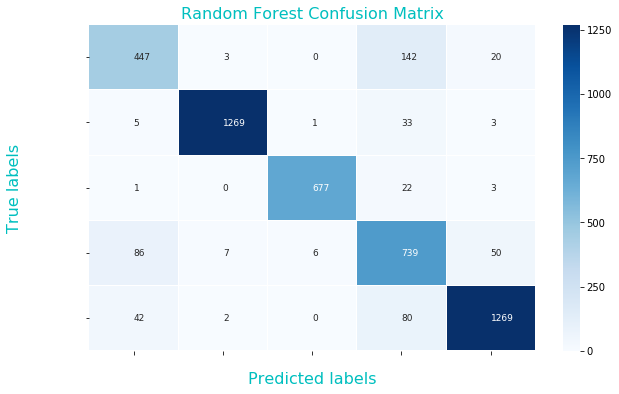

In [40]:
y_pred_RF= classifier_RF.predict(x_Scaler_test)
cm = confusion_matrix(y_labeled_test, y_pred_RF)
print("Confusion matrix is :\n ", cm)

annot_kws = {"ha": 'left',"va": 'center','size': 9}
plt.figure(figsize=(10,6))
ax= plt.subplot()
sns.heatmap(cm, annot=True,linewidths = 0.1, fmt='d', cmap = 'Blues',annot_kws=annot_kws, ax=ax); 
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)
# labels, title and ticks
ax.set_xlabel('Predicted labels',fontsize=16,color='c')
ax.set_ylabel('True labels',fontsize=16,color='c'); 
ax.set_title('Random Forest Confusion Matrix',fontsize=16,color='c'); 
plt.xticks(fontsize=10,color='white')
plt.yticks(fontsize=10,color='white',rotation=0)
ax.xaxis.set_ticklabels(z);
ax.yaxis.set_ticklabels(z);

During train uncomment this cell

### Using Decision Tree Classifier

In [41]:
acc = []
from sklearn import tree
from sklearn import metrics
for i in range(1,50):
    neigh = tree.DecisionTreeClassifier(max_depth  =i, criterion = 'entropy',random_state=49).fit(x_Scaler_train,y_labeled)
    yhat = neigh.predict(x_Scaler_test)
    acc.append(metrics.accuracy_score(y_labeled_test, yhat))
max_depth_n= acc.index(max(acc))   
print("Maximum accuracy:-",max(acc),"at K =",acc.index(max(acc)))

Maximum accuracy:- 0.8724271448950479 at K = 10


In [42]:
from sklearn import tree
classifier_DT = tree.DecisionTreeClassifier(max_depth = max_depth_n,criterion = 'entropy',random_state=49)
classifier_DT.fit(x_Scaler_train, y_labeled)
cv_dt_train = cross_val_score(classifier_DT ,  X_all , Y_all, cv = 3)
print("Cross validation for train data DT is : ", cv_dt_train.mean())
# cv_dt_test = cross_val_score(classifier_DT , x_Scaler_test , y_labeled_test, cv = 3)
# print("Cross validation for test data DT is : ", cv_dt_test.mean())


Cross validation for train data DT is :  0.6029913829331855


During train uncomment this cell

Confusion matrix is :
  [[ 372    2    2  196   40]
 [   3 1271    0   37    0]
 [   1    2  672   28    0]
 [  83    7    5  742   51]
 [  46    2    0  127 1218]]


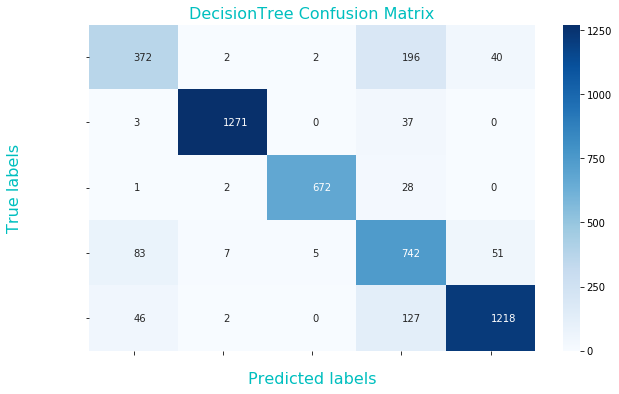

In [43]:
y_pred_DT=classifier_DT.predict(x_Scaler_test)

cm = confusion_matrix(y_labeled_test, y_pred_DT)
print("Confusion matrix is :\n ", cm)
annot_kws = {"ha": 'left',"va": 'center','size': 10}
plt.figure(figsize=(10,6))
ax= plt.subplot()
sns.heatmap(cm, annot=True, fmt='g', cmap = 'Blues',annot_kws=annot_kws, ax=ax); 
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)
# labels, title and ticks
ax.set_xlabel('Predicted labels',fontsize=16,color='c')
ax.set_ylabel('True labels',fontsize=16,color='c'); 
ax.set_title('DecisionTree Confusion Matrix',fontsize=16,color='c'); 
plt.xticks(fontsize=10,color='white')
plt.yticks(fontsize=10,color='white',rotation=0)
ax.xaxis.set_ticklabels(z);
ax.yaxis.set_ticklabels(z);

During train uncomment this cell

### Using Navie Bayes Classifier

In [44]:
from sklearn.naive_bayes import GaussianNB
classifier_NB = GaussianNB()
classifier_NB.fit(x_Scaler_train, y_labeled)
cv_nv_train = cross_val_score(classifier_NB ,  X_all , Y_all, cv = 3)
print("Cross validation for train data NB is : ", cv_nv_train.mean())



Cross validation for train data NB is :  0.6360110971536406


During train uncomment this cell

Confusion matrix is :
  [[ 110    3  135  247  117]
 [  23 1230   13   44    1]
 [  17    0  666   12    8]
 [ 140   14   75  413  246]
 [  57   45   60  104 1127]]


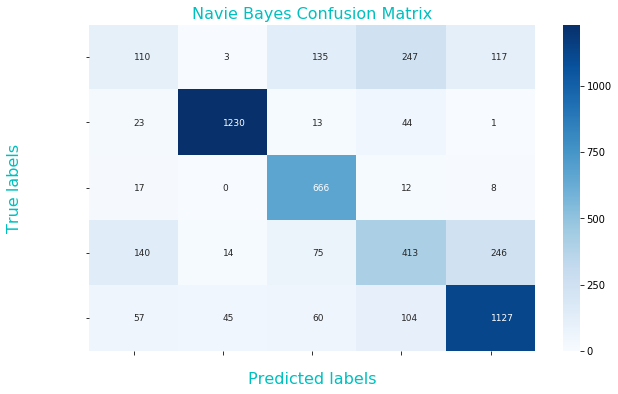

In [45]:
y_pred_NB = classifier_NB.predict(x_Scaler_test)
cm = confusion_matrix(y_labeled_test, y_pred_NB)
print("Confusion matrix is :\n ", cm)
annot_kws = {"ha": 'left',"va": 'center','size': 9}
plt.figure(figsize=(10,6))
ax= plt.subplot()
sns.heatmap(cm, annot=True, fmt='g',cmap = 'Blues',annot_kws=annot_kws, ax=ax); 
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)
# labels, title and ticks
ax.set_xlabel('Predicted labels',fontsize=16,color='c')
ax.set_ylabel('True labels',fontsize=16,color='c'); 
ax.set_title('Navie Bayes Confusion Matrix',fontsize=16,color='c'); 
plt.xticks(fontsize=10,color='white')
plt.yticks(fontsize=10,color='white',rotation=0)
ax.xaxis.set_ticklabels(z);
ax.yaxis.set_ticklabels(z);

In [46]:
from sklearn.linear_model import LogisticRegression
rf = RandomForestClassifier(n_estimators=n_estimators_n, random_state=1)
knn = KNeighborsClassifier(n_neighbors = n_neighbors_n, metric = 'minkowski', p = 1)
dt = tree.DecisionTreeClassifier(max_depth = max_depth_n,criterion = 'entropy',random_state=49)
svm = SVC(kernel = 'rbf')
nb = GaussianNB()
lr = LogisticRegression(multi_class='multinomial', random_state=1)
from sklearn.ensemble import VotingClassifier
final_model = VotingClassifier(estimators=[('svm', svm), ('knn', knn),('lr',lr), ('rf', rf),('dt',dt),('nb',nb)], voting='hard')
final_model.fit(x_Scaler_train, y_labeled)
cv_rf_train = cross_val_score(final_model , X_all , Y_all, cv = 3)
print("Cross validation for train data RF is : ", cv_rf_train.mean())

Cross validation for train data RF is :  0.6926294573334574


Confusion matrix is :
  [[ 384    4    0  203   21]
 [   5 1259    4   41    2]
 [   1    0  680   22    0]
 [  93    4   12  725   54]
 [  47    1    2  100 1243]]


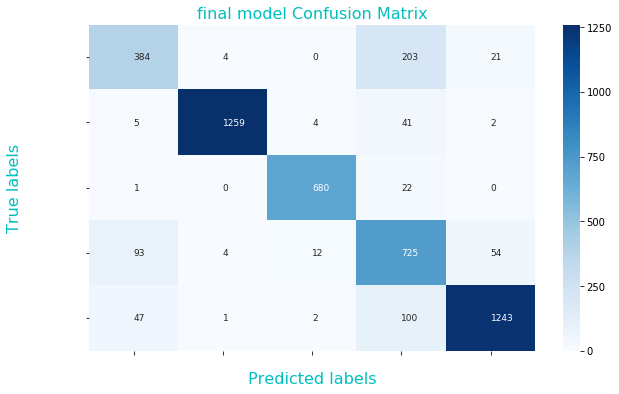

In [47]:
pred_final = final_model.predict(x_Scaler_test)
cm = confusion_matrix(y_labeled_test, pred_final)
print("Confusion matrix is :\n ", cm)
annot_kws = {"ha": 'left',"va": 'center','size': 9}
plt.figure(figsize=(10,6))
ax= plt.subplot()
sns.heatmap(cm, annot=True, fmt='g',cmap = 'Blues',annot_kws=annot_kws, ax=ax); 
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)
# labels, title and ticks
ax.set_xlabel('Predicted labels',fontsize=16,color='c')
ax.set_ylabel('True labels',fontsize=16,color='c'); 
ax.set_title('final model Confusion Matrix',fontsize=16,color='c'); 
plt.xticks(fontsize=10,color='white')
plt.yticks(fontsize=10,color='white',rotation=0)
ax.xaxis.set_ticklabels(z);
ax.yaxis.set_ticklabels(z);

During train uncomment this cell

### Showing Accuracy using accuracy_score

In [52]:
from sklearn.metrics import  accuracy_score

print('Accuracy of SVC          --------->',round(accuracy_score(y_labeled_test, y_pred_SVC),2))
print('Accuracy of Desicion Tree--------->',round(accuracy_score(y_labeled_test, y_pred_DT),2))
print('Accuracy of Random forest--------->',round(accuracy_score(y_labeled_test, y_pred_RF),2))
print('Accuracy of KNN          --------->',round(accuracy_score(y_labeled_test, y_pred_Knn),2))
print('Accuracy of Navie Bayes  --------->',round(accuracy_score(y_labeled_test, y_pred_NB),2))  
print('Accuracy of final model  --------->',round(accuracy_score(y_labeled_test, pred_final),2))  

Accuracy of SVC          ---------> 0.86
Accuracy of Desicion Tree---------> 0.87
Accuracy of Random forest---------> 0.9
Accuracy of KNN          ---------> 0.87
Accuracy of Navie Bayes  ---------> 0.72
Accuracy of final model  ---------> 0.87


In [50]:
import joblib
 
# # Save the model as a pickle in a file
# joblib.dump(classifier_RF, 'RandomForest.pkl')
# joblib.dump(classifier_NB, 'naviebayes.pkl')
# joblib.dump(classifier_DT, 'descisiontree.pkl')
joblib.dump(classifier_SVC, 'svc.pkl')
# joblib.dump(classifier_KNN, 'knn.pkl')
# joblib.dump(final_model, 'final.pkl')

['svc.pkl']

In [82]:
# Load the model from the file
import joblib
rf_from_joblib = joblib.load('RandomForest.pkl')
nb_from_joblib = joblib.load('naviebayes.pkl')
dt_from_joblib = joblib.load('descisiontree.pkl')
svc_from_joblib = joblib.load('svc.pkl')
knn_from_joblib = joblib.load('knn.pkl')
final_from_joblib = joblib.load('final.pkl')
y_prediction_test_SVC=svc_from_joblib.predict(x_independent)
y_prediction_test_KNN=knn_from_joblib.predict(x_independent)
y_prediction_test_RF=rf_from_joblib.predict(x_independent)
y_prediction_test_DT=dt_from_joblib.predict(x_independent)
y_prediction_test_NB=nb_from_joblib.predict(x_independent)
y_prediction_test_finial=final_from_joblib.predict(x_independent)


During train uncomment this cell

In [86]:
# y_prediction_test_SVC=classifier_SVC.predict(x_independent)
# y_prediction_test_KNN=classifier_KNN.predict(x_independent)
# y_prediction_test_RF=classifier_RF.predict(x_independent)
# y_prediction_test_DT=classifier_DT.predict(x_independent)
# y_prediction_test_NB=classifier_NB.predict(x_independent)
# y_prediction_test_finial=final_model.predict(x_independent)

During train **comment** this cell

In [83]:
from sklearn.metrics import  accuracy_score
print('Accuracy of SVC          --------->',round(accuracy_score(y_independent, y_prediction_test_SVC),2))
print('Accuracy of Desicion Tree--------->',round(accuracy_score(y_independent, y_prediction_test_KNN),2))
print('Accuracy of Random forest--------->',round(accuracy_score(y_independent, y_prediction_test_RF),2))
print('Accuracy of KNN          --------->',round(accuracy_score(y_independent, y_prediction_test_DT),2))
print('Accuracy of Navie Bayes  --------->',round(accuracy_score(y_independent, y_prediction_test_NB),2))
print('Accuracy of final model  --------->',round(accuracy_score(y_independent, y_prediction_test_finial),2))  

Accuracy of SVC          ---------> 0.65
Accuracy of Desicion Tree---------> 0.66
Accuracy of Random forest---------> 0.66
Accuracy of KNN          ---------> 0.56
Accuracy of Navie Bayes  ---------> 0.61
Accuracy of final model  ---------> 0.67


During train **comment** this cell